# The second part of the assignment, IDS 2021-2022
In this Jupyter notebook document all your results and the way you have obtained them. Please use the _Python environment_ provided for this part of the assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing  other outputs you have generated that are not included in this notebook (such as pdf, jpg, and others). Please make sure that the other outputs are easily identifiable, i.e. use names as requested in the corresponding question. _You do not need to include the datasets._

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> Please make sure to include the names and matriculation numbers of all group members in the slot provided below. </font> If a name or a student id is missing, the student will not receive any points.

<font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Chirag Tutlani - 426454
    
    2. Dilyar Iskan - 384879
    
    3. Rishabh Saxena - 416770

# Setup

In [128]:
### Display
from IPython.core.display import display, HTML

### Widgets
#import ipywidgets as widgets

### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import string
import datetime
import pickle

### Plotting
# Matplotlib
import matplotlib.text as matplotlib_text
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Matplotlib toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Seaborn
import seaborn as sns
# Plotly
import plotly.graph_objects as go
# Gespatial data with cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


### Frequent Pattern Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules as arule

### Text Mining
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

### PM4Py
import pm4py
# Log Handling
from pm4py.objects.conversion.log import converter as log_converter
# Statistics
from pm4py.statistics.traces.generic.log import case_statistics

# Filtering
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter


# Discovery and Conformance Checking
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter

# Visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# show pandas column non-truncated
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [66]:
# Pandas indexing
idx = pd.IndexSlice

Be careful if you use the **matplotlib widget** magic. If you do not close the created plots, previous plots may change if you create a new one.
So if you use this magic command, be careful about your outputs in your final submission.

In [67]:
%matplotlib inline

# Q1 - Preprocessing (20 points)
In this question, we consider a US-census dataset (**census_data.csv**).
Each row contains statistics of a certain tract on a variety of, particularly income- and work-related, life aspects of US citizens.
Short column description:

| Column | Description |
| ------ | ----------- |
| CensusTract | Tract |
| State | State |
| County | County |
| TotalPop | Total population  |
| Men | Number of men |
| Women | Number of women |
| Hispanic, White, Black, Native, Asian, Pacific | Percentage of ethnic group |
| Citizen | Percentage of citizen |
| Income | Median household income |
| IncomePerCap | Income per capita |
| Poverty | Poverty rate |
| ChildPoverty | Child poverty rate |
| Professional | Employed in management, business, science, and arts (percentage) |
| Service, Office, Construction, Production | Other profession fields (percentage) |
| PrivateWork, PublicWork | Employed in private / public sector (percentage) |
| Drive, Carpool, Transit, Walk, OtherTransp | Means of commuting (percentage) |
| WorkAtHome | Working at home (percentage) |
| MeanCommute | Mean time for commuting |
| Employed | Number of employed |
| SelfEmployed | Self-employed (percentage) |
| FamilyWork | Unpaid family work (percentage) |
| Unemployment | Unemployment rate |


## Loading the Data and Initial Quality Investigation

**a)** Load the dataset into a dataframe `df`. <font color='red'>Use the CensusTract as index for your dataframe</font>. In doing so, ensure that the index is valid, that is, it does not contain any duplicate entries.

**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [68]:
seed = 384879

df = pd.read_csv('./dataset/census_data.csv', index_col='CensusTract')

df = df.drop_duplicates()

**b)** Show the data types of the dataframe columns as well as the first few rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)? 

In [69]:
def print_datatypes(df):
    print("The data type for index: ", df.index.dtype, "\n")
    print("The data types of the columns in df:")
    datatypes = dict(df.dtypes)
    for col in datatypes:
        print("{} => {}".format(col, datatypes[col]))

print_datatypes(df)

pd.set_option('display.max_columns', None)
df.head(10)

The data type for index:  int64 

The data types of the columns in df:
State => object
County => object
TotalPop => int64
Men => float64
Women => float64
Hispanic => float64
White => float64
Black => float64
Native => float64
Asian => float64
Pacific => float64
Citizen => int64
Income => float64
IncomePerCap => float64
Poverty => float64
ChildPoverty => float64
Professional => float64
Service => float64
Office => float64
Construction => float64
Production => float64
Drive => float64
Carpool => float64
Transit => float64
Walk => float64
OtherTransp => float64
WorkAtHome => float64
MeanCommute => float64
Employed => int64
PrivateWork => float64
PublicWork => float64
SelfEmployed => float64
FamilyWork => float64
Unemployment => float64


State   County  TotalPop     Men   Women  Hispanic  White  \
CensusTract                                                                
1001020100   Alabama  Autauga      1948   940.0  1008.0       0.9   87.4   
1001020200   Alabama  Autauga      2156  1059.0  1097.0       0.8   40.4   
1001020300   Alabama  Autauga      2968  1364.0  1604.0       0.0   74.5   
1001020400   Alabama  Autauga      4423  2172.0  2251.0      10.5   82.8   
1001020500   Alabama  Autauga     10763  4922.0  5841.0       0.7   68.5   
1001020600   Alabama  Autauga      3851  1787.0  2064.0      13.1   72.9   
1001020700   Alabama  Autauga      2761  1210.0  1551.0       3.8   74.5   
1001020801   Alabama  Autauga      3187  1502.0  1685.0       1.3   84.0   
1001020802   Alabama  Autauga     10915  5486.0  5429.0       1.4   89.5   
1001020900   Alabama  Autauga      5668  2897.0  2771.0       0.4   85.5   

             Black  Native  Asian  Pacific  Citizen   Income  IncomePerCap  \
CensusTract                                                                  
1001020100     7.7     0.3    0.6      0.0     1503  61838.0       25713.0   
1001020200    53.3     0.0    2.3      0.0     1662  32303.0       18021.0   
1001020300    18.6     0.5    1.4      0.3     2335  44922.0       20689.0   
1001020400     3.7     1.6    0.0      0.0     3306  54329.0       24125.0   
1001020500    24.8     0.0    3.8      0.0     7666  51965.0       27526.0   
1001020600    11.9     0.0    0.0      0.0     2642  63092.0       30480.0   
1001020700    19.7     0.0    0.0      0.0     2060  34821.0       20442.0   
1001020801    10.7     3.1    0.0      0.0     2391  73728.0       32813.0   
1001020802     8.4     0.0    0.0      0.0     7778  60063.0       24028.0   
1001020900    12.1     0.0    0.3      0.0     4217  41287.0       24710.0   

             Poverty  ChildPoverty  Professional  Service  Office  \
CensusTract                                                         
1001020100       8.1           8.4          34.7     17.0    21.3   
1001020200      25.5          40.3          22.3     24.7    21.5   
1001020300      12.7          19.7          31.4     24.9    22.1   
1001020400       2.1           1.6          27.0     20.8    27.0   
1001020500      11.4          17.5          49.6     14.2    18.2   
1001020600      14.4          21.9          24.2     17.5    35.4   
1001020700      28.9          41.9          19.5     29.6    25.3   
1001020801      13.0          25.9          42.8     10.7    34.2   
1001020802      13.9          18.3          31.5     17.5    26.1   
1001020900       6.8          10.0          29.3     13.7    17.7   

             Construction  Production  Drive  Carpool  Transit  Walk  \
CensusTract                                                            
1001020100           11.9        15.2   90.2      4.8      0.0   0.5   
1001020200            9.4        22.0   86.3     13.1      0.0   0.0   
1001020300            9.2        12.4   94.8      2.8      0.0   0.0   
1001020400            8.7        16.4   86.6      9.1      0.0   0.0   
1001020500            2.1        15.8   88.0     10.5      0.0   0.0   
1001020600            7.9        14.9   82.7      6.9      0.0   0.0   
1001020700           10.1        15.5   92.4      7.6      0.0   0.0   
1001020801            5.5         6.8   84.3      8.1      0.0   0.0   
1001020802            7.8        17.1   90.1      8.6      0.0   0.0   
1001020900           11.0        28.3   88.7      7.9      0.0   0.0   

             OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
CensusTract                                                                
1001020100           2.3         2.1         25.0       943         77.1   
1001020200           0.7         0.0         23.4       753         77.0   
1001020300           0.0         2.5         19.6      1373         64.1   
1001020400           2.6         1.6         25.3      1782         75.7   
1001020500     

The first thing to notice is that the index column ,i.e., `CensusTract`. We interpret this column as an identifier for a certain region of land. Thus it is better to have identifier stored as `object` because this enables them to store a combination of characters and numerical and in some systems using integer as datatype could lead to integer overflow.

Other than that, pandas store string data in either `object` or `StringDtype`. Both of them are fine and can be used for the columns `State` and `County`. And the columns `Men` and `Women` should be of type `int64` and not `float64`.

**c)** To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable. 
Are there any categorical column candidates? Explain your answer. \
Afterwards, convert these columns into categorical columns.

In [70]:
# State and County are categorical candidates because there are limited number of them.

df['State'] = df['State'].astype('category')

df['County'] = df['County'].astype('category')

*State and County are categorical candidates because there are limited number of the values they can take.*

**d)** To select a good strategy to deal with missing data, it is important to get an overview over the general data distribution.
Show the basic statistics for the dataset and create 6 boxplots for the following column groupings:

    ['TotalPop', 'Men', 'Women', 'Citizen', 'Employed'],
    ['Income', 'IncomePerCap'],
    ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
    ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty'],
    ['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'],
    ['MeanCommute']

Can you spot any (severe) data quality problems, in particular, are there unrealistic values (also considering the semantics)?

*Hint: Use the `df.describe()` function.*

In [71]:
# Show the basic statistics of the dataframe
df.describe()


TotalPop           Men         Women      Hispanic         White  \
count  73753.000000  73374.000000  73392.000000  73311.000000  73311.000000   
mean    4340.136591   2135.129746   2205.181805     16.862810     62.032106   
std     2118.033320   1066.837610   1090.265177     22.940695     30.684152   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%     2903.000000   1415.000000   1467.000000      2.400000     39.400000   
50%     4071.000000   1991.000000   2071.000000      7.000000     71.400000   
75%     5448.000000   2677.000000   2777.000000     20.400000     88.300000   
max    53812.000000  27962.000000  27250.000000    100.000000    100.000000   

              Black        Native         Asian       Pacific       Citizen  \
count  73311.000000  73311.000000  73311.000000  73311.000000  73753.000000   
mean      13.272581      0.727726      4.588253      0.145012   3053.312150   
std       21.762483      4.488340      8.794003      1.037354   1467.363769   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.700000      0.000000      0.200000      0.000000   2045.000000   
50%        3.700000      0.000000      1.400000      0.000000   2869.000000   
75%       14.400000      0.400000      4.800000      0.000000   3842.000000   
max      100.000000    100.000000     91.300000     84.700000  37416.000000   

              Income   IncomePerCap       Poverty  ChildPoverty  Professional  \
count   72901.000000   73261.000000  73166.000000  72883.000000  73194.000000   
mean    57225.564862   28491.234299     16.958020     22.486827     34.798843   
std     28663.331962   15047.068660     13.196518     19.190909     15.007075   
min      2611.000000     128.000000      0.000000      0.000000      0.000000   
25%     37683.000000   19123.000000      7.200000      7.000000     24.100000   
50%     51094.000000   25344.000000     13.400000     17.800000     32.600000   
75%     70117.000000   33894.000000     23.100000     33.800000     43.875000   
max    248750.000000  254204.000000    100.000000    100.000000    100.000000   

            Service        Office  Construction    Production         Drive  \
count  73194.000000  73194.000000  73194.000000  73194.000000  73204.000000   
mean      19.101381     23.951559      9.292337     12.856005     75.533887   
std        8.279143      5.957279      6.023290      7.671588     15.371620   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.400000     20.100000      5.000000      7.100000     72.000000   
50%       17.900000     23.800000      8.400000     11.800000     79.700000   
75%       23.600000     27.500000     12.500000     17.400000     84.900000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

            Carpool       Transit          Walk   OtherTransp    WorkAtHome  \
count  73204.000000  73204.000000  73204.000000  73204.000000  73204.000000   
mean       9.627468      5.456050      3.123340      1.891606      4.368093   
std        5.367321     11.724287      5.881237      2.596198      3.904990   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      0.000000      0.400000      0.400000      1.800000   
50%        8.800000      1.100000      1.400000      1.100000      3.500000   
75%       12.300000      4.700000      3.500000      2.500000      5.900000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

        MeanCommute      Employed   PrivateWork    PublicWork  SelfEmployed  \
count  73052.000000  73753.000000  73194.000000  73194.000000  73194.000000   
mean      25.667357   1990.578404     78.975238     14.621566      6.233814   
std        6.964881   1069.040099      8.345758      7.535786      4.042990   
min        1.200000      0.000000      0.000000      0.000000      0.000000   
25%       20.800000   1255.000000     

In [72]:
print(df.shape)

(73753, 34)


<AxesSubplot:ylabel='Duration'>

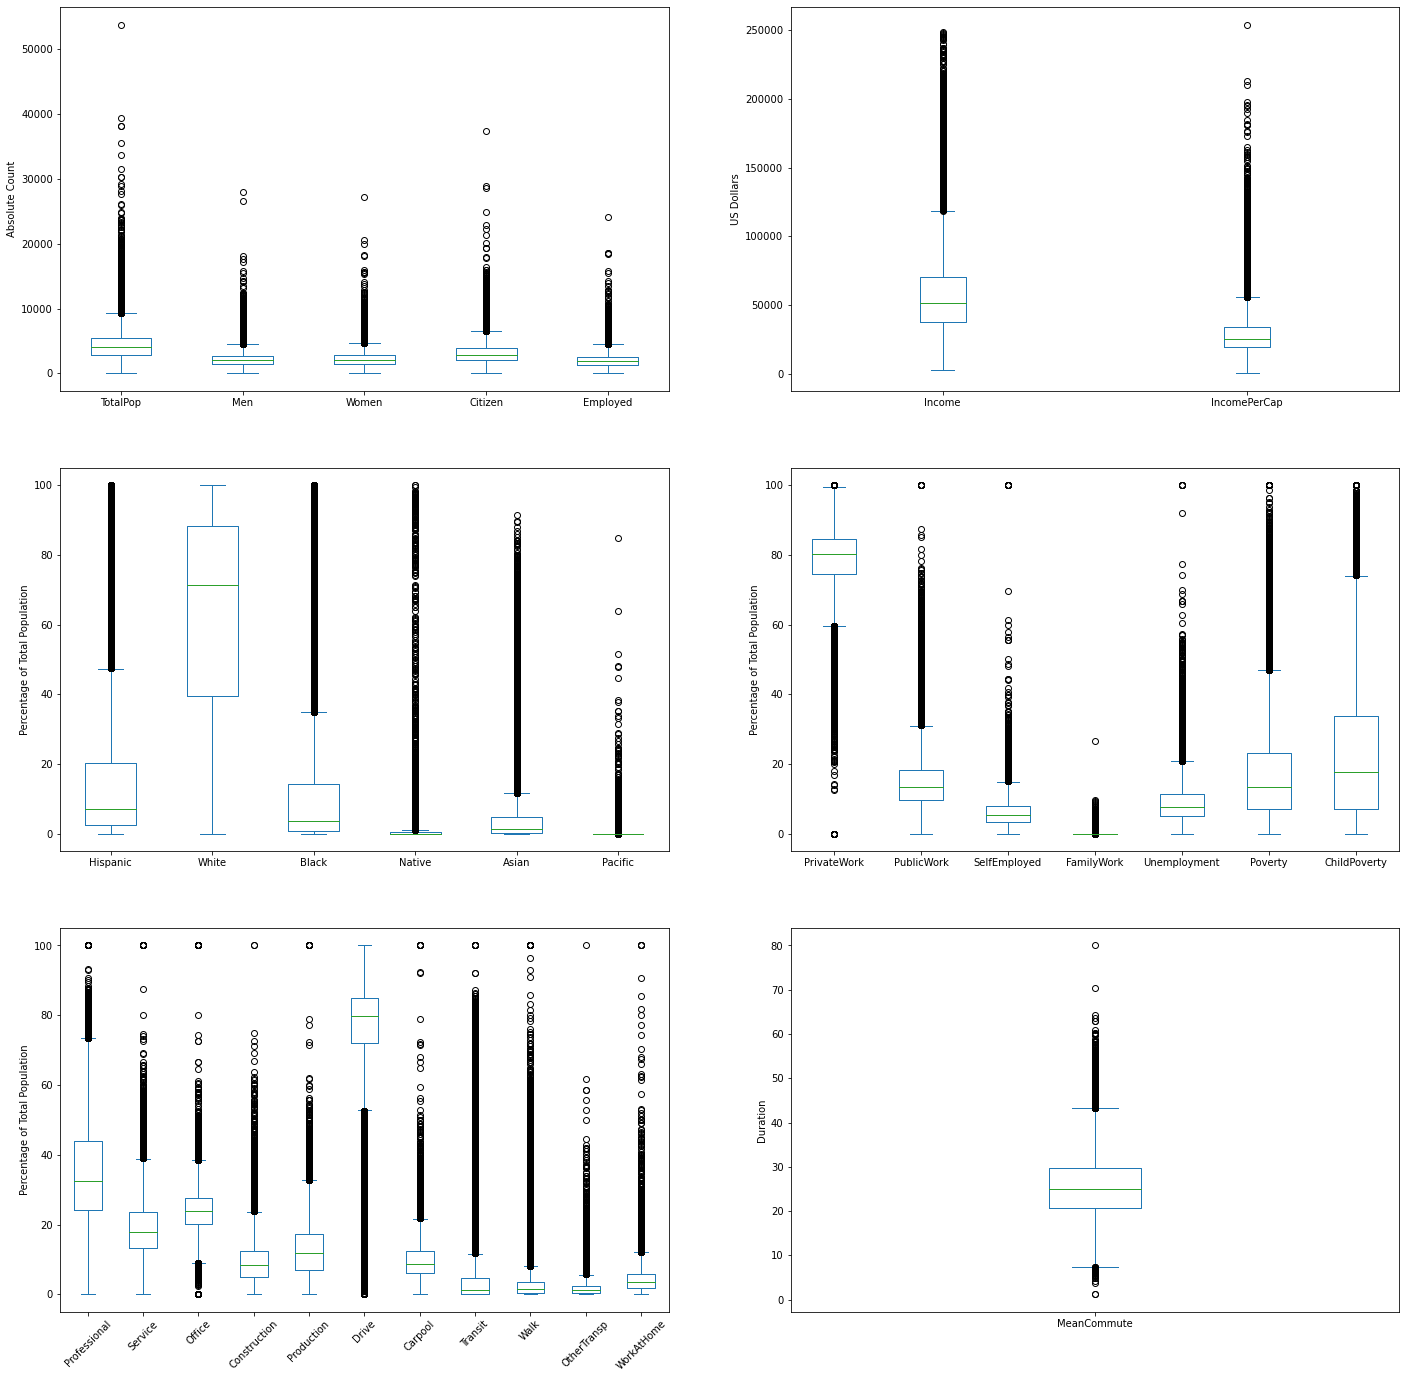

In [73]:
# (boxplots)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24,24))

df[['TotalPop', 'Men', 'Women', 'Citizen', 'Employed']].plot(kind='box', ax=ax[0][0], ylabel = "Absolute Count")

df[['Income', 'IncomePerCap']].plot(kind='box', ax=ax[0][1], ylabel="US Dollars")

df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].plot(kind='box', ax=ax[1][0], ylabel="Percentage of Total Population")

df[['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty']].plot(kind='box', ax=ax[1][1], ylabel="Percentage of Total Population")

df[['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']].plot(kind='box', ax=ax[2][0], ylabel="Percentage of Total Population", rot=45)

df[['MeanCommute']].plot(kind='box', ax=ax[2][1], ylabel="Duration")



*Your markdown for your discussion.*
1. Citizen - This description of this column says that this value should be in percentages but we found out it has maximum value of nearly 37000. Therefore this column instead tells us the absolute number of citizens and not percentage.
2. Native - From the statistics, we see that about 50% of rows have zero percentage native population and 75% have less than 0.4%. This means that about 75% of regions have no (or very less) native population which seems a bit strange.
3. Total Population, Citizen, and Employed- These are the only columns with same number of count as number of entries in the dataframe. 

## Handling Missing Values
(In the following task you can assume that every NAN entry in the dataframe is actually a missing value. This can paritally be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., numbers types as string would result in an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.)

**e)** Simply filling missing entries is usually not a good idea. Therefore, you should first analyze the quantity of missing values and check for patterns of missing values.

To this end, compute the following statistics on missing values:
1) How many entries does the dataframe have? (To relate this to the number of entries missing)
2) How many missing values do we have?
3) How many rows have at least a single missing value?
4) Count the number of missing values per column.
5) Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.

What do you observe?

In [74]:
print("Number of entries in dataframe: ", df.shape[0])

missing_values = df.isna().sum().sum()
print("Total number of missing values: ", missing_values)

print("Number of rows that have atleast one missing value: ", df.shape[0] - df.dropna().shape[0])

missing_values_per_column = df.isna().sum()
print("Missing values per column:")
print(missing_values_per_column)


missing_values_per_row = df.isna().sum(axis=1)
missing_values_per_row_agg = missing_values_per_row.value_counts() # aggregating
pd.DataFrame(missing_values_per_row_agg).reset_index().set_axis(['#missing_values', '#rows'], axis=1).set_index("#missing_values") # displaying result in dataframe

Number of entries in dataframe:  73753
Total number of missing values:  15773
Number of rows that have atleast one missing value:  1760
Missing values per column:
State             0
County            0
TotalPop          0
Men             379
Women           361
Hispanic        442
White           442
Black           442
Native          442
Asian           442
Pacific         442
Citizen           0
Income          852
IncomePerCap    492
Poverty         587
ChildPoverty    870
Professional    559
Service         559
Office          559
Construction    559
Production      559
Drive           549
Carpool         549
Transit         549
Walk            549
OtherTransp     549
WorkAtHome      549
MeanCommute     701
Employed          0
PrivateWork     559
PublicWork      559
SelfEmployed    559
FamilyWork      559
Unemployment    554
dtype: int64


#rows
#missing_values       
0                71993
1                  982
27                 442
3                   93
2                   91
20                  90
4                   32
13                   8
19                   7
18                   4
21                   4
5                    2
14                   2
9                    1
16                   1
12                   1

*Your markdown for your discussion.* 
1. For exactly 442 tracts, no data was recorded for the ethnic group percentages (Hispanic, White, Black, Native, Asian, Pacific)
2. Similarly for 559 tracts, no data was recorded about the working sector (professional, service, office, construction, production, private work, public service, self-employed, family work)
3. Similarly for 549 tracts, no data was recorded about the resource used for communiting (drive, carpool, transit, walk, other transportation, work from home)

**f)** We decide to **remove all rows from `df` where the total population is zero**. \
Given the preceding results, how do you evaluate this strategy? Try to motivate your argumentation by additional short analysis results (see hint for an inspiration).

*Hint: It might be interesting to have a look at the rows with zero population. Afterwards, you can provide some analysis results that show that your (potential) observation generalizes to all rows with zero population.*

In [75]:
# Number of rows with zero total population
print("Number of rows with zero total population:", df[df['TotalPop'] == 0].shape[0])

# display 10 rows with zero total population
display(df[df['TotalPop'] == 0].head(10)) 

# Remove all rows from df where the total population is zero
df = df[df['TotalPop'] > 0]

Number of rows with zero total population: 442


State        County  TotalPop  Men  Women  Hispanic  White  \
CensusTract                                                                    
1003990000      Alabama       Baldwin         0  0.0    0.0       NaN    NaN   
1015981902      Alabama       Calhoun         0  0.0    0.0       NaN    NaN   
1097990000      Alabama        Mobile         0  0.0    0.0       NaN    NaN   
1117980000      Alabama        Shelby         0  0.0    0.0       NaN    NaN   
4012980000      Arizona        La Paz         0  0.0    0.0       NaN    NaN   
4013113802      Arizona      Maricopa         0  0.0    0.0       NaN    NaN   
4027980003      Arizona          Yuma         0  0.0    0.0       NaN    NaN   
5119003205     Arkansas       Pulaski         0  0.0    0.0       NaN    NaN   
6001990000   California       Alameda         0  0.0    0.0       NaN    NaN   
6013990000   California  Contra Costa         0  0.0    0.0       NaN    NaN   

             Black  Native  Asian  Pacific  Citizen  Income  IncomePerCap  \
CensusTract                                                                 
1003990000     NaN     NaN    NaN      NaN        0     NaN           NaN   
1015981902     NaN     NaN    NaN      NaN        0     NaN           NaN   
1097990000     NaN     NaN    NaN      NaN        0     NaN           NaN   
1117980000     NaN     NaN    NaN      NaN        0     NaN           NaN   
4012980000     NaN     NaN    NaN      NaN        0     NaN           NaN   
4013113802     NaN     NaN    NaN      NaN        0     NaN           NaN   
4027980003     NaN     NaN    NaN      NaN        0     NaN           NaN   
5119003205     NaN     NaN    NaN      NaN        0     NaN           NaN   
6001990000     NaN     NaN    NaN      NaN        0     NaN           NaN   
6013990000     NaN     NaN    NaN      NaN        0     NaN           NaN   

             Poverty  ChildPoverty  Professional  Service  Office  \
CensusTract                                                         
1003990000       NaN           NaN           NaN      NaN     NaN   
1015981902       NaN           NaN           NaN      NaN     NaN   
1097990000       NaN           NaN           NaN      NaN     NaN   
1117980000       NaN           NaN           NaN      NaN     NaN   
4012980000       NaN           NaN           NaN      NaN     NaN   
4013113802       NaN           NaN           NaN      NaN     NaN   
4027980003       NaN           NaN           NaN      NaN     NaN   
5119003205       NaN           NaN           NaN      NaN     NaN   
6001990000       NaN           NaN           NaN      NaN     NaN   
6013990000       NaN           NaN           NaN      NaN     NaN   

             Construction  Production  Drive  Carpool  Transit  Walk  \
CensusTract                                                            
1003990000            NaN         NaN    NaN      NaN      NaN   NaN   
1015981902            NaN         NaN    NaN      NaN      NaN   NaN   
1097990000            NaN         NaN    NaN      NaN      NaN   NaN   
1117980000            NaN         NaN    NaN      NaN      NaN   NaN   
4012980000            NaN         NaN    NaN      NaN      NaN   NaN   
4013113802            NaN         NaN    NaN      NaN      NaN   NaN   
4027980003            NaN         NaN    NaN      NaN      NaN   NaN   
5119003205            NaN         NaN    NaN      NaN      NaN   NaN   
6001990000            NaN         NaN    NaN      NaN      NaN   NaN   
6013990000            NaN         NaN    NaN      NaN      NaN   NaN   

             OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
CensusTract                                                                
1003990000           NaN         NaN          NaN         0          NaN   
1015981902           NaN         NaN          NaN         0          NaN   
1097990000           NaN         NaN          NaN         0          NaN   
1117980000           NaN         NaN          NaN         

As we can see in dataframe, tracts withs zero total population have no relevant information (most of the values are missing, 27 values are missing to be exact). This makes sense as the all the columns tells us the about the people and not about the physical land. So it makes sense to remove this tracts as they do not provide any substantial results for further analysis.

## Imputing Missing Values

**g)** The previous analysis showed that there are missing values in the 'Men' and 'Women' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Do not forget about the semantics of the columns.*

In [76]:
n_totalpop_missing = df[df['TotalPop'].isna()].shape[0]
print("Number of rows with missing values in the 'TotalPop' column", n_totalpop_missing)

n_men_women_missing = df[df['Men'].isna() & df['Women'].isna()].shape[0]
print("Number of rows with missing values in the 'Men' AND 'Women' columns", n_men_women_missing)

# since there are no missing values in 'TotalPop' and for no entry the values for 
# both 'Men' AND 'Women' columns are missing, we can just calculate 
# 'Men' by subtracting 'Women' from 'TotalPop'. Analog for 'Women'. 

# fill missing values in men column
df['Men'] = df['Men'].fillna(df['TotalPop'] - df['Women'])
# fill missing values in women column
df['Women'] = df['Women'].fillna(df['TotalPop'] - df['Men'])

# Check if total population is the sum of men and women
assert bool((df['TotalPop'] == (df['Men'] + df['Women'])).prod())

Number of rows with missing values in the 'TotalPop' column 0
Number of rows with missing values in the 'Men' AND 'Women' columns 0


In [77]:
assert df[['Men', 'Women']].isna().sum().sum() == 0

**h)** Finally, impute the remaining missing values in `df` using the knn-imputation method.

1) Before you impute the remaining missing values, you should improve the data semantics consistency by turning the columns 
    
        ['Men', 'Women', 'Citizen', 'Employed']
    
    into percentage scores as well. To this end, divide these values by the total population (i.e., 'TotalPop')

In [78]:
columns = ['Men', 'Women', 'Citizen', 'Employed']
for column in columns:
    df[column] = np.around(df[column] / df['TotalPop'], decimals=3) * 100
    
display(df.head(10))

State   County  TotalPop   Men  Women  Hispanic  White  Black  \
CensusTract                                                                    
1001020100   Alabama  Autauga      1948  48.3   51.7       0.9   87.4    7.7   
1001020200   Alabama  Autauga      2156  49.1   50.9       0.8   40.4   53.3   
1001020300   Alabama  Autauga      2968  46.0   54.0       0.0   74.5   18.6   
1001020400   Alabama  Autauga      4423  49.1   50.9      10.5   82.8    3.7   
1001020500   Alabama  Autauga     10763  45.7   54.3       0.7   68.5   24.8   
1001020600   Alabama  Autauga      3851  46.4   53.6      13.1   72.9   11.9   
1001020700   Alabama  Autauga      2761  43.8   56.2       3.8   74.5   19.7   
1001020801   Alabama  Autauga      3187  47.1   52.9       1.3   84.0   10.7   
1001020802   Alabama  Autauga     10915  50.3   49.7       1.4   89.5    8.4   
1001020900   Alabama  Autauga      5668  51.1   48.9       0.4   85.5   12.1   

             Native  Asian  Pacific  Citizen   Income  IncomePerCap  Poverty  \
CensusTract                                                                    
1001020100      0.3    0.6      0.0     77.2  61838.0       25713.0      8.1   
1001020200      0.0    2.3      0.0     77.1  32303.0       18021.0     25.5   
1001020300      0.5    1.4      0.3     78.7  44922.0       20689.0     12.7   
1001020400      1.6    0.0      0.0     74.7  54329.0       24125.0      2.1   
1001020500      0.0    3.8      0.0     71.2  51965.0       27526.0     11.4   
1001020600      0.0    0.0      0.0     68.6  63092.0       30480.0     14.4   
1001020700      0.0    0.0      0.0     74.6  34821.0       20442.0     28.9   
1001020801      3.1    0.0      0.0     75.0  73728.0       32813.0     13.0   
1001020802      0.0    0.0      0.0     71.3  60063.0       24028.0     13.9   
1001020900      0.0    0.3      0.0     74.4  41287.0       24710.0      6.8   

             ChildPoverty  Professional  Service  Office  Construction  \
CensusTract                                                              
1001020100            8.4          34.7     17.0    21.3          11.9   
1001020200           40.3          22.3     24.7    21.5           9.4   
1001020300           19.7          31.4     24.9    22.1           9.2   
1001020400            1.6          27.0     20.8    27.0           8.7   
1001020500           17.5          49.6     14.2    18.2           2.1   
1001020600           21.9          24.2     17.5    35.4           7.9   
1001020700           41.9          19.5     29.6    25.3          10.1   
1001020801           25.9          42.8     10.7    34.2           5.5   
1001020802           18.3          31.5     17.5    26.1           7.8   
1001020900           10.0          29.3     13.7    17.7          11.0   

             Production  Drive  Carpool  Transit  Walk  OtherTransp  \
CensusTract                                                           
1001020100         15.2   90.2      4.8      0.0   0.5          2.3   
1001020200         22.0   86.3     13.1      0.0   0.0          0.7   
1001020300         12.4   94.8      2.8      0.0   0.0          0.0   
1001020400         16.4   86.6      9.1      0.0   0.0          2.6   
1001020500         15.8   88.0     10.5      0.0   0.0          0.6   
1001020600         14.9   82.7      6.9      0.0   0.0          6.0   
1001020700         15.5   92.4      7.6      0.0   0.0          0.0   
1001020801          6.8   84.3      8.1      0.0   0.0          1.7   
1001020802         17.1   90.1      8.6      0.0   0.0          0.0   
1001020900         28.3   88.7      7.9      0.0   0.0          1.2   

             WorkAtHome  MeanCommute  Employed  PrivateWork  PublicWork  \
CensusTract                                                               
1001020100          2.1         25.0      48.4         77.1        18.3   
1001020200          0.0         23.4      34.9         77.0        16.9   
1001020300          2.5         19.6      46.3     

2) Impute the missing values using the knn-imputation method.
    To this end, apply the following steps:
        1) Create a working copy `df_tmp` of your dataframe.
        2) Drop the columns `['State', 'County']` from `df_tmp`. On the one hand, this makes the following steps easier because we only have to deal with numerical columns; on the other hand, an alternative one-hot encoding is also problematic as this will cause our feature dimensionality to explode!
        3) Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, even though we are mostly using percentages, knn can become very biased.
        4) Impute the missing values considering five neighbors.
        5) Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
        6) Append the columns `['State', 'County']`
 
In the end, `df` should not contain missing values and have columns `['State', 'County']`.

*Hint: Be careful with the indices of your dataframes.*


In [79]:
df_tmp = df.copy(deep=True)
df_tmp = df_tmp.drop(columns=['State', 'County'] , axis=1)

In [80]:
# calculate the mean and standard deviation of the columns
df_tmp_mean = df_tmp.mean()
df_tmp_std = df_tmp.std()
# Normalize the data in df_tmp using standard score normalization
df_tmp = (df_tmp - df_tmp_mean) / df_tmp_std

In [81]:
# create an knn imputer object
knn_imputer = KNNImputer(n_neighbors=5)
# fit the imputer object to the data
df_knn = knn_imputer.fit_transform(df_tmp)
# create a dataframe from the knn imputer object and use the index CensusTract as the index and the columns from df_tmp
df_tmp = pd.DataFrame(df_knn, index=df_tmp.index, columns=df_tmp.columns)
# display the first 10 rows of the dataframe
display(df_tmp.head(10))



TotalPop       Men     Women  Hispanic     White     Black  \
CensusTract                                                               
1001020100  -1.153031 -0.188524  0.188525 -0.695829  0.826743 -0.256064   
1001020200  -1.053858 -0.020129  0.020130 -0.700188 -0.704993  1.839285   
1001020300  -0.666702 -0.672659  0.672660 -0.735061  0.406330  0.244798   
1001020400   0.027032 -0.020129  0.020130 -0.277359  0.676828 -0.439866   
1001020500   3.049901 -0.735807  0.735808 -0.704548  0.210789  0.529692   
1001020600  -0.245693 -0.588462  0.588462 -0.164023  0.354186 -0.063071   
1001020700  -0.765398 -1.135745  1.135745 -0.569417  0.406330  0.295344   
1001020801  -0.562284 -0.441116  0.441117 -0.678393  0.715936 -0.118212   
1001020802   3.122374  0.232463 -0.232463 -0.674034  0.895182 -0.223898   
1001020900   0.620640  0.400858 -0.400857 -0.717625  0.764821 -0.053881   

               Native     Asian   Pacific   Citizen    Income  IncomePerCap  \
CensusTract                                                                   
1001020100  -0.095297 -0.453520 -0.139791  0.536413  0.160918     -0.184636   
1001020200  -0.162137 -0.260206 -0.139791  0.527133 -0.869493     -0.695832   
1001020300  -0.050737 -0.362549  0.149407  0.675615 -0.429244     -0.518522   
1001020400   0.194342 -0.521748 -0.139791  0.304411 -0.101055     -0.290172   
1001020500  -0.162137 -0.089635 -0.139791 -0.020393 -0.183529     -0.064148   
1001020600  -0.162137 -0.521748 -0.139791 -0.261675  0.204667      0.132170   
1001020700  -0.162137 -0.521748 -0.139791  0.295131 -0.781646     -0.534937   
1001020801   0.528542 -0.521748 -0.139791  0.332251  0.575733      0.287216   
1001020802  -0.162137 -0.521748 -0.139791 -0.011113  0.098992     -0.296618   
1001020900  -0.162137 -0.487634 -0.139791  0.276570 -0.556061     -0.251294   

              Poverty  ChildPoverty  Professional   Service    Office  \
CensusTract                                                             
1001020100  -0.671239     -0.734036     -0.006586 -0.253816 -0.445096   
1001020200   0.647290      0.928209     -0.832863  0.676232 -0.411523   
1001020300  -0.322662     -0.145216     -0.226483  0.700389 -0.310806   
1001020400  -1.125905     -1.088371     -0.519678  0.205168  0.511717   
1001020500  -0.421173     -0.259854      0.986279 -0.592016 -0.965467   
1001020600  -0.193841     -0.030578     -0.706256 -0.193424  1.921757   
1001020700   0.904934      1.011582     -1.019442  1.268080  0.226352   
1001020801  -0.299929      0.177854      0.533159 -1.014765  1.720323   
1001020802  -0.231729     -0.218167     -0.219819 -0.193424  0.360641   
1001020900  -0.769750     -0.650664     -0.366417 -0.652408 -1.049398   

             Construction  Production     Drive   Carpool   Transit      Walk  \
CensusTract                                                                     
1001020100       0.432930    0.305542  0.954103 -0.899419 -0.465363 -0.446052   
1001020200       0.017874    1.191930  0.700389  0.646977 -0.465363 -0.531069   
1001020300      -0.015330   -0.059441  1.253356 -1.272044 -0.465363 -0.531069   
1001020400      -0.098341    0.461964  0.719905 -0.098274 -0.465363 -0.531069   
1001020500      -1.194088    0.383753  0.810982  0.162564 -0.465363 -0.531069   
1001020600      -0.231159    0.266437  0.466191 -0.508162 -0.465363 -0.531069   
1001020700       0.134090    0.344648  1.097224 -0.377743 -0.465363 -0.531069   
1001020801      -0.629612   -0.789407  0.570279 -0.284587 -0.465363 -0.531069   
1001020802      -0.247761    0.553210  0.947598 -0.191430 -0.465363 -0.531069   
1001020900       0.283510    2.013142  0.856521 -0.321849 -0.465363 -0.531069   

             OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
CensusTract                                                                
1001020100      0.157305   -0.580819    -0.095818  0.305754    -0.224694   
1001020200     -0.458981   -1.118593    -0.325541 -1.117257    -0.236676   
100102030

In [82]:
# your code 5)
# Invert the transformation applied in step 4)
df_tmp = df_tmp * df_tmp_std + df_tmp_mean


In [83]:
# your code 6)
# Append the columns state and county to df_tmp
df_tmp = df_tmp.assign(State=df['State'], County=df['County'])
df = df_tmp.copy(deep=True)
display(df.head(10))

TotalPop   Men  Women  Hispanic  White  Black  Native  Asian  \
CensusTract                                                                 
1001020100     1948.0  48.3   51.7       0.9   87.4    7.7     0.3    0.6   
1001020200     2156.0  49.1   50.9       0.8   40.4   53.3     0.0    2.3   
1001020300     2968.0  46.0   54.0       0.0   74.5   18.6     0.5    1.4   
1001020400     4423.0  49.1   50.9      10.5   82.8    3.7     1.6    0.0   
1001020500    10763.0  45.7   54.3       0.7   68.5   24.8     0.0    3.8   
1001020600     3851.0  46.4   53.6      13.1   72.9   11.9     0.0    0.0   
1001020700     2761.0  43.8   56.2       3.8   74.5   19.7     0.0    0.0   
1001020801     3187.0  47.1   52.9       1.3   84.0   10.7     3.1    0.0   
1001020802    10915.0  50.3   49.7       1.4   89.5    8.4     0.0    0.0   
1001020900     5668.0  51.1   48.9       0.4   85.5   12.1     0.0    0.3   

             Pacific  Citizen   Income  IncomePerCap  Poverty  ChildPoverty  \
CensusTract                                                                   
1001020100       0.0     77.2  61838.0       25713.0      8.1           8.4   
1001020200       0.0     77.1  32303.0       18021.0     25.5          40.3   
1001020300       0.3     78.7  44922.0       20689.0     12.7          19.7   
1001020400       0.0     74.7  54329.0       24125.0      2.1           1.6   
1001020500       0.0     71.2  51965.0       27526.0     11.4          17.5   
1001020600       0.0     68.6  63092.0       30480.0     14.4          21.9   
1001020700       0.0     74.6  34821.0       20442.0     28.9          41.9   
1001020801       0.0     75.0  73728.0       32813.0     13.0          25.9   
1001020802       0.0     71.3  60063.0       24028.0     13.9          18.3   
1001020900       0.0     74.4  41287.0       24710.0      6.8          10.0   

             Professional  Service  Office  Construction  Production  Drive  \
CensusTract                                                                   
1001020100           34.7     17.0    21.3          11.9        15.2   90.2   
1001020200           22.3     24.7    21.5           9.4        22.0   86.3   
1001020300           31.4     24.9    22.1           9.2        12.4   94.8   
1001020400           27.0     20.8    27.0           8.7        16.4   86.6   
1001020500           49.6     14.2    18.2           2.1        15.8   88.0   
1001020600           24.2     17.5    35.4           7.9        14.9   82.7   
1001020700           19.5     29.6    25.3          10.1        15.5   92.4   
1001020801           42.8     10.7    34.2           5.5         6.8   84.3   
1001020802           31.5     17.5    26.1           7.8        17.1   90.1   
1001020900           29.3     13.7    17.7          11.0        28.3   88.7   

             Carpool  Transit          Walk  OtherTransp  WorkAtHome  \
CensusTract                                                            
1001020100       4.8      0.0  5.000000e-01          2.3         2.1   
1001020200      13.1      0.0 -4.440892e-16          0.7         0.0   
1001020300       2.8      0.0 -4.440892e-16          0.0         2.5   
1001020400       9.1      0.0 -4.440892e-16          2.6         1.6   
1001020500      10.5      0.0 -4.440892e-16          0.6         0.9   
1001020600       6.9      0.0 -4.440892e-16          6.0         4.5   
1001020700       7.6      0.0 -4.440892e-16          0.0         0.0   
1001020801       8.1      0.0 -4.440892e-16          1.7         5.9   
1001020802       8.6      0.0 -4.440892e-16          0.0         1.3   
1001020900       7.9      0.0 -4.440892e-16          1.2         2.1   

             MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
CensusTract                                                                 
1001020100          25.0      48.4         77.1        18.3           4.6   
1001020200          23.4      34.9         77.0        16.9           6.1   
1001020300       

In [84]:
assert 'State' in df.columns
assert 'County' in df.columns
assert df.isna().sum().sum() == 0
assert df['Hispanic'].min() > -0.01
assert df['Hispanic'].max() < 101

## Data Integration

**i)** In the final preprocessing step, you should integrate one additional source of data into the preprocessed dataframe `df`. 
As the data has a natural geospatial dimension, you are going to endow each tract with its geographic coordinate.
To this end, load **coordinates.csv**. Integrate the two data sources exploiting the correspondence between 'CensusTract' and 'GEOID'.
Finally, drop the 'USPS' column.

In [85]:
df_cor = pd.read_csv('./dataset/coordinates.csv', index_col='GEOID')

display(df_cor.head(10))
display(df.head(10))

# merge the dataframes df and df_cor on the index
df = df.merge(df_cor, left_index=True, right_index=True)
# drop the 'USPS' column from df
df = df.drop(columns='USPS')

USPS      ALAND   AWATER  ALAND_SQMI  AWATER_SQMI   INTPTLAT  \
GEOID                                                                     
1001020100   AL    9809938    36312       3.788        0.014  32.481959   
1001020200   AL    3341886     5968       1.290        0.002  32.475758   
1001020300   AL    5349273     9054       2.065        0.003  32.474024   
1001020400   AL    6382707    16244       2.464        0.006  32.471030   
1001020500   AL   11399989    46159       4.402        0.018  32.458922   
1001020600   AL    8020338    60048       3.097        0.023  32.447351   
1001020700   AL   22413466   774884       8.654        0.299  32.430349   
1001020801   AL  124278451  8117642      47.984        3.134  32.418082   
1001020802   AL  190811056   678013      73.673        0.262  32.546749   
1001020900   AL  292756927   516153     113.034        0.199  32.638522   

            INTPTLONG  
GEOID                  
1001020100 -86.491338  
1001020200 -86.472468  
1001020300 -86.459703  
1001020400 -86.444835  
1001020500 -86.421826  
1001020600 -86.476810  
1001020700 -86.436971  
1001020801 -86.527138  
1001020802 -86.531526  
1001020900 -86.514873

TotalPop   Men  Women  Hispanic  White  Black  Native  Asian  \
CensusTract                                                                 
1001020100     1948.0  48.3   51.7       0.9   87.4    7.7     0.3    0.6   
1001020200     2156.0  49.1   50.9       0.8   40.4   53.3     0.0    2.3   
1001020300     2968.0  46.0   54.0       0.0   74.5   18.6     0.5    1.4   
1001020400     4423.0  49.1   50.9      10.5   82.8    3.7     1.6    0.0   
1001020500    10763.0  45.7   54.3       0.7   68.5   24.8     0.0    3.8   
1001020600     3851.0  46.4   53.6      13.1   72.9   11.9     0.0    0.0   
1001020700     2761.0  43.8   56.2       3.8   74.5   19.7     0.0    0.0   
1001020801     3187.0  47.1   52.9       1.3   84.0   10.7     3.1    0.0   
1001020802    10915.0  50.3   49.7       1.4   89.5    8.4     0.0    0.0   
1001020900     5668.0  51.1   48.9       0.4   85.5   12.1     0.0    0.3   

             Pacific  Citizen   Income  IncomePerCap  Poverty  ChildPoverty  \
CensusTract                                                                   
1001020100       0.0     77.2  61838.0       25713.0      8.1           8.4   
1001020200       0.0     77.1  32303.0       18021.0     25.5          40.3   
1001020300       0.3     78.7  44922.0       20689.0     12.7          19.7   
1001020400       0.0     74.7  54329.0       24125.0      2.1           1.6   
1001020500       0.0     71.2  51965.0       27526.0     11.4          17.5   
1001020600       0.0     68.6  63092.0       30480.0     14.4          21.9   
1001020700       0.0     74.6  34821.0       20442.0     28.9          41.9   
1001020801       0.0     75.0  73728.0       32813.0     13.0          25.9   
1001020802       0.0     71.3  60063.0       24028.0     13.9          18.3   
1001020900       0.0     74.4  41287.0       24710.0      6.8          10.0   

             Professional  Service  Office  Construction  Production  Drive  \
CensusTract                                                                   
1001020100           34.7     17.0    21.3          11.9        15.2   90.2   
1001020200           22.3     24.7    21.5           9.4        22.0   86.3   
1001020300           31.4     24.9    22.1           9.2        12.4   94.8   
1001020400           27.0     20.8    27.0           8.7        16.4   86.6   
1001020500           49.6     14.2    18.2           2.1        15.8   88.0   
1001020600           24.2     17.5    35.4           7.9        14.9   82.7   
1001020700           19.5     29.6    25.3          10.1        15.5   92.4   
1001020801           42.8     10.7    34.2           5.5         6.8   84.3   
1001020802           31.5     17.5    26.1           7.8        17.1   90.1   
1001020900           29.3     13.7    17.7          11.0        28.3   88.7   

             Carpool  Transit          Walk  OtherTransp  WorkAtHome  \
CensusTract                                                            
1001020100       4.8      0.0  5.000000e-01          2.3         2.1   
1001020200      13.1      0.0 -4.440892e-16          0.7         0.0   
1001020300       2.8      0.0 -4.440892e-16          0.0         2.5   
1001020400       9.1      0.0 -4.440892e-16          2.6         1.6   
1001020500      10.5      0.0 -4.440892e-16          0.6         0.9   
1001020600       6.9      0.0 -4.440892e-16          6.0         4.5   
1001020700       7.6      0.0 -4.440892e-16          0.0         0.0   
1001020801       8.1      0.0 -4.440892e-16          1.7         5.9   
1001020802       8.6      0.0 -4.440892e-16          0.0         1.3   
1001020900       7.9      0.0 -4.440892e-16          1.2         2.1   

             MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
CensusTract                                                                 
1001020100          25.0      48.4         77.1        18.3           4.6   
1001020200          23.4      34.9         77.0        16.9           6.1   
1001020300       

In [86]:
assert 'Men' in df.columns
assert 'County' in df.columns
assert 'INTPTLONG' in df.columns
assert 'INTPTLAT' in df.columns

# Q2 - Visualization (15 points)
In this task, you will analyze the data that you preprocessed in question 1 (**census_data.csv**). In particular you will analyze income-related aspects, using different means of visualization.

Start with the following preprocessed and integrated dataframe `df`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified!

**Library usage:** This notebook imports a couple visualization libraries that have a significat overlap in terms of functionalities. Therefore, you are free to use any of these libraries (and those in the environment in general) to implement the following questions as long as your resulting plot compilies with the explicitly mentioned requirements.

In [87]:
df = pd.read_pickle('./dataset/df_vis.pkl')

**a)** Visualize two histograms for 'Income' and 'IncomePerCap' in a **single plot**. Compare the two distributions; what do you observe?

Text(0.5, 0, 'US Dollars')

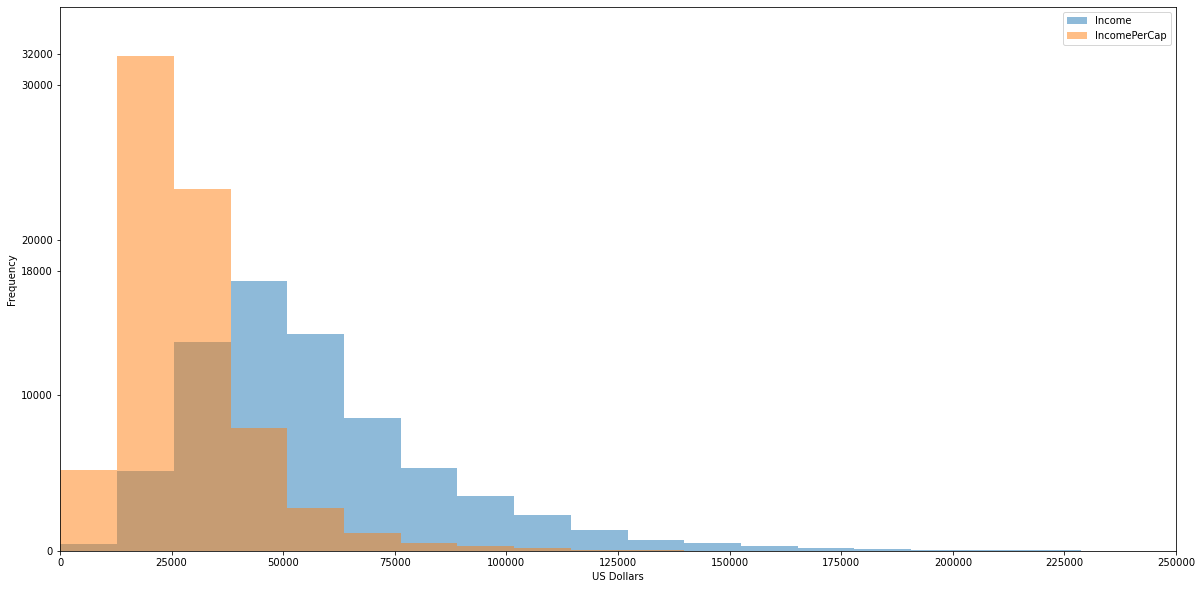

In [88]:
# Visualize two histagrams for 'Income' and 'IncomePerCap' in same plot with more x-axis ticks
ax = df[['Income', 'IncomePerCap']].plot(kind='hist', bins=20, figsize=(20,10), xlim=(0,250000), ylim=(0,35000), xlabel='US Dollars', ylabel='Frequency', xticks=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000], yticks=[0, 10000, 18000, 20000, 30000, 32000], alpha=0.5)
ax.set_xlabel('US Dollars')


*Your markdown for your discussion.*

The highest income per capita in a tract is about 135000 US dollars, whereas the highest median income in a tract is about 225000 US dollars. The most frequent income per capita in a tract is about 25000 US dollars. It occurs about 32000 times. Meanwhile the most frequent median income in a tract is about 50000 US dollars with about 18000 frequency. Generally we see that the median income are more frequent than income per capita in the US dollars scale starting from about 50000 US dollars. Meanwhile the income per capita is more frequent below ~50000 US dollars. 

## Aggregation for Visualization Pruposes
**b)** As the data contains too many rows for per-row visualizations, you should aggregate the data further before creating more interesting visualizations.
The following function will do the job for your; however, why didn't we simply run `groupby(...).mean()` to get the results for the columns
specified in `l_col`?

In [89]:
def my_aggregation(df):
    l_col = ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomePerCap', 
             'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 
             'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 
             'FamilyWork', 'Unemployment', 'INTPTLAT', 'INTPTLONG']
    df_tmp = df.copy()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].mul(df_tmp['TotalPop'], axis=0)
    df_tmp = df_tmp.groupby(['State', 'County'], observed=True).sum()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].div(df_tmp['TotalPop'], axis=0)
    return df_tmp


In [90]:
df = my_aggregation(df)
# display all the columns for the first 10 rows
pd.set_option('display.max_columns', None)
display(df.head(10))

TotalPop        Men      Women  Hispanic      White  \
State   County                                                               
Alabama Autauga    55253.997778  48.434887  51.568594  2.642546  75.856849   
        Baldwin   195170.839070  48.857848  51.134700  4.488181  83.002196   
        Barbour    26863.503003  53.855367  46.153208  4.713527  46.337913   
        Bibb       22677.565195  53.413070  46.561785  2.300174  74.439569   
        Blount     57809.081940  49.441549  50.587929  8.708269  88.048684   
        Bullock    10728.892849  53.002360  46.982468  4.425505  22.111715   
        Butler     20356.408941  46.678056  53.340172  1.244994  53.417010   
        Calhoun   116589.048889  48.207724  51.758618  3.464233  73.056882   
        Chambers   34072.226778  47.716947  52.306327  0.423083  57.350297   
        Cherokee   25956.603004  49.854617  50.130202  1.761480  91.837631   

                      Black    Native     Asian   Pacific    Citizen  \
State   County                                                         
Alabama Autauga   18.517057  0.429003  0.957841  0.018335  73.665310   
        Baldwin    9.451327  0.575898  0.663861  0.000381  75.686041   
        Barbour   46.648892  0.164449  0.425173  0.002802  76.931310   
        Bibb      21.274928  0.456621  0.106137  0.000623  77.335504   
        Blount     1.563644  0.287027  0.141126 -0.002487  73.447426   
        Bullock   70.651725  1.136139  0.174878 -0.006296  75.485814   
        Butler    43.698361  0.065138  0.364445  0.004932  76.477648   
        Calhoun   20.382640  0.181814  0.837923  0.008075  75.963217   
        Chambers  40.329565  0.150825  0.734920  0.023019  77.621616   
        Cherokee   4.620490  0.584369  0.313387  0.016129  79.165013   

                        Income  IncomePerCap    Poverty  ChildPoverty  \
State   County                                                          
Alabama Autauga   51654.027583  24921.844328  13.063685     18.653106   
        Baldwin   51055.965703  27325.600566  13.448932     19.465179   
        Barbour   32841.295620  16882.683518  26.395826     43.559123   
        Bibb      38892.276140  18517.359205  16.548866     27.153075   
        Blount    46108.023617  20495.255060  16.810309     26.876224   
        Bullock   33212.788821  17487.575812  24.550674     37.332300   
        Butler    32502.785004  18444.957564  25.341219     37.312590   
        Calhoun   42385.498756  21371.635079  21.074020     32.021974   
        Chambers  34109.495367  21121.045503  21.624467     37.147544   
        Cherokee  37116.216715  21735.043213  19.243369     28.413364   

                  Professional    Service     Office  Construction  \
State   County                                                       
Alabama Autauga      32.843279  17.153600  24.311038      8.555609   
        Baldwin      32.747578  17.955330  27.096618     10.901151   
        Barbour      26.110131  16.419098  23.298734     10.807105   
        Bibb         21.492148  17.996969  17.432336     19.301641   
        Blount       28.530711  13.932969  23.790082     13.613884   
        Bullock      19.619127  14.946506  20.232525     19.523180   
        Butler       26.858304  17.133349  22.139172      9.954058   
        Calhoun      26.695248  17.988757  24.200928     10.401359   
        Chambers     23.337642  14.724129  25.899794     11.291478   
        Cherokee     29.599843  15.938047  19.540428     13.481561   

                  Production      Drive    Carpool   Transit      Walk  \
State   County                                                           
Alabama Autauga    17.143645  87.549204   8.773106  0.079765  0.455777   
        Baldwin    11.325119  84.609172   8.966526  0.111513  1.041615   
        Barbour    23.258650  83.316533  11.059293  0.527731  1.972374   
        Bibb       23.774962  83.472632  13.184794  0.467095  0.621386   
        Blount     20.095858  84.919831  11.277295  0.36743

*Your markdown for your discussion.*
This results in only claculating the mean of the values without considering the total population of the tracts. The values should be weighted by the total population of the tract for calculating the mean for counties. 



**c)** Next, you should create an overview over column correlations particularly consideirng high/medium/and low incomes.

1) Create a copy `df_plot` of the aggregated dataframe.

In [91]:
df_plot = df.copy()

2) Append a column 'IncomeClass' to `df_plot` containing the 'Income' categories based on the following inter-percentile ranges:
    - low' iff the income is less than the 33% income percentile
    - 'medium' if the income is between the 33% and 66% percentile, and 
    - 'high' iff the income is above the 66% percentile

In [92]:
Q33 = df_plot['Income'].quantile(0.33)
Q66 = df_plot['Income'].quantile(0.66)

df_plot.loc[df_plot['Income'] < Q33, 'IncomeClass'] = 'low'
df_plot.loc[(df_plot['Income'] >= Q33) & (df_plot['Income'] <= Q66), 'IncomeClass'] = 'medium'
df_plot.loc[df_plot['Income'] > Q66, 'IncomeClass'] = 'high'


3) Project the dataframe on the columns that contain percent values (for the sake of readability), that is:

        ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']
        

In [93]:
print(df_plot.shape)
df_plot = df_plot[['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']]
print(df_plot.shape)

(3220, 39)
(3220, 29)


4) Create a parallel coordinates diagram that uses the 'IncomeClass' for coloring the lines. Rotate the x-axis labels by 90° to make them easier to read.
Briefly discuss your results. Do you observe any correlations? Please explain.
    

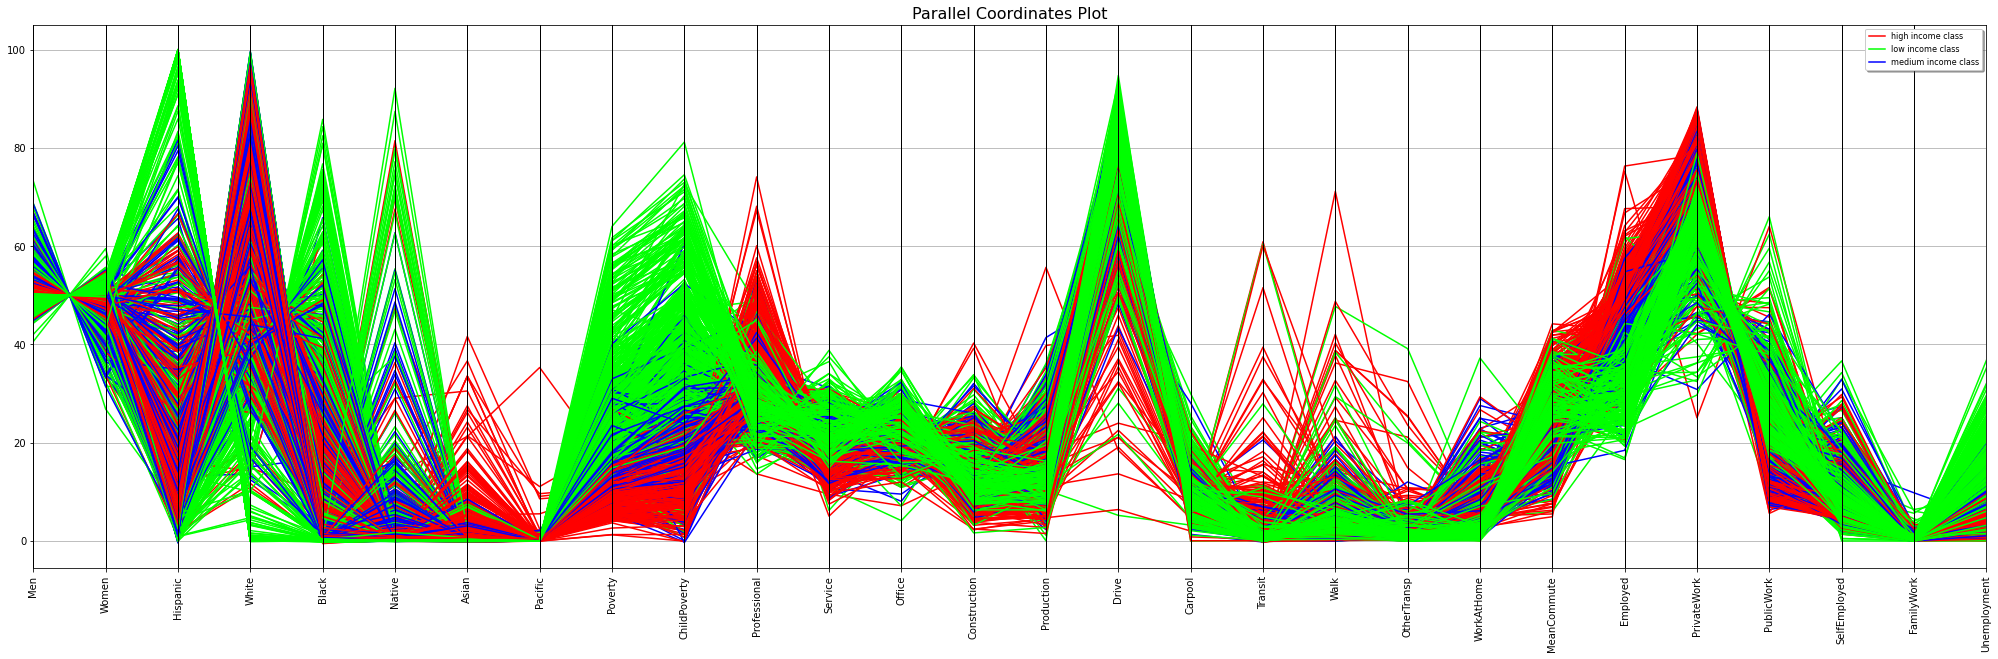

In [94]:

ax = pd.plotting.parallel_coordinates(df_plot, class_column='IncomeClass' , color=['#FF0000', '#00FF00', '#0000FF'])
ax.legend(loc=1, shadow=True, fontsize=8)
ax.set_title('Parallel Coordinates Plot', fontsize=16)
ax.figure.set_size_inches(35, 10)
# rotate x-axis labels by 90 degrees
ax.tick_params(axis='x', rotation=90)
labels = ax.get_legend().get_texts()

labels[0].set_text('high income class')
labels[1].set_text('low income class')
labels[2].set_text('medium income class')



- Counties that have relative high percentage of the ethnic group 'Hispanic' (above ~85%) have low income class.
- Counties that have relative high percentage of the ethnic group 'Black' (~above 65%) have low income class.
- There is a very strong correlation between the percenatge of the ethnic group 'Asian' and the income class of the county. 
    Where the counties with relativly high percentage of the ethnic group 'Asian' belong to the high income class, and the counties with low percentage of the ethnic group 'Asian' have low, or medium income class. 
- Counties that have high income class, have a lower percenatge of 'Poverty' and 'ChildPoverty'. 
- Counties that have low income class, have a higher percenatge of 'Poverty' and 'ChildPoverty'.
- Another correlation between the income class of a county and the unemployment rate is that counties with high income class have a lower unemployment rate.

## Advanced Visualization: Map

**d)** In this task, you are going to create an advanced visualization that exploits the geospatial nature of the data, that is, you will project the average 'Income' of each county and its population onto a map of the USA. \
You can use the following code to create a suitable map extend.

    ax.set_extent([-125, -66.5, 20, 50], ...)
        
Given this instance, plot one marker (e.g., circular marker) for each row in our aggregated dataset onto the map.
The color encoding should show the average 'Income' of the corresponding county, while the size should be chosen according to its population ('TotalPop'). If you want to modify the dataframe, create a **working copy** beforehand.

What do you observe?


In [95]:
df.head(10)

TotalPop        Men      Women  Hispanic      White  \
State   County                                                               
Alabama Autauga    55253.997778  48.434887  51.568594  2.642546  75.856849   
        Baldwin   195170.839070  48.857848  51.134700  4.488181  83.002196   
        Barbour    26863.503003  53.855367  46.153208  4.713527  46.337913   
        Bibb       22677.565195  53.413070  46.561785  2.300174  74.439569   
        Blount     57809.081940  49.441549  50.587929  8.708269  88.048684   
        Bullock    10728.892849  53.002360  46.982468  4.425505  22.111715   
        Butler     20356.408941  46.678056  53.340172  1.244994  53.417010   
        Calhoun   116589.048889  48.207724  51.758618  3.464233  73.056882   
        Chambers   34072.226778  47.716947  52.306327  0.423083  57.350297   
        Cherokee   25956.603004  49.854617  50.130202  1.761480  91.837631   

                      Black    Native     Asian   Pacific    Citizen  \
State   County                                                         
Alabama Autauga   18.517057  0.429003  0.957841  0.018335  73.665310   
        Baldwin    9.451327  0.575898  0.663861  0.000381  75.686041   
        Barbour   46.648892  0.164449  0.425173  0.002802  76.931310   
        Bibb      21.274928  0.456621  0.106137  0.000623  77.335504   
        Blount     1.563644  0.287027  0.141126 -0.002487  73.447426   
        Bullock   70.651725  1.136139  0.174878 -0.006296  75.485814   
        Butler    43.698361  0.065138  0.364445  0.004932  76.477648   
        Calhoun   20.382640  0.181814  0.837923  0.008075  75.963217   
        Chambers  40.329565  0.150825  0.734920  0.023019  77.621616   
        Cherokee   4.620490  0.584369  0.313387  0.016129  79.165013   

                        Income  IncomePerCap    Poverty  ChildPoverty  \
State   County                                                          
Alabama Autauga   51654.027583  24921.844328  13.063685     18.653106   
        Baldwin   51055.965703  27325.600566  13.448932     19.465179   
        Barbour   32841.295620  16882.683518  26.395826     43.559123   
        Bibb      38892.276140  18517.359205  16.548866     27.153075   
        Blount    46108.023617  20495.255060  16.810309     26.876224   
        Bullock   33212.788821  17487.575812  24.550674     37.332300   
        Butler    32502.785004  18444.957564  25.341219     37.312590   
        Calhoun   42385.498756  21371.635079  21.074020     32.021974   
        Chambers  34109.495367  21121.045503  21.624467     37.147544   
        Cherokee  37116.216715  21735.043213  19.243369     28.413364   

                  Professional    Service     Office  Construction  \
State   County                                                       
Alabama Autauga      32.843279  17.153600  24.311038      8.555609   
        Baldwin      32.747578  17.955330  27.096618     10.901151   
        Barbour      26.110131  16.419098  23.298734     10.807105   
        Bibb         21.492148  17.996969  17.432336     19.301641   
        Blount       28.530711  13.932969  23.790082     13.613884   
        Bullock      19.619127  14.946506  20.232525     19.523180   
        Butler       26.858304  17.133349  22.139172      9.954058   
        Calhoun      26.695248  17.988757  24.200928     10.401359   
        Chambers     23.337642  14.724129  25.899794     11.291478   
        Cherokee     29.599843  15.938047  19.540428     13.481561   

                  Production      Drive    Carpool   Transit      Walk  \
State   County                                                           
Alabama Autauga    17.143645  87.549204   8.773106  0.079765  0.455777   
        Baldwin    11.325119  84.609172   8.966526  0.111513  1.041615   
        Barbour    23.258650  83.316533  11.059293  0.527731  1.972374   
        Bibb       23.774962  83.472632  13.184794  0.467095  0.621386   
        Blount     20.095858  84.919831  11.277295  0.36743

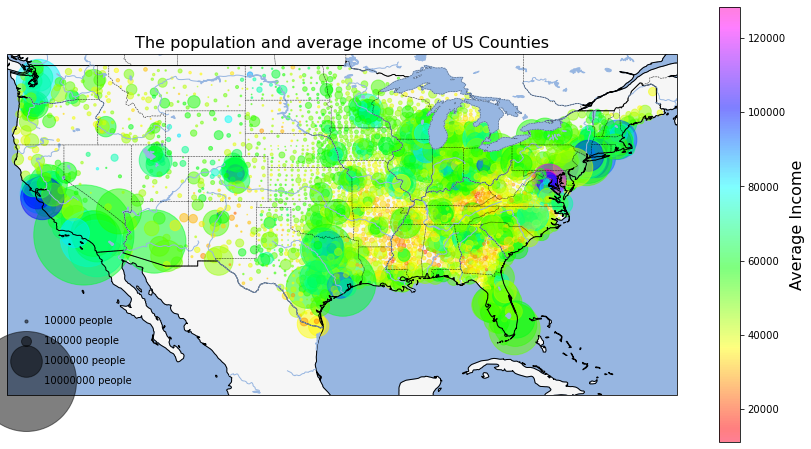

In [96]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
ax.set_extent([-125, -66, 20, 50], crs=ccrs.PlateCarree())
# change the color of the land to light grey
ax.add_feature(cfeature.LAND, facecolor='#f6f6f6')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linewidth=0.5, facecolor='none', zorder=2, alpha=0.5, linestyle='--')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.OCEAN)
ax.set_title('The population and average income of US Counties', fontsize=16)
 
# create a color map for the income
cmap = plt.get_cmap('gist_rainbow')

# plot the population density of each county in df_plot on the map
ax.scatter(df['INTPTLONG'], df['INTPTLAT'], s=df['TotalPop']*0.001, c=df['Income'], cmap=cmap , alpha=0.5, transform=ccrs.PlateCarree())
# make legend with dummy points 
for a in [10000, 100000, 1000000, 10000000]:
    ax.scatter([], [], s=a*0.001, c='k', alpha=0.5, label=str(a) + ' people')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left', fontsize=10)
# show legend of the colorbar of ax 
cbar = plt.colorbar(ax.collections[0], ax=ax, shrink=0.8)
cbar.set_label('Average Income', fontsize=16)
plt.show()




- Mid west counties have lower population than the rest of the US. 
- Washington D.C. has the highest average income. 
- The bay area counties have higher average income than the rest of the western counties.

# Q3 - Frequent Itemsets and Association Rules (12 points)


## Frequent Itemsets

**a)** Carry out some preprocessing steps before starting the analysis:

1) Load the `customer_data.csv`.

2) Select 90% of the `customer_data` dataset by random sampling. Use the matriculation number of one of the group members as seed.

3) After completing this preprocessing step, export your final dataset as `customer_data_2.csv` and use it for the next steps of the assignment.

In [97]:
customer_data = pd.read_csv('./dataset/customer_data.csv')
customer_data_sample = customer_data.sample(frac=0.9, random_state=seed)
customer_data_sample.to_csv('./dataset/customer_data_2.csv', index=False)

customer_data_2 = customer_data_sample.copy()

**b)** In this part, we want to get to know our customers by looking at the typical shared characteristics (e.g. "Married customers in their 40s like wine"). This would correspond to the itemset {Married, 40s, Wine}. 

1) Create a new dataframe called `customer_data_onehot` such that rows correspond to customers (as in the original data set) and columns correspond to the categories of each of the ten categorical attributes in the data. The new dataframe should only contain boolean values (True/False or 0/1s) such that the value in row $i$ and column $j$ is True (or 1) if and only if the attribute value corresponding to the column $j$ holds for the customer corresponding to row $i$. Display the dataframe.

*Hint: For example, for the attribute "Education" there are 5 possible categories: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Therefore, the new dataframe must contain one column for each of those attribute values.* 

In [98]:
customer_data_onehot = pd.get_dummies(customer_data_2, columns=customer_data_2.columns)

pd.set_option('display.max_columns', None)
customer_data_onehot.head(10)


Education_2n Cycle  Education_Basic  Education_Graduation  \
1216                   0                0                     0   
28                     0                0                     0   
2063                   1                0                     0   
80                     0                0                     0   
1160                   0                0                     0   
1269                   0                0                     0   
936                    1                0                     0   
1696                   0                0                     1   
329                    0                0                     0   
1207                   0                1                     0   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
1216                 1              0                      0   
28                   1              0                      0   
2063                 0              0                      0   
80                   1              0                      0   
1160                 1              0                      0   
1269                 0              1                      0   
936                  0              0                      0   
1696                 0              0                      0   
329                  0              1                      0   
1207                 0              0                      0   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
1216                     0                        0                       1   
28                       0                        1                       0   
2063                     0                        0                       1   
80                       0                        0                       1   
1160                     0                        0                       1   
1269                     0                        0                       1   
936                      0                        1                       0   
1696                     0                        0                       1   
329                      0                        0                       1   
1207                     0                        0                       0   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
1216                      0                        0                     0   
28                        0                        0                     0   
2063                      0                        0                     0   
80                        0                        0                     0   
1160                      0                        0                     0   
1269                      0                        0                     0   
936                       0                        0                     0   
1696                      0                        0                     0   
329                       0                        0                     0   
1207                      1                        0                     0   

      Marital_Status_YOLO  Age_Group_20s  Age_Group_30s  Age_Group_40s  \
1216                    0              0              0              0   
28                      0              1              0              0   
2063                    0              0              0              0   
80                      0              0              0              1   
1160                    0              0              0              0   
1269                    0              0              0              0   
936                     0              0              1              0   
1696                    0              0              0              1   
329                     0              0              0              1   
1207                    0              1              0              0   

      Age_Group_50s

2) Use the apriori algorithm to find the frequent itemsets with **min_support = 0.3** from the `customer_data_onehot` dataframe. Show the frequent itemsets that contain at least **3** items.

*Hint: The apriori algorithm of mlxtend needs a dataframe containing only boolean values as input.*

In [99]:
pd.set_option('display.max_colwidth', None)

# find the frequent itemsets with minimum support of 0.3 with apriori algorithm
frequent_itemsets = apriori(customer_data_onehot, min_support=0.3, use_colnames=True)
frequent_itemsets[frequent_itemsets["itemsets"].apply(len) >= 3]


support  \
53  0.312437   
54  0.354062   
55  0.311434   
56  0.311936   
57  0.311434   
58  0.371615   
59  0.329990   
60  0.367101   
61  0.313942   
62  0.320461   
63  0.350552   
64  0.317452   
65  0.321464   
66  0.342026   
67  0.321966   
68  0.384152   
69  0.414744   
70  0.334002   
71  0.385657   
72  0.309930   
73  0.329488   
74  0.345035   
75  0.329488   
76  0.340522   
77  0.305416   
78  0.376630   
79  0.330491   
80  0.382146   
81  0.334002   
82  0.338516   
83  0.392678   
84  0.313440   
85  0.322467   
86  0.309930   
87  0.307422   
88  0.307924   
89  0.304413   
90  0.334002   
91  0.302407   
92  0.301906   
93  0.311434   
94  0.301906   
95  0.309428   
96  0.362086   
97  0.319458   
98  0.322969   

                                                                                                       itemsets  
53                                           (Income_Class_High, Fruit_Preference_Fruits, Wine_Preference_Wine)  
54                                              (Income_Class_High, Meat_Preference_Meat, Wine_Preference_Wine)  
55                                          (Sweets_Preference_Sweets, Income_Class_High, Wine_Preference_Wine)  
56                                           (Meat_Preference_Meat, Fruit_Preference_Fruits, Income_Class_High)  
57                                          (Sweets_Preference_Sweets, Meat_Preference_Meat, Income_Class_High)  
58                                         (Fruit_Preference_No Fruits, Income_Class_Medium, Children_Children)  
59                                            (Meat_Preference_No Meat, Income_Class_Medium, Children_Children)  
60                                        (Income_Class_Medium, Children_Children, Sweets_Preference_No Sweets)  
61                                               (Income_Class_Medium, Purchase_Place_Store, Children_Children)  
62                                   (Fruit_Preference_No Fruits, Meat_Preference_No Meat, Income_Class_Medium)  
63                               (Fruit_Preference_No Fruits, Income_Class_Medium, Sweets_Preference_No Sweets)  
64                                  (Income_Class_Medium, Meat_Preference_No Meat, Sweets_Preference_No Sweets)  
65                                     (Fruit_Preference_No Fruits, Wine_Preference_No Wine, Children_Children)  
66                                        (Meat_Preference_No Meat, Wine_Preference_No Wine, Children_Children)  
67                                    (Wine_Preference_No Wine, Children_Children, Sweets_Preference_No Sweets)  
68                                     (Fruit_Preference_No Fruits, Meat_Preference_No Meat, Children_Children)  
69                                 (Fruit_Preference_No Fruits, Children_Children, Sweets_Preference_No Sweets)  
70                                        (Fruit_Preference_No Fruits, Purchase_Place_Store, Children_Children)  
71                                    (Meat_Preference_No Meat, Children_Children, Sweets_Preference_No Sweets)  
72                                           (Meat_Preference_No Meat, Purchase_Place_Store, Children_Children)  
73                                       (Children_Children, Purchase_Place_Store, Sweets_Preference_No Sweets)  
74                               (Fruit_Preference_No Fruits, Meat_Preference_No Meat, Wine_Preference_No Wine)  
75                           (Fruit_Preference_No Fruits, Wine_Preference_No Wine, Sweets_Preference_No Sweets)  
76                              (Meat_Preference_No Meat, Wine_Preference_No Wine, Sweets_Preference_No Sweets)  
77                                     (Meat_Preference_No Meat, Wine_Preference_No Wine, Purchase_Place_Store)  
78                                        (Meat_Preference_Meat, Fruit_Preference_Fruits, Wine_Preference_Wine)  
79                                    (Sweets_Preference_Sweets, Fruit_Preference_Fruits, Wine_Preference_Wine)  
80                                       (Sweets_Preference_

**c)** In the following we will investigate the effect of using the apriori property when determining the candidates for the frequent itemsets.

1) Implement the following join- and prune steps of the Apriori algorithm: \
   **join function:** a function that, given the frequent itemsets of size k, generates and yields a list of itemsets of size k+1. Only itemsets that share exactly k elements should be merged. \
   **prune function:** Given the set of candidate itemsets of size k+1 and the set of frequent itemsets of size k, remove the candidate sets that contain an infrequent subset of size k and return the rest.

In [100]:
# implement join function that, given the frequent itemsets of size k, generates and yields a list of itemsets of size k+1
def join(itemsets: frozenset, k: int):
    """
    :param itemsets: a frozenset of itemsets of size k
    :param k: the size of the itemsets
    :return: a frozenset of itemsets of size k+1
    """
    # Throw exception if k is less than 1
    if k < 1:
        raise ValueError('k must be greater than or equal to 1')
    # return an empty set if itemsets is empty
    if not itemsets:
        return frozenset()
        
    sets = [i.union(j) for i in itemsets for j in itemsets if len(i.union(j)) == k+1 and (len(i)== k ) and (len(j) == k) ]
    # sort the sets in ascending order and convert them to frozensets
    sets = map(frozenset, sets)
    sets = frozenset(sets)
    return sets
#print(join(frozenset({frozenset({'abc', 'bca'}), frozenset({'acc', 'bca'}), frozenset({'abc', 'bca'})}), 2))
#assert join([['a', 'b'], ['b', 'c']], 2) == [['a', 'b', 'c']]

In [101]:
def supportt(itemset:frozenset, transactions:pd.DataFrame):
    """
    :param itemset: a frozenset of an itemset
    :param transactions: a dataframe that contains a series of transactions
    :return: the support of the itemset in the series of transactions
    """
    trans_len = transactions.shape[0]
    trans_tmp = transactions.copy()

    trans_tmp['itemsets'] = trans_tmp.apply(lambda row: frozenset([col for col in trans_tmp.columns if row[col] == 1 ]), axis=1)
    trans_tmp['isSubset'] = trans_tmp['itemsets'].apply(lambda y: itemset.issubset(y))
    support_count = trans_tmp['isSubset'].sum()
    return support_count / trans_len
    

In [102]:
def prune(candidate_itemsets: frozenset, frequent_itemsets: frozenset, df_oh: pd.DataFrame):
    """
    Prune the candidate itemset by removing infrequent itemsets.
    :param candidate_itemset: A frozenset of candidate itemsets of size k+1.
    :param frequent_itemset: A frozenset of frequent itemsets of size k.
    :return: A frozenset of candidate itemsets of size k+1.
    """
    # return an empty set if the candidate itemset is empty
    if not candidate_itemsets:
        return frozenset()
    # Throw exception if candidate_itemset is empty
    #if not candidate_itemsets:
    #    raise ValueError('candidate_itemset cannot be empty')
    # Throw exception if frequent_itemset is empty
    if not frequent_itemsets:
        raise ValueError('frequent_itemset cannot be empty')
    # Convert candidate_itemset to list
    candidate_itemsets = list(candidate_itemsets)
    k = len(candidate_itemsets[0]) - 1 # k+1 is the size of itemsets in the candidate itemsets
    #print("k: ", k)
    # Check if all itemsets in the candidate_itemset are of size k+1
    if not all(len(i) == k+1 for i in candidate_itemsets):
        raise ValueError('All itemsets in candidate_itemset must be of size k+1')
    # Check if all itemsets in the frequent_itemset are of size k
    if not all(len(i) == k for i in frequent_itemsets):
        raise ValueError('All itemsets in frequent_itemset must be of size k')
 #   print("candidate_itemsets: ", candidate_itemsets)
    tmp = candidate_itemsets.copy()
    for candidate_itemset in tmp:
        candidate_itemset = set(candidate_itemset)
 #       print("This is candidate_itemset: ", candidate_itemset)
        subsets_of_size_k = []
        for i in candidate_itemset:
            #print("This is i: ", i)
            set_i = set([i])
            #print("This is set_i: ", set_i)
            set_candi = set(candidate_itemset)
            #print("This is set_candi: ", set_candi)
            set_diff = set_candi.difference(set_i)
            #print("This is set_diff: ", set_diff)
            subsets_of_size_k.append(set_diff)
        #print("This is subsets_of_size_k: ", subsets_of_size_k)
            #subsets_of_size_k = set([set(candidate_itemset).difference(set([i])) for i in candidate_itemset])
            #print("This is subsets of size k:", subsets_of_size_k)
        for subset in subsets_of_size_k:
            if subset not in frequent_itemsets:
                if candidate_itemset in candidate_itemsets:
                    candidate_itemsets.remove(candidate_itemset)
        #            print("removing candidate_itemset: ", candidate_itemset)            
        #print("This is candidate_itemsets: ", candidate_itemsets)
    candidate_itemsets_4_pruned_df = pd.DataFrame({'itemsets': candidate_itemsets})
    candidate_itemsets_4_pruned_df['support'] = candidate_itemsets_4_pruned_df['itemsets'].apply(lambda x: supportt(x, df_oh))
    candidate_itemsets_4_pruned_df = candidate_itemsets_4_pruned_df[candidate_itemsets_4_pruned_df['support'] >= min_sup]

    return (candidate_itemsets_4_pruned_df)
#print(prune(frozenset({frozenset({1,2,3}), frozenset({1,3,4}), frozenset({1,4,5})}), frozenset({frozenset({1,2}), frozenset({1,3}), frozenset({2,3})})))


2) To see the effect of the apriori property, compare the number of candidate itemsets of size 4 obtained with and without pruning from the itemsets of size three for different values for min_support. To this end, generate a list of tuples *(min_sup, C4_size, C4_size_pruned, L4_size)* as follows:

For $\textrm{min\_support} \in [0.1,0.2,...,0.8,0.9,1]$, repeat:

1. Obtain all frequent itemsets of size three using the apriori algorithm.

2. Using the result from 1., generate all itemsets of size four by applying your **join function** $\rightarrow$ C4_size.

3. Prune the result from 2. using your **prune function** $\rightarrow$ C4_size_pruned.

4. Compute the frequent itemsets of size four by using the apriori algorithm $\rightarrow$ L4_size.

In [103]:
def compare_candidate_itemsets(df_oh, min_sup):
    
    # step1: obtain all frequent itemsets of size 3
    frequent_itemsets = apriori(df_oh, min_support=min_sup, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    frequent_itemsets_3 = frequent_itemsets[frequent_itemsets['length'] == 3]
    
    # step2: generate all itemsets of size four by applying join function
    candidate_itemsets_4 = join(frozenset(frequent_itemsets_3['itemsets'].tolist()), 3)

    # step3: prune the candidate itemsets of size 4 by applying prune function
    candidate_itemsets_4_pruned_df = prune(candidate_itemsets_4, frozenset(frequent_itemsets_3['itemsets']), df_oh)
    #print("This is candidate_itemsets_4_pruned: ", candidate_itemsets_4_pruned)
    # create a dataframe to store the candidate itemsets of size 4 with index of the length of candidate itemsets
    #candidate_itemsets_4_pruned_df = pd.DataFrame({'itemsets': candidate_itemsets_4_pruned})
    #candidate_itemsets_4_pruned_df['support'] = candidate_itemsets_4_pruned_df['itemsets'].apply(lambda x: supportt(x, df_oh))
    #display(candidate_itemsets_4_pruned_df)
    # drop the itemsets that do not meet the minimum support
    #candidate_itemsets_4_pruned_df = candidate_itemsets_4_pruned_df[candidate_itemsets_4_pruned_df['support'] >= min_sup]
    
    # step4: compute the frequent itemsets of size 4 by applying apriori algorithm
    frequent_itemsets_4 = apriori(df_oh, min_support=min_sup, use_colnames=True)
    frequent_itemsets_4 = frequent_itemsets_4[frequent_itemsets_4['itemsets'].str.len() == 4]
    return (min_sup, len(candidate_itemsets_4), len(candidate_itemsets_4_pruned_df), frequent_itemsets_4.shape[0])

compare = []
min_sups = [x/10 for x in range(1,11)]
for min_sup in min_sups:
    compare.append(compare_candidate_itemsets(customer_data_onehot, min_sup))
    

3) Plot the number of candidate sets with and without pruning and the number of frequent itemsets of size four against the corresponding min_sup value. Interpret the plot.

min_sup  size_candidate_itemsets_4  size_candidate_itemsets_4_pruned  \
0      0.1                       1217                               258   
1      0.2                        110                                54   
2      0.3                         39                                12   
3      0.4                          0                                 0   
4      0.5                          0                                 0   
5      0.6                          0                                 0   
6      0.7                          0                                 0   
7      0.8                          0                                 0   
8      0.9                          0                                 0   
9      1.0                          0                                 0   

   size_frequent_itemsets_4  
0                       258  
1                        54  
2                        12  
3                         0  
4                         0  
5                         0  
6                         0  
7                         0  
8                         0  
9                         0

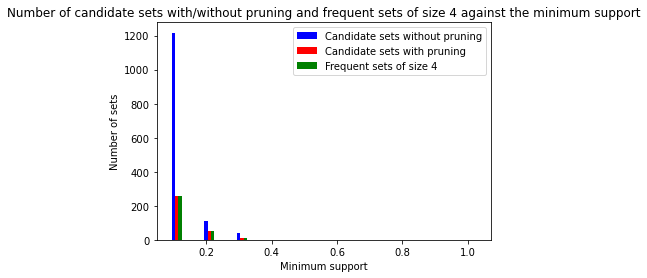

In [104]:
# Plot the number of candidate sets with and without pruning and the number of frequent sets of size 4 against the minimum support
min_sup = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plotting = compare
plotting_df = pd.DataFrame(plotting, columns=['min_sup', 'size_candidate_itemsets_4', 'size_candidate_itemsets_4_pruned', 'size_frequent_itemsets_4'])
display(plotting_df)

width= 0.01
ax = plt.subplot(111)
ax.bar(plotting_df['min_sup'], plotting_df['size_candidate_itemsets_4'], label='Candidate sets without pruning', color='b', width=width, align='center')
ax.bar(plotting_df['min_sup']+ width, plotting_df['size_candidate_itemsets_4_pruned'], label='Candidate sets with pruning', color='r', width=width, align='center')
ax.bar(plotting_df['min_sup']+ width*2, plotting_df['size_frequent_itemsets_4'], label='Frequent sets of size 4', color='g', width=width, align='center')
ax.set_xlabel('Minimum support')
ax.set_ylabel('Number of sets')
ax.set_title('Number of candidate sets with/without pruning and frequent sets of size 4 against the minimum support')
ax.legend()
plt.show()

#plt.plot(plotting_df['min_sup'], plotting_df['size_candidate_itemsets_4'], 'r-', plotting_df['min_sup'], plotting_df['size_candidate_itemsets_4_pruned'], 'b-', plotting_df['min_sup'], plotting_df['size_frequent_itemsets_4'], 'g-')
#plt.legend(['Candidate sets without pruning', 'Candidate sets with pruning', 'Frequent sets of size 4'])


*Your markdown for your discussion.*

The figure show the number of candidate sets with/without pruning for different min_support values in addition to the frequent sets of size 4. The figure shows that the number of candidate sets with pruning is smaller for higher min_support values. The figure also shows that the number of frequent itemsets of size 4 is smaller for higher min_support values. The affect of the apriori property is that the number of candidate sets with pruning is smaller for higher min_support values. In conclusion, the apriori property is useful when determining the candidates for frequent itemsets. In addition, we see that the results of the function prune are matching the frequent sets, which means the functions are implemented/run correctly for this test data.



d) Use the FP-Growth algorithm to obtain all frequent itemsets with **min_support = 0.3** from `customer_data_onehot`.

In [105]:
# use fp-growth algorithm to find frequent itemsets with min_support = 0.3 from customer_data_onehot
frequent_itemsets_fp = fpgrowth(customer_data_onehot, min_support=0.3, use_colnames=True)


## Association Rules

**d)** In the following, you should generate association rules from the frequent itemsets.

1) Using only the frequent itemsets with min_support=0.3, generate different association rules using minimum confidence equal to 0.6 as a metric. Show the association rules.

In [106]:
association_rules_df = arule(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)

2) From the association rules obtained in task (d) 1), provide the three rules with the highest lift. Comment on them.

In [107]:
# display the rules with highest lift 
association_rules_df.sort_values(by=['lift'], ascending=False, inplace=True)
display(association_rules_df.head(3))



antecedents  \
340         (Meat_Preference_Meat, Income_Class_High)   
345   (Fruit_Preference_Fruits, Wine_Preference_Wine)   
364  (Sweets_Preference_Sweets, Wine_Preference_Wine)   

                                         consequents  antecedent support  \
340  (Fruit_Preference_Fruits, Wine_Preference_Wine)            0.359579   
345        (Meat_Preference_Meat, Income_Class_High)            0.392177   
364        (Meat_Preference_Meat, Income_Class_High)            0.393681   

     consequent support   support  confidence      lift  leverage  conviction  
340            0.392177  0.307422    0.854951  2.180016  0.166404    4.190475  
345            0.359579  0.307422    0.783887  2.180016  0.166404    2.963369  
364            0.359579  0.307924    0.782166  2.175228  0.166364    2.939946

 - Association rule {Wine_Preference_Wine, Fruit_Preference_Fruits} => {Meat_Preference_Meat, Income_Class_High} indicates that the customers who like wine and fruits are also more likely to like meat and have high income with confidance 0.7. 
- Associtation rule {Meat_Preference_Meat, Income_Class_High} => {Wine_Preference_Wine, Fruit_Preference_Fruits} indicates that the customers who like meat and have high income are also more likely to like wine and fruits with confidance 0.85.
- Association rule {Meat_Preference_Meat, Income_Class_High} => {Wine_Preference_Wine, Sweets_Preference_Sweets} indicates that the the customers who like meat and have high income are also more likely to like wine and sweets with confidance 0.85. 

# Q4 - Text Mining (15 points)
In this question, you will use the scripts of some Harry Potter movies. First, you will try to predict the character given a line in the script. Afterwards, using N-grams, you will generate sentences for some of the characters.

**a)** In this part, you will preprocess and reconstruct the data to make it suitable for the following tasks.

1) Load each of the datasets <b>hp_1.csv</b>, <b>hp_2.csv</b>, and <b>hp_3.csv</b> into its own dataframe and show the set of characters (here: a fictional character) appearing in each dataset.

In [108]:
hp_1 = pd.read_csv('./dataset/hp_1.csv')
hp_2 = pd.read_csv('./dataset/hp_2.csv')
hp_3 = pd.read_csv('./dataset/hp_3.csv')
# show the set of characters in each dataset
print("Set of charecters in hp_1:", hp_1['Character'].unique(), "\n")
print("Set of charecters in hp_2:", hp_2['Character'].unique(), "\n")
print("Set of charecters in hp_3:", hp_3['Character'].unique())


Set of charecters in hp_1: ['Dumbledore' 'McGonagall' 'Hagrid' 'Petunia' 'Dudley' 'Vernon' 'Harry'
 'Snake' 'Someone' 'Barkeep\xa0Tom' 'Man' 'Witch' 'Quirrell' 'Boy'
 'Goblin' 'Griphook' 'Ollivander' 'Trainmaster' 'Mrs. Weasley' 'George'
 'Fred' 'Ginny' 'Ron' 'Woman' 'Hermione' 'Neville' 'Malfoy' 'Whispers'
 'Sorting Hat' 'Seamus' 'Percy' 'Sir Nicholas' 'Girl' 'Man in paint'
 'Fat Lady' 'Snape' 'Dean' 'Madam Hooch' 'Class' 'Harry ' 'Fred  ' 'Ron  '
 'George  ' 'Harry  ' 'Hermione  ' 'Ron ' 'Hermione ' 'Filch' 'All  '
 'Oliver ' 'Oliver  ' 'Flitwick' 'Draco  ' 'Flitwick  ' 'Seamus  '
 'Girl  ' 'Boy  ' 'Percy  ' 'McGonagall ' 'Ron and Harry' 'McGonagall  '
 'Quirrell  ' 'Snape  ' 'OIiver  ' 'Lee Jordan' 'Hagrid ' 'Gryffindors  '
 'Flint  ' 'Crowd  ' 'Flint' 'Hagrid  ' 'Man  ' 'Lee  Jordan'
 'Madam Hooch ' 'Quirrell ' 'Filch  ' 'Dumbledore  ' 'Hermoine'
 'Ron and Harry  ' 'All 3  ' 'Filch ' 'Firenze  ' 'Firenze ' 'Snape '
 'Neville  ' 'Ron   ' 'Voldemort ' 'Voldemort' 'Voldemort  ' 'Dumbl

In [109]:
# Removing \xa0, \xa0&, \n and trailing white spaces
def clean_characters(df, col):
    df[col] = df[col].str.replace(r"\n", " ")
    df[col] = df[col].str.replace(r"\xa0", " ")
    df[col] = df[col].str.lstrip()
    df[col] = df[col].str.rstrip()
    df[col] = df[col].str.title()
    return df

hp_1 = clean_characters(hp_1, "Character")
hp_2 = clean_characters(hp_2, "Character")
hp_3 = clean_characters(hp_3, "Character")

print("Set of charecters in hp_1:", hp_1['Character'].unique(), "\n")
print("Set of charecters in hp_2:", hp_2['Character'].unique(), "\n")
print("Set of charecters in hp_3:", hp_3['Character'].unique())

Set of charecters in hp_1: ['Dumbledore' 'Mcgonagall' 'Hagrid' 'Petunia' 'Dudley' 'Vernon' 'Harry'
 'Snake' 'Someone' 'Barkeep Tom' 'Man' 'Witch' 'Quirrell' 'Boy' 'Goblin'
 'Griphook' 'Ollivander' 'Trainmaster' 'Mrs. Weasley' 'George' 'Fred'
 'Ginny' 'Ron' 'Woman' 'Hermione' 'Neville' 'Malfoy' 'Whispers'
 'Sorting Hat' 'Seamus' 'Percy' 'Sir Nicholas' 'Girl' 'Man In Paint'
 'Fat Lady' 'Snape' 'Dean' 'Madam Hooch' 'Class' 'Filch' 'All' 'Oliver'
 'Flitwick' 'Draco' 'Ron And Harry' 'Oiiver' 'Lee Jordan' 'Gryffindors'
 'Flint' 'Crowd' 'Lee  Jordan' 'Hermoine' 'All 3' 'Firenze' 'Voldemort'
 'Students'] 

Set of charecters in hp_2: ['Harry' 'Vernon' 'Petunia' 'Uncle Vernon' 'Dudley' 'Aunt Petunia' 'Dobby'
 'Ron' 'George' 'Fred' 'Aunt Petunia & Dudley' 'Mrs. Weasley' 'Ginny'
 'Mr. Weasley' 'Fred, George, Ron' 'Fred, George, Ron, Harry' 'Percy'
 'Mr. Borgin' 'Lucius Malfoy' 'Draco' 'Witch' 'Hagrid' 'Hermione' 'Man'
 'Photographer' 'Lockhart' 'Trainmaster' 'Harry And Ron' 'Filch' 'Snape'
 'Dumbl

<ipython-input-109-88a27a0a0597>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r"\n", " ")
<ipython-input-109-88a27a0a0597>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r"\xa0", " ")


2) Merge the three datasets into a single dataframe called `hp_df` that comprises only the lines spoken from one of the four characters *Harry, Hermione, Dumbledore, and Snape*. Your new dataframe must contain two columns: one for the (four) characters and the other for the lines. You can name those columns "Character" and "Sentence" as in the original data. \
    Make sure that `hp_df` contains a single unique spelling for each of the characters. \
    Make sure that `hp_df` includes all lines (here: script lines) of a character even if this character is spelled slightly differently (e.g., Dumbledore or dumbledore) in the original dataset. \
    Show the first few lines of your dataframe.
    
*Hint: Be aware of white space characters!*

In [110]:
hp_df = pd.concat([hp_1, hp_2, hp_3])

###
# As mentioned on this link (https://moodle.rwth-aachen.de/mod/forum/discuss.php?d=134581)
# we take the sentences that are only spoken by one the of the given characters
# and not multiple characters simultaneously
###

hp_df = hp_df[
    (hp_df['Character'] == "Harry") |
    (hp_df['Character'] == "Hermione") |
    (hp_df['Character'] == "Dumbledore") |
    (hp_df['Character'] == "Snape")
]

print("Number of unique characters in hp_df:", hp_df['Character'].unique())

hp_df.head(10)

Number of unique characters in hp_df: ['Dumbledore' 'Harry' 'Hermione' 'Snape']


Character  \
0   Dumbledore   
3   Dumbledore   
4   Dumbledore   
6   Dumbledore   
8   Dumbledore   
11  Dumbledore   
16  Dumbledore   
20  Dumbledore   
23  Dumbledore   
24  Dumbledore   

                                                                Sentence  
0        I should've known that you would be here, Professor McGonagall.  
3                                              I'm afraid so, professor.  
4                                                  The good and the bad.  
6                                                Hagrid is bringing him.  
8                      Ah, Professor, I would trust Hagrid with my life.  
11                                         No problems, I trust, Hagrid?  
16  Albus, do you really think it's safe, leaving him with these people?  
20                                               The only family he has.  
23                                                              Exactly.  
24                 He's far better off growing up away from all of that.

3) Create the `hp_sampled` dataset which includes 90% of the `hp_df` data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. 

In [111]:
hp_sampled = hp_df.sample(frac=0.9, random_state=seed)
hp_sampled.to_csv('./dataset/hp_sampled.csv', index=False)

**b)** In this part, you are going to train a classifier that, given a line from the script, predicts the character. For each character, the data contains many sentences belonging to that character. Note that sometimes the "Sentence" column in the original dataset contains more than one sentence. The set of sentences for each character should be seen as the set of example documents belonging to that character (the class). Each individual sentence is a single document. The whole corpus consists of all the individual sentences.

1) Create a new dataframe called `hp_processed` from the dataframe `hp_sampled` such that the new dataframe contains again the columns "Character" and "Sentence", but every entry in the "Sentence" column must be a single sentence. Display the shape of the dataframe and compare it to the shape of `hp_sampled`.

In [112]:
def tokenize_sentences(row):
    row["Sentence"] = sent_tokenize(row["Sentence"])
    if( len(row["Sentence"]) == 1 ):
        row["Sentence"] = row["Sentence"][0]
    
    return row

hp_sampled_duplicate = hp_sampled.copy()

hp_sampled_duplicate = hp_sampled_duplicate.apply(tokenize_sentences,axis=1)
hp_processed = hp_sampled_duplicate.explode(column = "Sentence", ignore_index=True)

print("Shape of hp_sampled", hp_sampled.shape)
print("Shape of hp_processed", hp_processed.shape)

hp_processed.head(10)

Shape of hp_sampled (1686, 2)
Shape of hp_processed (1926, 2)


Character  \
0     Harry   
1     Harry   
2     Harry   
3     Harry   
4     Harry   
5     Harry   
6     Snape   
7     Snape   
8  Hermione   
9  Hermione   

                                                                                             Sentence  
0                                                                                    This is it, Ron.  
1                                             I think this is the entrance to the Chamber of Secrets.  
2                                                                What were you doing down there then?  
3                                                                                            Stop it!  
4                                                                        We've got loads to tell you.  
5                                                                 I said we'd take you to the castle.  
6  The term "werewolf" is a contraction of the Anglo-Saxon word "were" which means "man," and "wolf."  
7                                                                                 Werewolf, man-wolf.  
8        Do you remember me telling you that the Polyjuice Potion was only for human transformations?  
9                                                                                               Help!

2) Split the preprocessed data `hp_processed` into training (80%) and test (20%) data preserving the distribution based on "Character". 

In [113]:
hp_processed_train, hp_processed_test = train_test_split(
    hp_processed, test_size = 0.20,
    stratify = hp_processed["Character"]
)

print("Shape of hp_processed_train", hp_processed_train.shape)
print("Shape of hp_processed_test", hp_processed_test.shape, "\n")

# preserving class balance
print("Class count in hp_processed_train \n", hp_processed_train["Character"].value_counts())
print("Class count in hp_processed_test \n", hp_processed_test["Character"].value_counts())

Shape of hp_processed_train (1540, 2)
Shape of hp_processed_test (386, 2) 

Class count in hp_processed_train 
 Harry         849
Hermione      400
Dumbledore    192
Snape          99
Name: Character, dtype: int64
Class count in hp_processed_test 
 Harry         213
Hermione      100
Dumbledore     48
Snape          25
Name: Character, dtype: int64


3) Preprocess the training and test corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal) and obtain a boolean document-term matrix (i.e, each row in the matrix contains only 1s and 0s depending on whether a particular word appears in a sentence or not). Train a logistic classifier on the training corpus with the character as target feature. Use the classifier to predict the character of the sentences in the test corpus and show its accuracy on the test corpus. Comment on the result.

In [114]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
count_vectorizer = CountVectorizer()

def preprocess_sentences(sentence):
    sentence["Sentence"] = sentence["Sentence"].lower()
    sentence["Sentence"] = word_tokenize(sentence["Sentence"]) #tokenization
    sentence["Sentence"] = [word for word in sentence["Sentence"] if word.isalnum()] #punctuations
    sentence["Sentence"] = [lemmatizer.lemmatize(word) for word in sentence["Sentence"]] #lemmatization
    sentence["Sentence"] = [word for word in sentence["Sentence"] if not word in stopwords.words()] #stopword removal
    sentence["Sentence"] = " ".join(sentence["Sentence"]) # back to one string
    return sentence

def create_dt_matrix(df, train = False):
    df_pre_processed = df.apply(preprocess_sentences, axis=1) # lowercase, tokenization, punctuation, stopword, lemmatization

    # we observe that some sentences are just empty after
    # all the processing, so we decided to remove them from
    # the dataset
    # (see the next code cell for distribution of character
    # labels)
    indices_to_keep = df_pre_processed["Sentence"] != ""
    df_pre_processed = df_pre_processed.loc[indices_to_keep, :]
    labels = df.loc[indices_to_keep, "Character"]

    # learn vocabulary from training data
    if train:
        count_vectorizer.fit(df_pre_processed["Sentence"].tolist())
    
    dt_matrix = count_vectorizer.transform(df_pre_processed["Sentence"].tolist())
    return dt_matrix, labels

dt_matrix_train, train_labels = create_dt_matrix(hp_processed_train, train = True)
dt_matrix_test, test_labels = create_dt_matrix(hp_processed_test)


[nltk_data] Downloading package wordnet to /home/botgod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/botgod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# after removing rows with empty sentences, we are still able to maintain similar distribution of class labels
train_labels.value_counts()

Harry         761
Hermione      373
Dumbledore    185
Snape          95
Name: Character, dtype: int64

In [116]:
dt_matrix_classifier = SGDClassifier(loss="log", n_jobs=-1)
dt_matrix_classifier.fit(dt_matrix_train, train_labels)

SGDClassifier(loss='log', n_jobs=-1)

In [117]:
predicted_test_labels = dt_matrix_classifier.predict(dt_matrix_test)
accuracy = np.mean(predicted_test_labels == test_labels)
print("Accuracy on test set = ", accuracy)

Accuracy on test set =  0.5710144927536231


In [118]:
# analysis for markdown discussion
print("Vocabulary size for document term matrix = ", dt_matrix_train.shape[1])
print("Average number of vocab words in each sentence = ", np.mean(dt_matrix_train.sum(axis=1)))

Vocabulary size for document term matrix =  1231
Average number of vocab words in each sentence =  2.5233380480905234


*Your markdown for your discussion.*

As it can be clearly seen that for a vocabulary size of 1230 words and each sentence have an average of (just over) 2 words implies that only very few words would have decision making impact when predicting labels and thus it would not generalize to the new data.

4) Next, you are going to perform the same predicting task based on doc2vec.

1. Preprocess the training corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal). 
2. Create a doc2vec model to reduce the dimension of the document vector. Choose a vector size 4-8 and ignore all words whose count is lower than 3.
3. Train the doc2vec model on the training data (thus creating an embedding).
4. Use the created embedding to convert the training set to a set of document vectors.
5. Train a logistic classifier on the train data with the character as target feature.
6. Show the accuracy of prediction on the test data and comment on it.

In [119]:
doc2vec = Doc2Vec(vector_size=6, min_count=3)

def create_doc2vec(df, train = False):
    df_pre_processed = df.apply(preprocess_sentences, axis = 1)

    # Doc2Vec, TaggedDocument
    tagged_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_pre_processed["Sentence"].tolist())]

    if train:
        doc2vec.build_vocab(tagged_documents)
        doc2vec.train(
            corpus_iterable=tagged_documents,
            total_examples=doc2vec.corpus_count,
            epochs = 100
        )
        
    vectors = [doc2vec.infer_vector(doc.split(" ")) for doc in df_pre_processed["Sentence"].tolist()]
    
    return vectors

doc2vec_train = create_doc2vec(hp_processed_train, train = True)
doc2vec_test = create_doc2vec(hp_processed_test)

In [120]:
doc2vec_classifier = SGDClassifier(loss="log", n_jobs=-1)
doc2vec_classifier.fit(X = doc2vec_train, y = hp_processed_train["Character"])

SGDClassifier(loss='log', n_jobs=-1)

In [121]:
predicted_test_labels = doc2vec_classifier.predict(doc2vec_test)
accuracy = np.mean(predicted_test_labels == hp_processed_test["Character"])
print("Accuracy on test set = ", accuracy)

Accuracy on test set =  0.5518134715025906


**c)** For the following tasks use the `hp_processed` (the data before splitting into training and test data).

1) For each character, create a list containing all sentences of that character.
    For each character separately, build a bigram language model using MLE. Do not perform stemming and stopword removal for this task, but apply other preprocessing steps such as to lowercase, no punctuation, and tokenization. Use both right and left padding.

In [122]:
sentences_by_char = {}
bigram_by_char = {}

def tokens_punc_lower(sentence):
    sentence["Sentence"] = sentence["Sentence"].lower()
    sentence["Sentence"] = word_tokenize(sentence["Sentence"]) #tokenization
    sentence["Sentence"] = [word for word in sentence["Sentence"] if word.isalnum()] #punctuations
    return sentence

for (character, character_df) in hp_processed.groupby("Character"):
    character_df = character_df.apply(tokens_punc_lower, axis=1)
    sentences_by_char[character] = character_df["Sentence"].tolist()

for character in sentences_by_char.keys():
    padded_tuples, vocab = padded_everygram_pipeline(2, sentences_by_char[character])
    bigram_by_char[character] = MLE(2)
    bigram_by_char[character].fit(padded_tuples, vocab)

2) For each character, use the created language model to generate a sentence of ten words. Display the sentences.

In [123]:
for character in sentences_by_char.keys():
    print('Sentence by {} : '.format(character), " ".join(bigram_by_char[character].generate(10)))

Sentence by Dumbledore :  look beyond the appropriate action </s> this to live </s>
Sentence by Harry :  move </s> but you got to inform you </s> </s>
Sentence by Hermione :  </s> </s> <s> crookshanks just found him </s> you attacked
Sentence by Snape :  </s> the power of fear </s> of underage wizardry </s>


3) Build a 4-gram model with the same data as in the previous task. Use both right and left padding.

In [124]:
quadgram_by_char = {}

for character in sentences_by_char.keys():
    padded_tuples, vocab = padded_everygram_pipeline(4, sentences_by_char[character])
    quadgram_by_char[character] = MLE(4)
    quadgram_by_char[character].fit(padded_tuples, vocab)

4) For each character, use the created 4-gram language model to generate a sentence of ten words. Display the sentences.

In [125]:
for character in sentences_by_char.keys():
    print('Sentence by {} : '.format(character), " ".join(quadgram_by_char[character].generate(10)))

Sentence by Dumbledore :  we enter a world that entirely our own </s> </s>
Sentence by Harry :  <s> <s> <s> you been sacked </s> </s> </s> </s>
Sentence by Hermione :  </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>
Sentence by Snape :  work for you even if it is against slytherin </s>


5) Compare the sentences generated by the bigram model with the sentences generated by the 4-gram model.

*Your markdown for your discussion.*

The sentences generated by bi-grams do not much meaning whereas the sentences generated by 4-gram makes more sense. This is expected as the 4-gram model uses more context to predict its next word and thus generates better sentences.

# Q5 - Process Mining (23 points)

In this task, we consider a simulated process of students that participate in an online course.
The course comprises 6 batches of lecture material as well as a mandatory assignment to be delivered in two parts. (Note that in this process, it is not required to achieve a certain score in the assignment in order to be admitted to the exam.)

While there are strict deadlines for the assignment and the exam, there is only a recommended schedule for the lecture material (i.e., consume material in order).

The system logs for every student, among other activities, when he downloads a certain lecture material batch. 

## Loading the Data and Basic Statistics

**a)** Load the data **log.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - 'Activity' is the activity key
 - 'Student' is the case ID
 - 'Timestamp' is the timestamp

In [4]:
df = pd.read_csv('./dataset/log.csv', sep=',')
formatted_df = pm4py.format_dataframe(
    df,
    case_id='Student',
    activity_key='Activity',
    timestamp_key='Timestamp'
)

display(formatted_df.head())
log = log_converter.apply(formatted_df)

time:timestamp case:concept:name                concept:name  \
1413 2021-10-05 21:29:31+00:00            343516                    Register   
6537 2021-12-03 08:30:11+00:00            343516                Assignment 1   
7060 2021-12-03 21:39:25+00:00            343516  Consume Lecture Material 3   
8198 2021-12-05 04:04:49+00:00            343516  Consume Lecture Material 1   
8868 2021-12-06 05:21:45+00:00            343516  Consume Lecture Material 2   

     Lifecycle  Points  @@index  
1413  complete     NaN     1413  
6537  complete    78.0     6537  
7060  complete     NaN     7060  
8198  complete     NaN     8198  
8868  complete     NaN     8868

**b)** Compute the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [19]:
print("Total number of events: ", len(formatted_df["concept:name"].unique()))
print("Total number of cases: ", len(log))
print("Earliest timestamp (UTC): ", min(formatted_df["time:timestamp"]))
print("Latest timestamp (UTC): ", max(formatted_df["time:timestamp"]))

variants = variants_filter.get_variants(log)
no_variants = len(variants.keys())

print("Number of Variants: ", no_variants)


Total number of events:  12
Total number of cases:  2000
Earliest timestamp (UTC):  2021-09-15 00:18:18+00:00
Latest timestamp (UTC):  2022-02-20 14:00:00+00:00
Number of Variants:  432


**c)** Usually, it is insightful to have a look at the distribution of the variants in terms of how often a certain variant is present in the log.
Therefore, create a **scatter plot** that shows the distribution of the variants as follows:
- x-axis: The variants (in ascending order of their support)
- y-axis: Frequency of the variant in the log (total or relative)

variant  \
431            Register,Assignment 1,Assignment 2,Consume Lecture Material 1,Consume Lecture Material 2,Consume Lecture Material 3,Consume Lecture Material 4,Consume Lecture Material 5,Consume Lecture Material 6,Exam   
384                                                                                                        Register,Assignment 1,Assignment 2,Consume Lecture Material 2,Consume Lecture Material 3,Withdraw from Course   
336            Register,Assignment 1,Assignment 2,Consume Lecture Material 4,Consume Lecture Material 1,Consume Lecture Material 5,Consume Lecture Material 6,Consume Lecture Material 2,Consume Lecture Material 3,Exam   
288            Register,Assignment 1,Assignment 2,Consume Lecture Material 5,Consume Lecture Material 4,Consume Lecture Material 3,Consume Lecture Material 6,Consume Lecture Material 2,Consume Lecture Material 1,Exam   
240  Register,Assignment 1,Consume Lecture Material 1,Consume Lecture Material 3,Consume Lecture Material 2,Consume Lecture Material 4,Assignment 2,Consume Lecture Material 6,Consume Lecture Material 5,Final Q&A,Exam   
192                                                                               Register,Assignment 2,Consume Lecture Material 6,Consume Lecture Material 2,Consume Lecture Material 4,Consume Lecture Material 1,Exam   
144  Register,Consume Lecture Material 3,Assignment 1,Consume Lecture Material 1,Consume Lecture Material 2,Assignment 2,Consume Lecture Material 6,Consume Lecture Material 4,Consume Lecture Material 5,Final Q&A,Exam   
96   Register,Assignment 1,Consume Lecture Material 2,Consume Lecture Material 1,Consume Lecture Material 3,Consume Lecture Material 6,Consume Lecture Material 5,Assignment 2,Consume Lecture Material 4,Final Q&A,Exam   
48   Register,Assignment 1,Consume Lecture Material 3,Consume Lecture Material 2,Consume Lecture Material 1,Assignment 2,Consume Lecture Material 4,Consume Lecture Material 6,Consume Lecture Material 5,Final Q&A,Exam   
0    Register,Consume Lecture Material 1,Consume Lecture Material 2,Consume Lecture Material 3,Assignment 1,Consume Lecture Material 4,Consume Lecture Material 5,Consume Lecture Material 6,Assignment 2,Final Q&A,Exam   

     relative_freq label  
431         0.0005   432  
384         0.0005   385  
336         0.0005   337  
288         0.0005   289  
240         0.0005   241  
192         0.0005   193  
144         0.0005   145  
96          0.0010    97  
48          0.0055    49  
0           0.2695     1

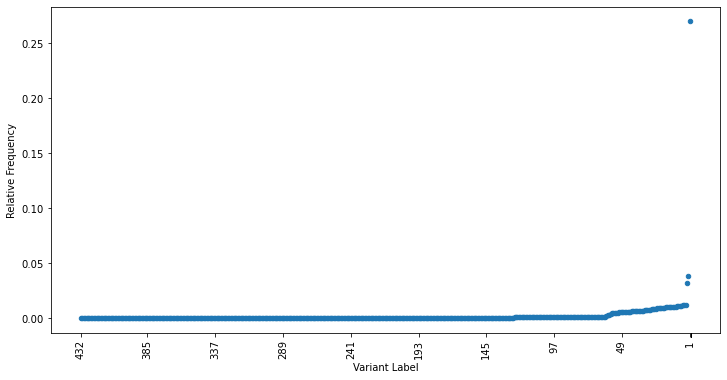

In [103]:
total_cases = len(log)
variants_count = case_statistics.get_variant_statistics(log)
variants_support = {
    "variant": [],
    "relative_freq": [],
    "label": []
}

for i in range(len(variants_count)):
    v = variants_count[i]
    variants_support["variant"].append(v["variant"])
    variants_support["relative_freq"].append(v["count"]/total_cases)
    variants_support["label"].append(i+1)

df = pd.DataFrame(variants_support)

# the relative frequency is already sorted in ascending order
# so we sort on the basis on label (in order to have nice xlabels)
df = df.sort_values("label", ascending=False)
df["label"] = df["label"].astype(str)

# if we show all label on x-axis then it gets cluttered
# as there are over 432 variants. As the variants are labelled 
# in descending order of their count, we will hide most of 
# the x-labels
labels_to_show = np.zeros(df.shape[0])
labels_to_show[np.linspace(0, max(df["label"].astype(int))-1, 10, dtype=int)] = 1
xticks = np.where(
    labels_to_show == 1,
    df["label"],
    ""
)

ax = df.plot.scatter(x="label",y="relative_freq", xticks=xticks, rot = 90, figsize=(12,6))
ax.set_xlabel("Variant Label")
_ = ax.set_ylabel("Relative Frequency")

# the label variants that have a xlabel are show here
display(df[labels_to_show==1])

**d)** While the variant distribution shows potential standard process executions in terms of the activity ordering, the distribution of the case durations shows the typical timeframe of cases.
Create a histogram plot over the case durations. For the sake of readability, make sure that the x-axis labels (in this case the case durations) have an easily readable format, that is, your x-axis labels should look like this:
<br></br>
<div>
<img src="./templates/caseDurationXAxis.png" width="500"/>
</div>

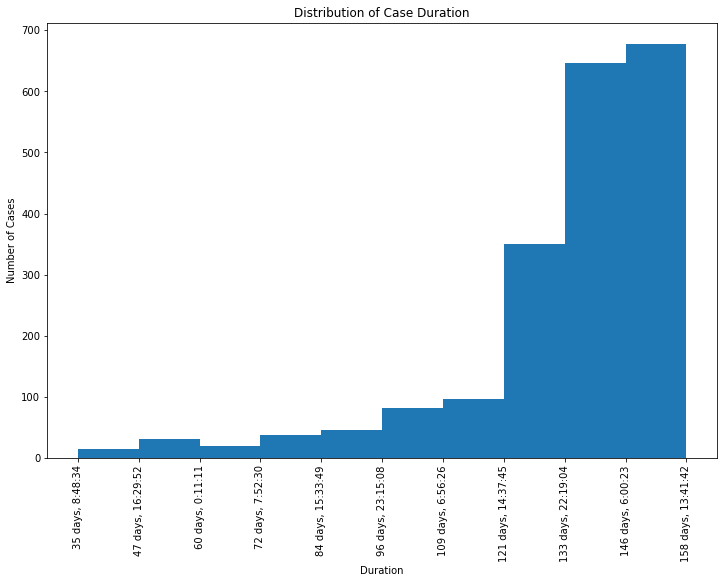

In [134]:
import datetime

all_case_durations = case_statistics.get_all_casedurations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

plt.figure(figsize=(12,8))
_, values_of_bins, _ = plt.hist(all_case_durations, bins=10)

xticks = [str(datetime.timedelta(seconds=s)).split('.')[0] for s in values_of_bins]
plt.xticks(values_of_bins, xticks, rotation=90)
plt.xlabel("Duration")
plt.ylabel("Number of Cases")
_ = plt.title("Distribution of Case Duration")


## Discovery and Conformance Checking
Next, you are going to discover process models for different perspectives on the process. Moreover, you will evaluate how well the process models can represent the behavior present in the log (i.e., the fitness of the models).

### Filtering

**e)** Before discovering models, create three addtional perspectives onto the process by creating three additional event log from the log loaded in a):

1. Log containing only 30% of the most frequent traces (**log_varaint03**)
2. Log containing only 50% of the most frequent traces (**log_varaint05**)
3. Log containing only students that take the exam, that is, cases that end with 'Exam' (**log_exam**)

In [23]:
log_variant03 = variants_filter.filter_log_variants_percentage(log, percentage=0.3)
log_variant05 = variants_filter.filter_log_variants_percentage(log, percentage=0.5)
log_exam = end_activities_filter.apply(log, ["Exam"])

### Inductive Miner and Replay Fitness

**f)** To get a better understanding of the processes in our four event logs (base log + three additional logs), create processes models using the **Inductive Miner**.
Concretely, for each of the 4 event logs, create two process models using the Inductive Miner with noise threshold **0 and 0.2**. Moreover, to access how well the model presents the logged behavior, apply conformance checking in terms of token-based replay to the model and the log from which it has been mined. Visualize each model as a process tree and as the corresponding Petri net.

In total, your cells should output 8 conformance scores, 8 process trees, and 8 Petri nets (for each log + noise threshold combination). Make sure that it is clear which model and conformance score belongs to log and parameter configuration.

For example, your output can look like this
#### Log: Base
##### IM threshold 0
>Fitness score

>Picture of the process tree

>Picture of the Petri net

##### IM threshold 0.2
>Fitness score

>Picture of the process tree

>Picture of the Petri net

**Describe your results**. How well do the models fit and, in particular, how do the models for
- log_variant05 and log (base log)
- log_variant05 and log_variant03
- log base and log_exam

differ in terms of the behavior that they allow?


In [60]:
# Petri nets for each log and two thresholds (0.0 and 0.2)

base_petri_net, base_initial_marking, base_final_marking = pm4py.discover_petri_net_inductive(log, noise_threshold=0.0)
variant03_petri_net, variant03_initial_marking, variant03_final_marking = pm4py.discover_petri_net_inductive(log_variant03, noise_threshold=0.0)
variant05_petri_net, variant05_initial_marking, variant05_final_marking = pm4py.discover_petri_net_inductive(log_variant05, noise_threshold=0.0)
exam_petri_net, exam_initial_marking, exam_final_marking = pm4py.discover_petri_net_inductive(log_exam, noise_threshold=0.0)

base_petri_net_02, base_initial_marking_02, base_final_marking_02 = pm4py.discover_petri_net_inductive(log, noise_threshold=0.2)
variant03_petri_net_02, variant03_initial_marking_02, variant03_final_marking_02 = pm4py.discover_petri_net_inductive(log_variant03, noise_threshold=0.2)
variant05_petri_net_02, variant05_initial_marking_02, variant05_final_marking_02 = pm4py.discover_petri_net_inductive(log_variant05, noise_threshold=0.2)
exam_petri_net_02, exam_initial_marking_02, exam_final_marking_02 = pm4py.discover_petri_net_inductive(log_exam, noise_threshold=0.2)

In [59]:
# Process trees for each log and two thresholds (0.0 and 0.2)

base_process_tree = pm4py.discover_process_tree_inductive(log, noise_threshold=0.0)
variant03_process_tree = pm4py.discover_process_tree_inductive(log_variant03, noise_threshold=0.0)
variant05_process_tree = pm4py.discover_process_tree_inductive(log_variant05, noise_threshold=0.0)
exam_process_tree = pm4py.discover_process_tree_inductive(log_exam, noise_threshold=0.0)

base_process_tree_02 = pm4py.discover_process_tree_inductive(log, noise_threshold=0.2)
variant03_process_tree_02 = pm4py.discover_process_tree_inductive(log_variant03, noise_threshold=0.2)
variant05_process_tree_02 = pm4py.discover_process_tree_inductive(log_variant05, noise_threshold=0.2)
exam_process_tree_02 = pm4py.discover_process_tree_inductive(log_exam, noise_threshold=0.2)

In [61]:
# fitness for two thresholds (0.0 and 0.2)

fitness_base = replay_fitness_evaluator.apply(log, base_petri_net, base_initial_marking, base_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_variant03 = replay_fitness_evaluator.apply(log_variant03, variant03_petri_net, variant03_initial_marking, variant03_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_variant05 = replay_fitness_evaluator.apply(log_variant05, variant05_petri_net, variant05_initial_marking, variant05_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_exam = replay_fitness_evaluator.apply(log_exam, exam_petri_net, exam_initial_marking , exam_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

fitness_base_02 = replay_fitness_evaluator.apply(log, base_petri_net_02, base_initial_marking_02, base_final_marking_02, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_variant03_02 = replay_fitness_evaluator.apply(log_variant03, variant03_petri_net_02, variant03_initial_marking_02, variant03_final_marking_02, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_variant05_02 = replay_fitness_evaluator.apply(log_variant05, variant05_petri_net_02, variant05_initial_marking_02, variant05_final_marking_02, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
fitness_exam_02 = replay_fitness_evaluator.apply(log_exam, exam_petri_net_02, exam_initial_marking_02, exam_final_marking_02, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)


replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

LOG: BASE
Threshold: 0.0 with fitness  1.0


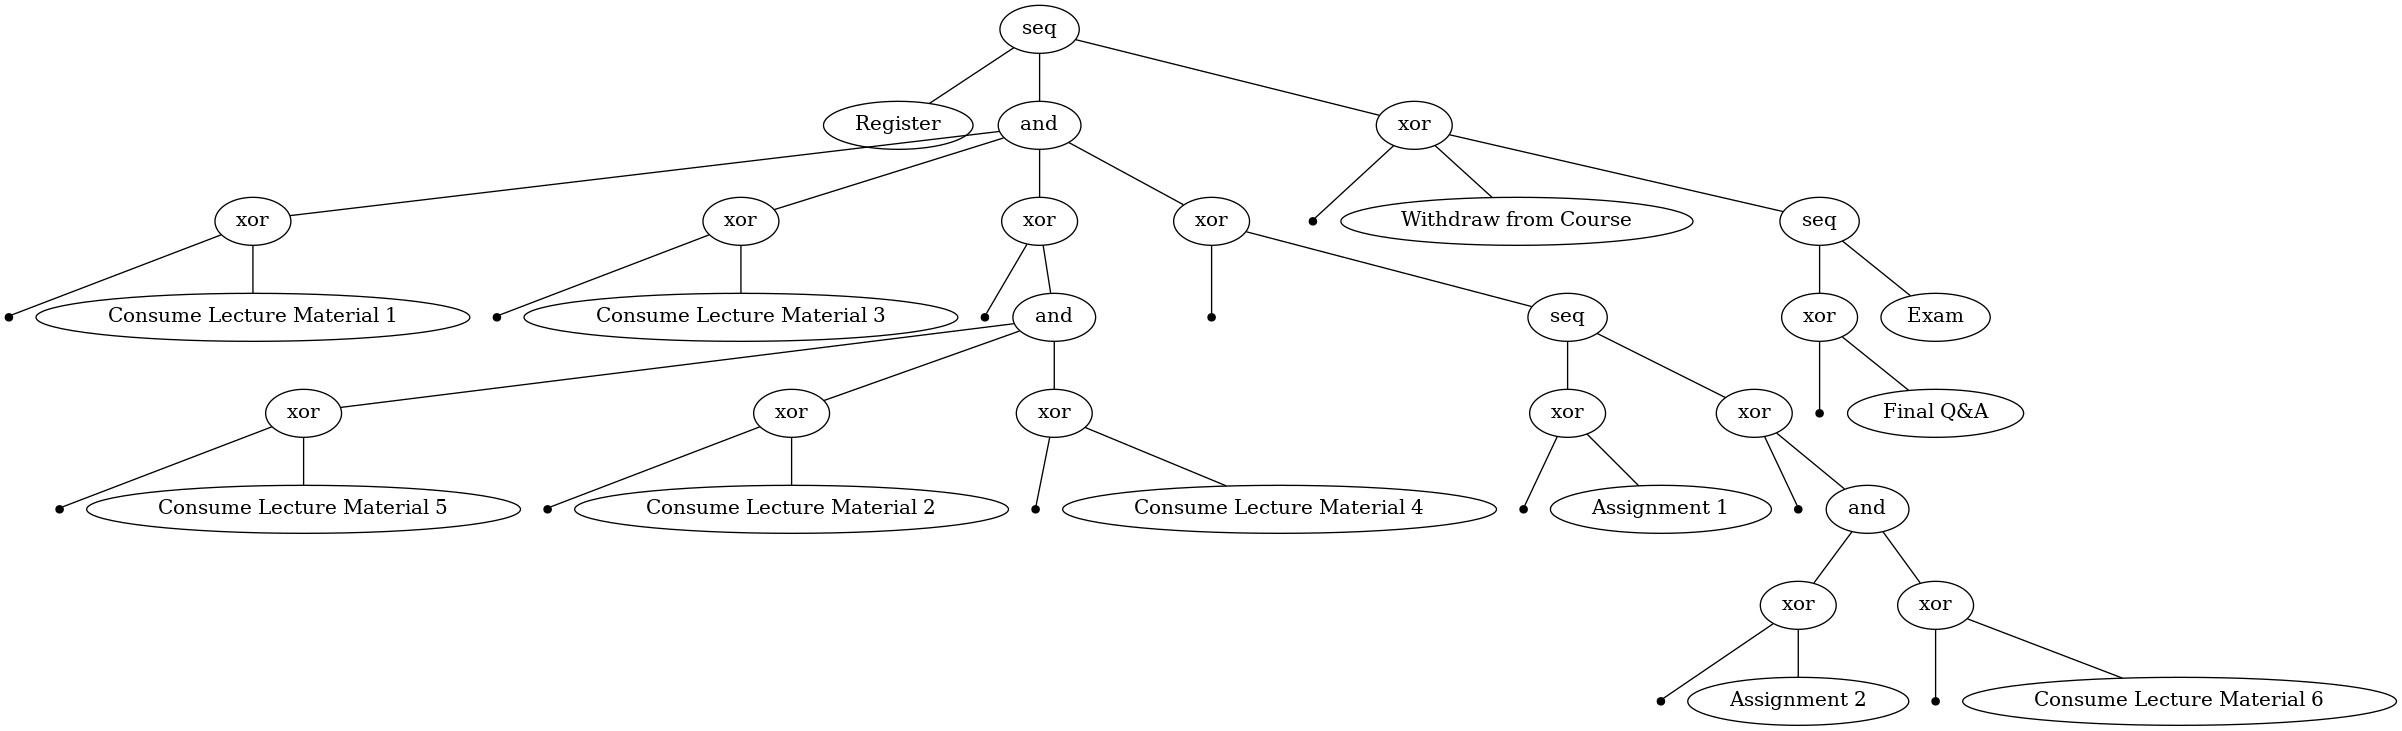

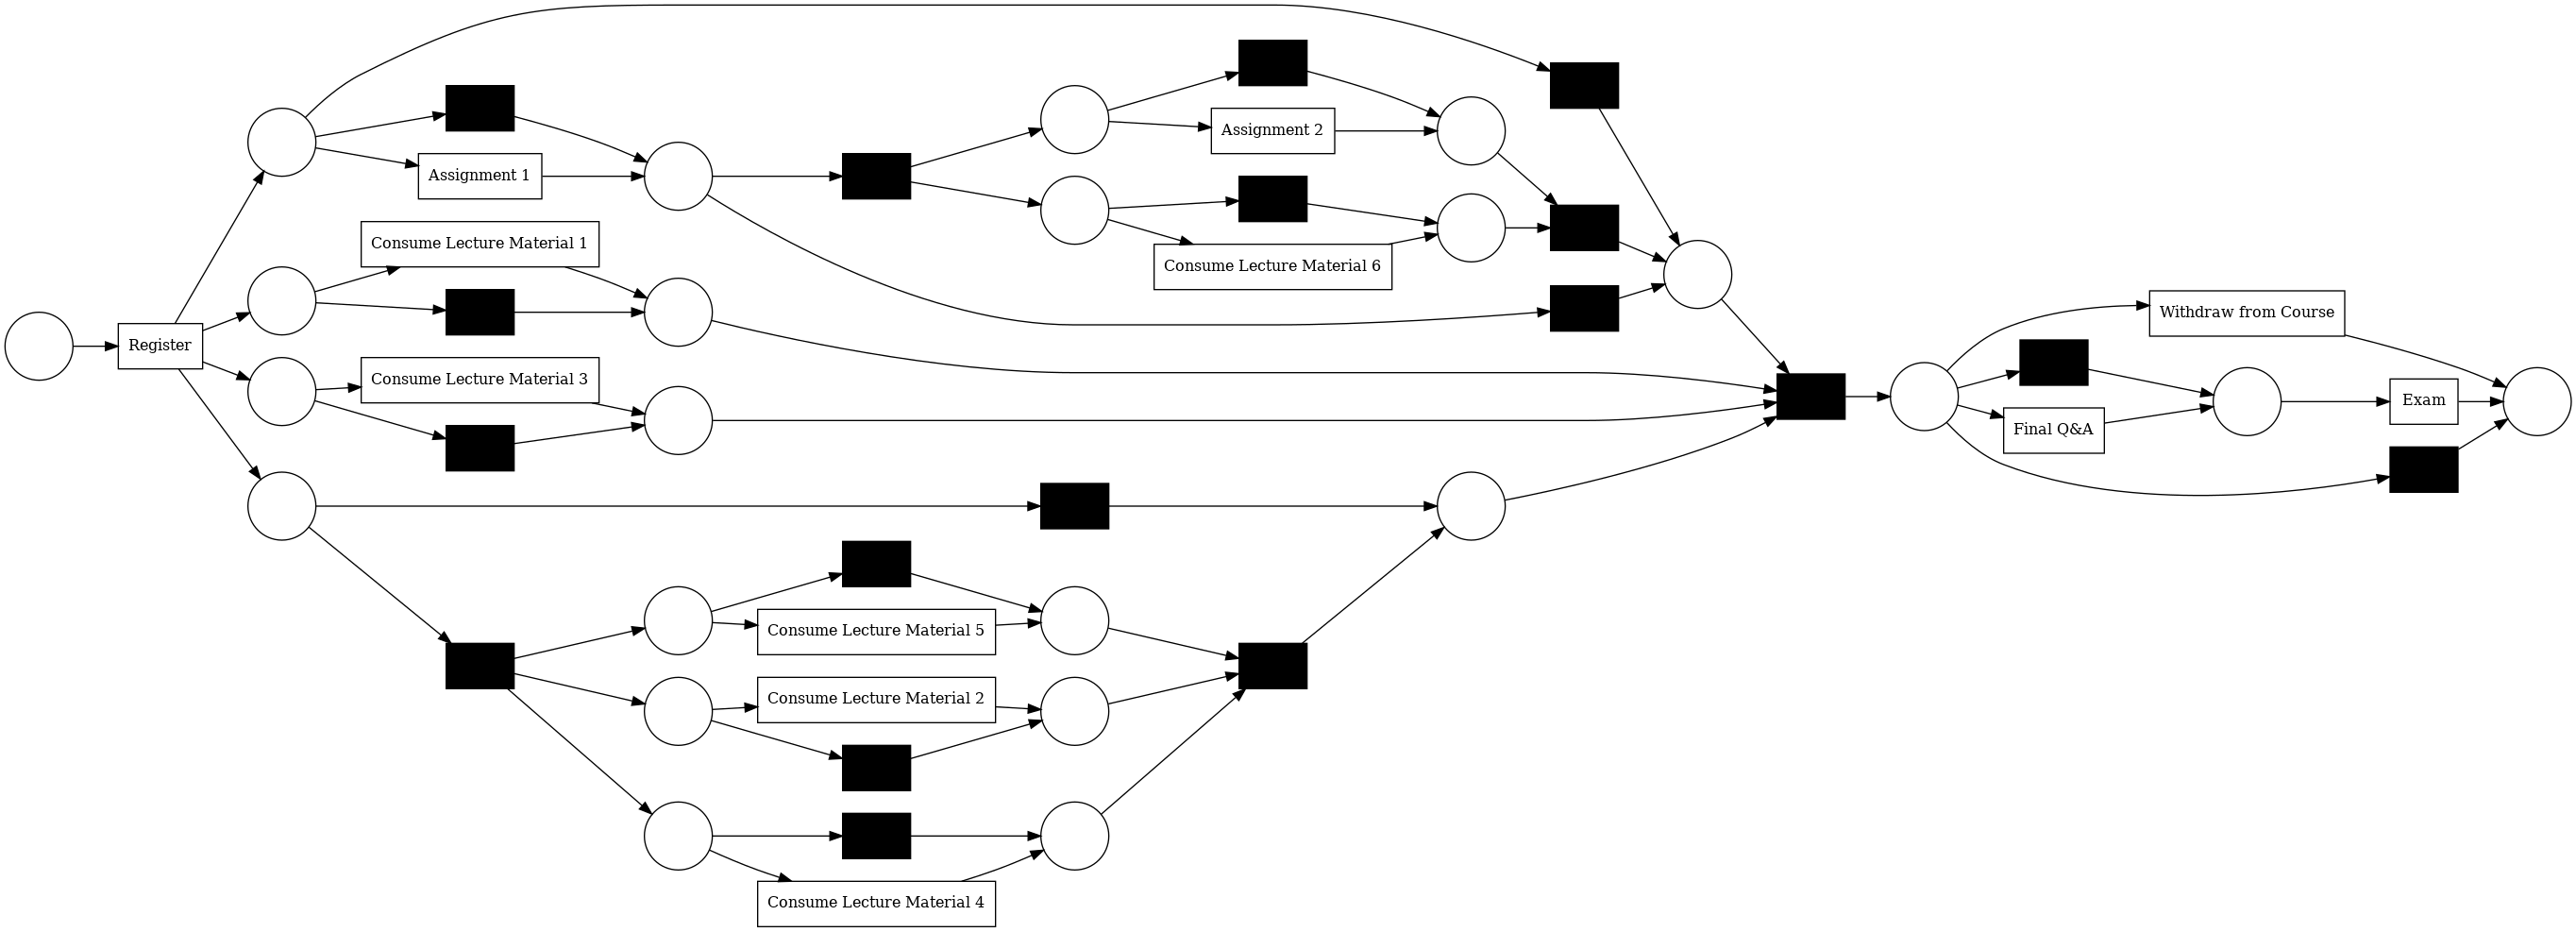

Threshold: 0.2 with fitness  0.905576373340711


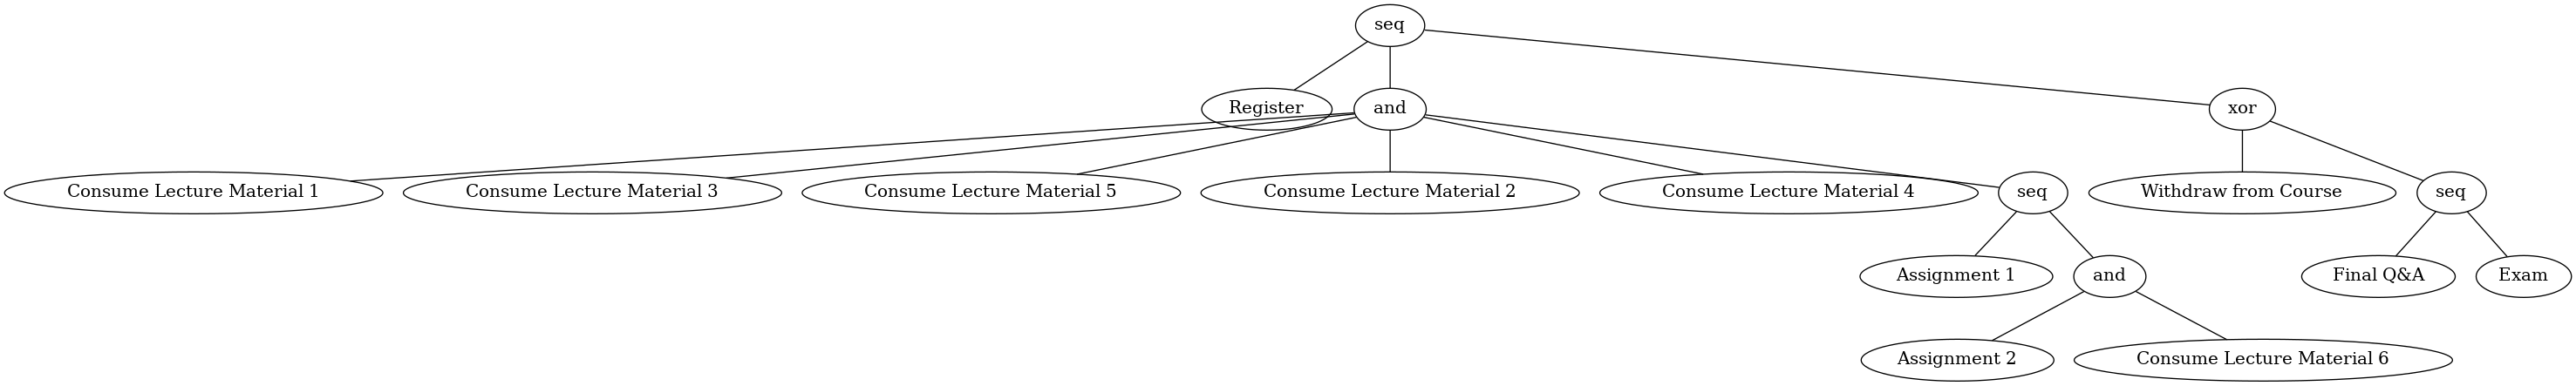

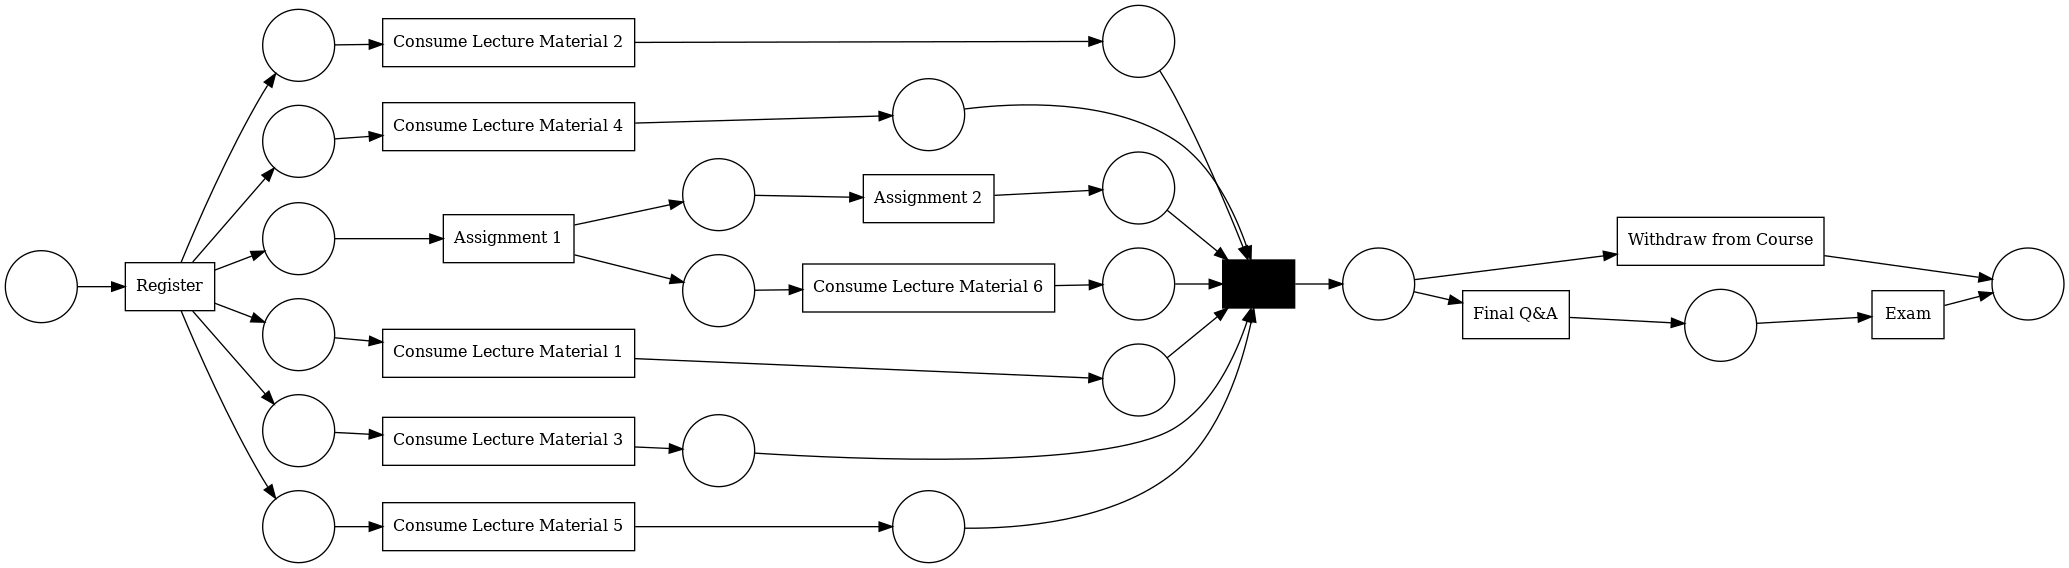

In [65]:
print("LOG: BASE")

print("Threshold: 0.0 with fitness ", fitness_base["average_trace_fitness"])

gviz = pt_visualizer.apply(base_process_tree)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(base_petri_net)
pt_visualizer.view(gviz)

print("Threshold: 0.2 with fitness ", fitness_base_02["average_trace_fitness"])

gviz = pt_visualizer.apply(base_process_tree_02)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(base_petri_net_02)
pt_visualizer.view(gviz)

LOG: VARIANT03
Threshold: 0.0 with fitness  1.0


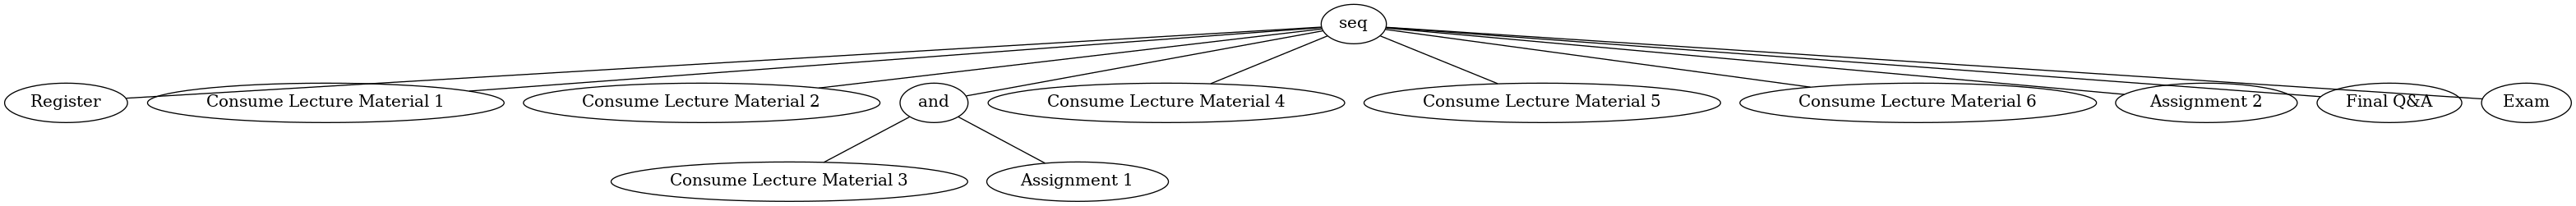

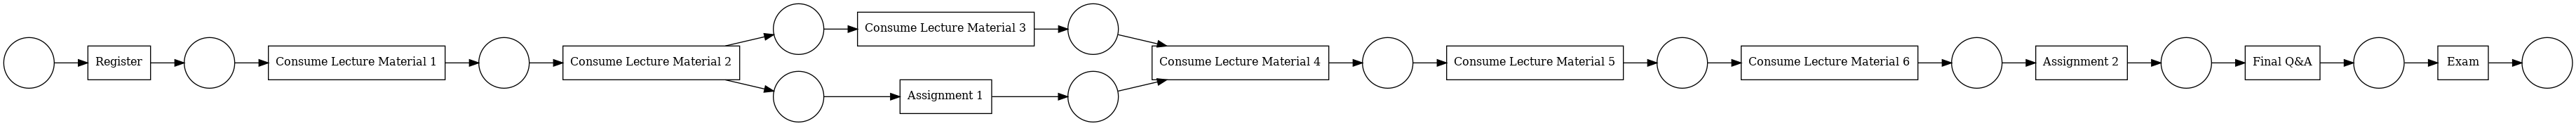

Threshold: 0.2 with fitness  1.0


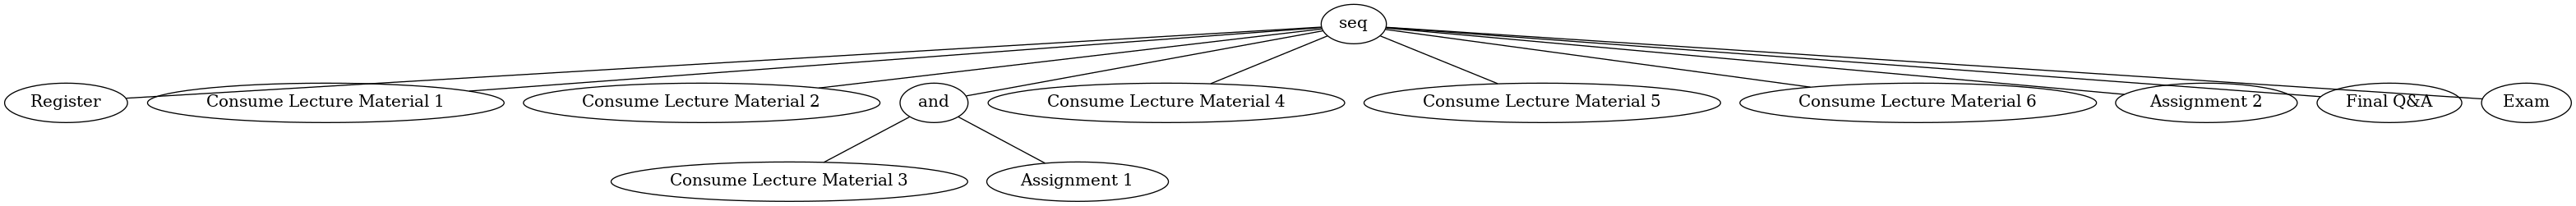

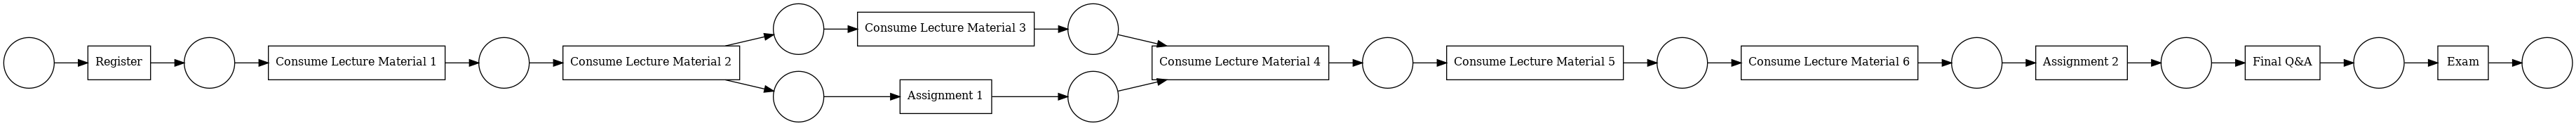

In [66]:
print("LOG: VARIANT03")

print("Threshold: 0.0 with fitness ", fitness_variant03["average_trace_fitness"])

gviz = pt_visualizer.apply(variant03_process_tree)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(variant03_petri_net)
pt_visualizer.view(gviz)

print("Threshold: 0.2 with fitness ", fitness_variant03_02["average_trace_fitness"])

gviz = pt_visualizer.apply(variant03_process_tree_02)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(variant03_petri_net_02)
pt_visualizer.view(gviz)

LOG: VARIANT05
Threshold: 0.0 with fitness  1.0


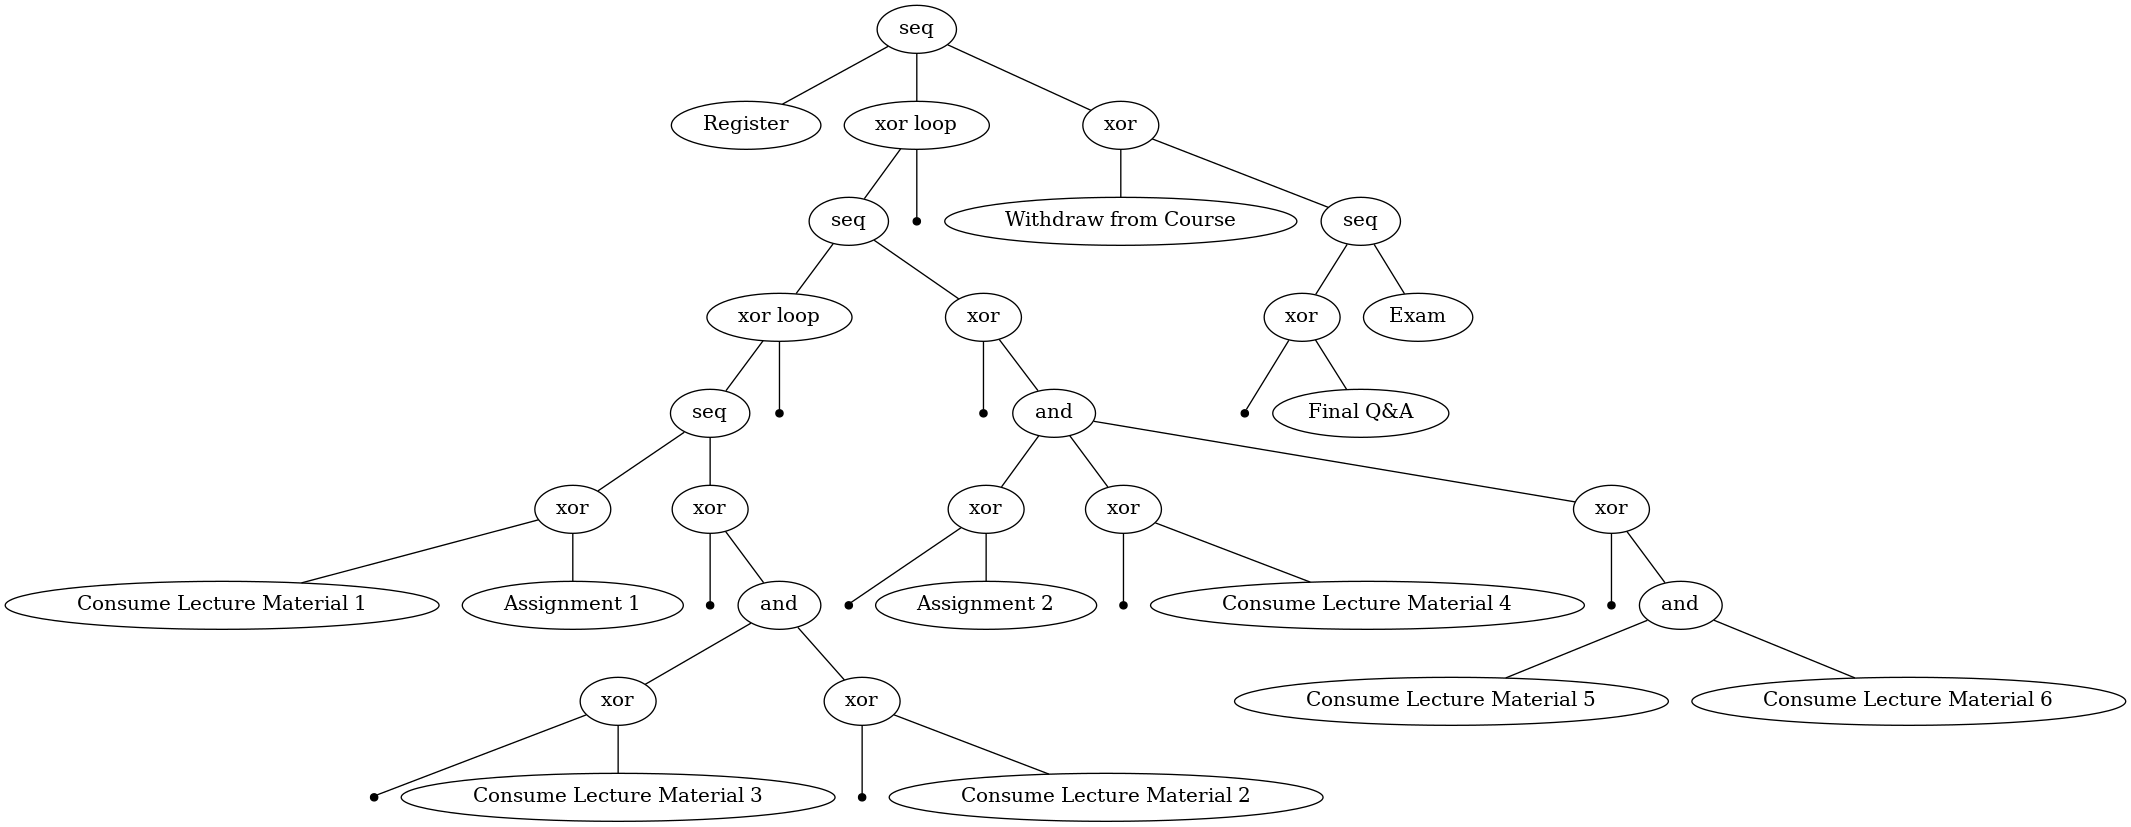

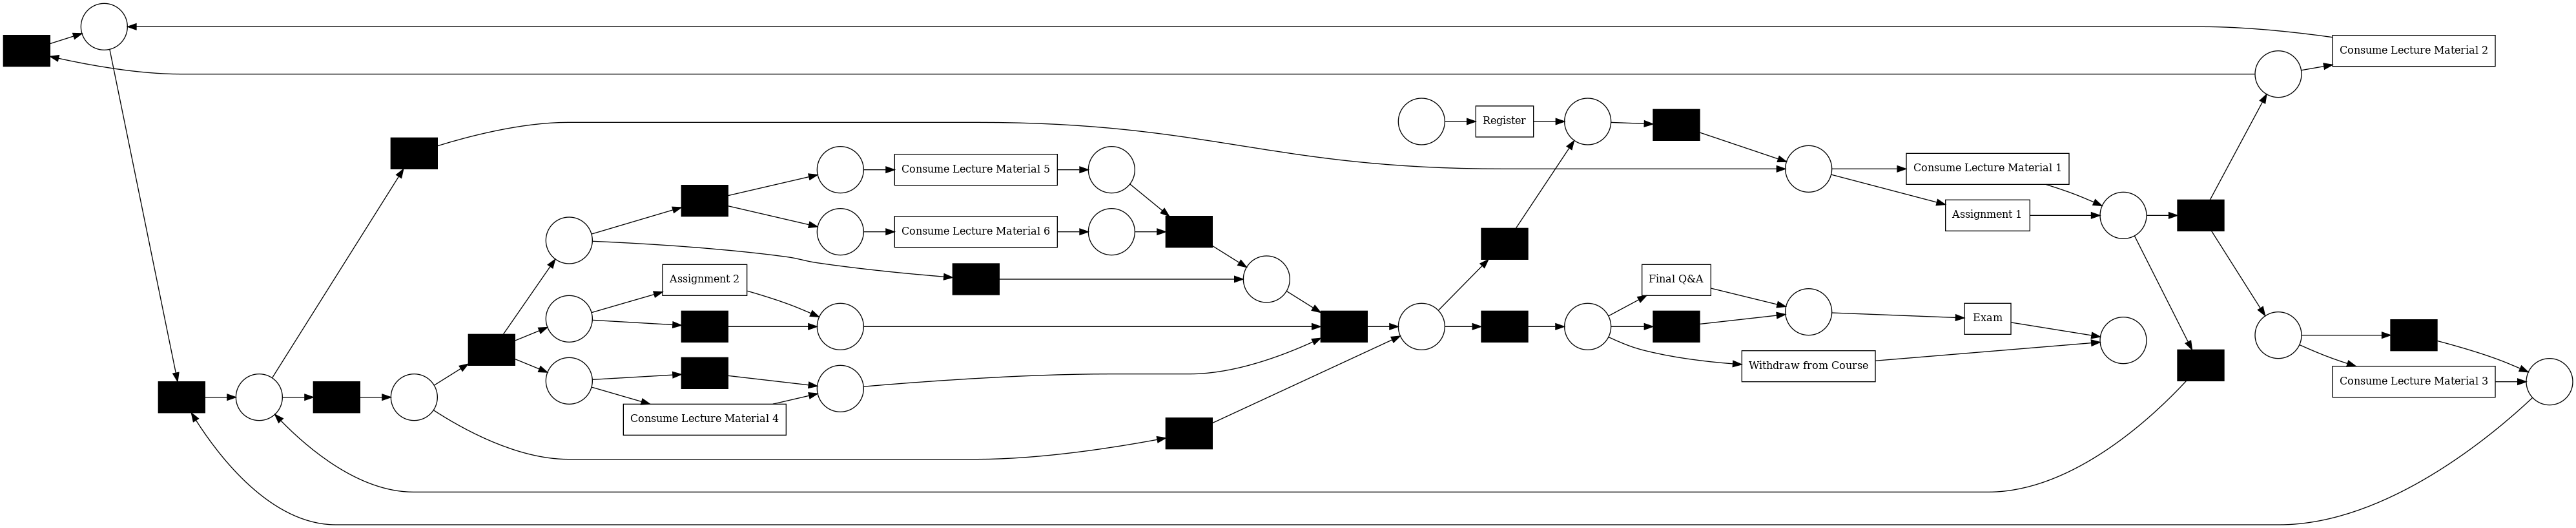

Threshold: 0.2 with fitness  0.9803935624172175


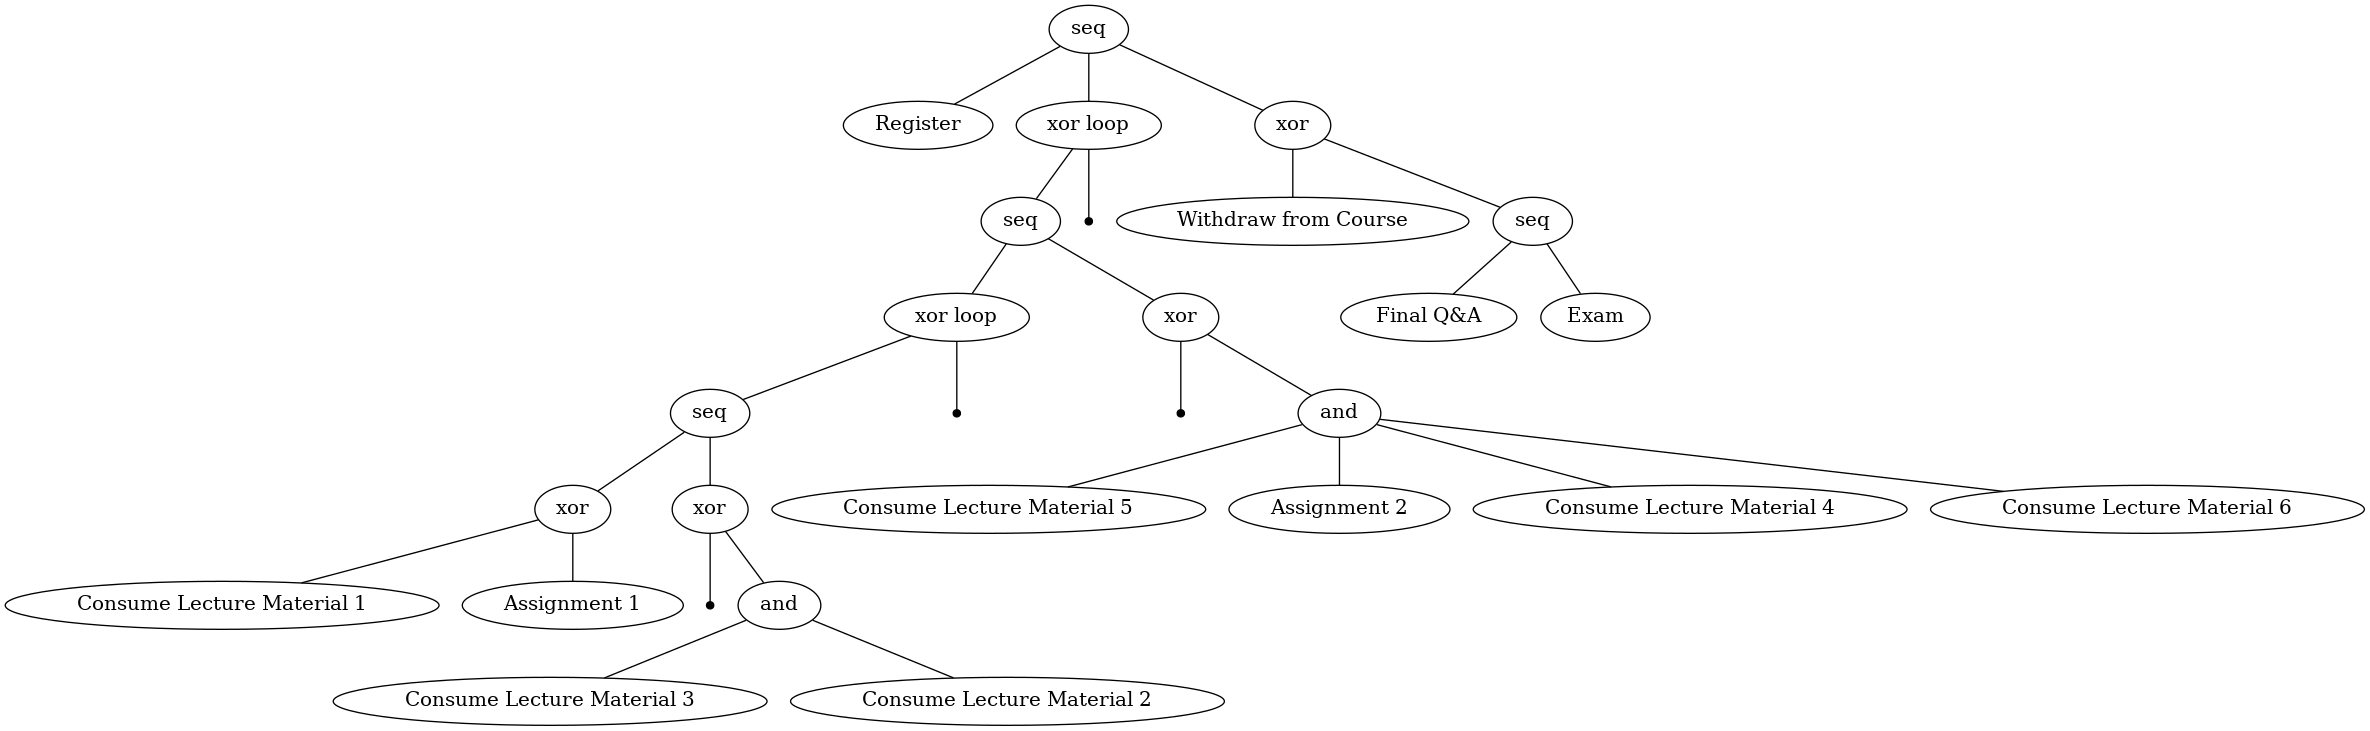

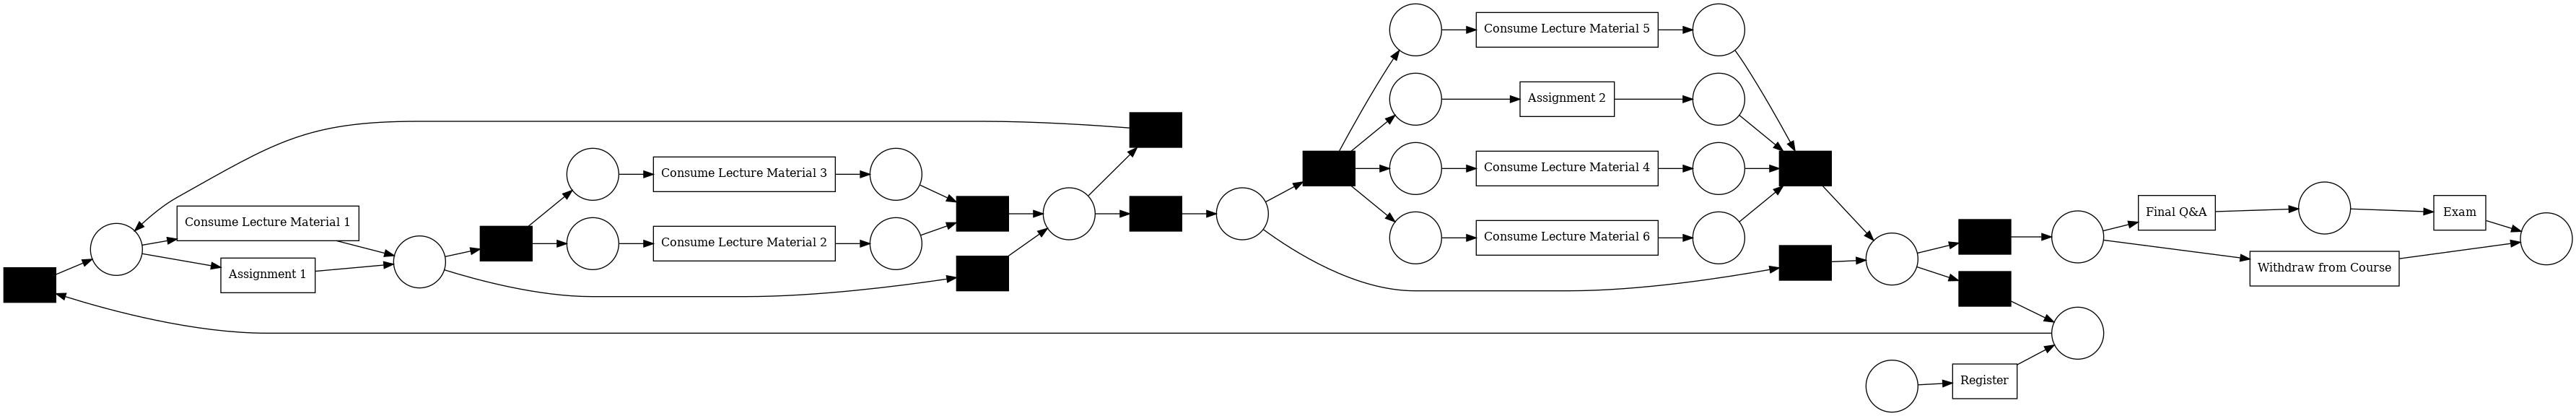

In [67]:
print("LOG: VARIANT05")

print("Threshold: 0.0 with fitness ", fitness_variant05["average_trace_fitness"])

gviz = pt_visualizer.apply(variant05_process_tree)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(variant05_petri_net)
pt_visualizer.view(gviz)

print("Threshold: 0.2 with fitness ", fitness_variant05_02["average_trace_fitness"])

gviz = pt_visualizer.apply(variant05_process_tree_02)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(variant05_petri_net_02)
pt_visualizer.view(gviz)

LOG: EXAM
Threshold: 0.0 with fitness  1.0


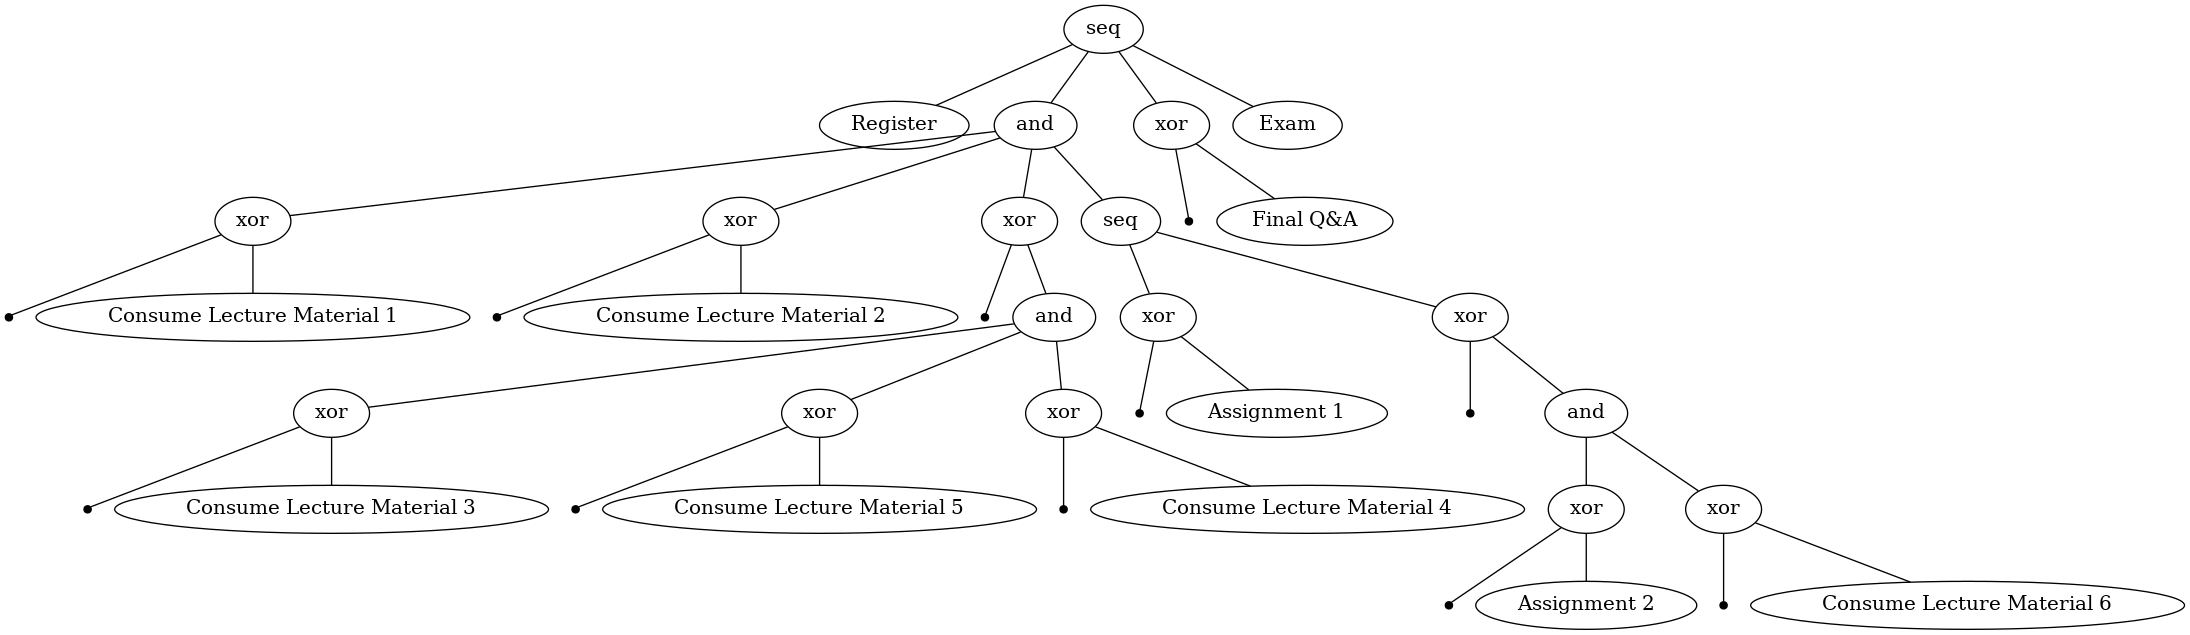

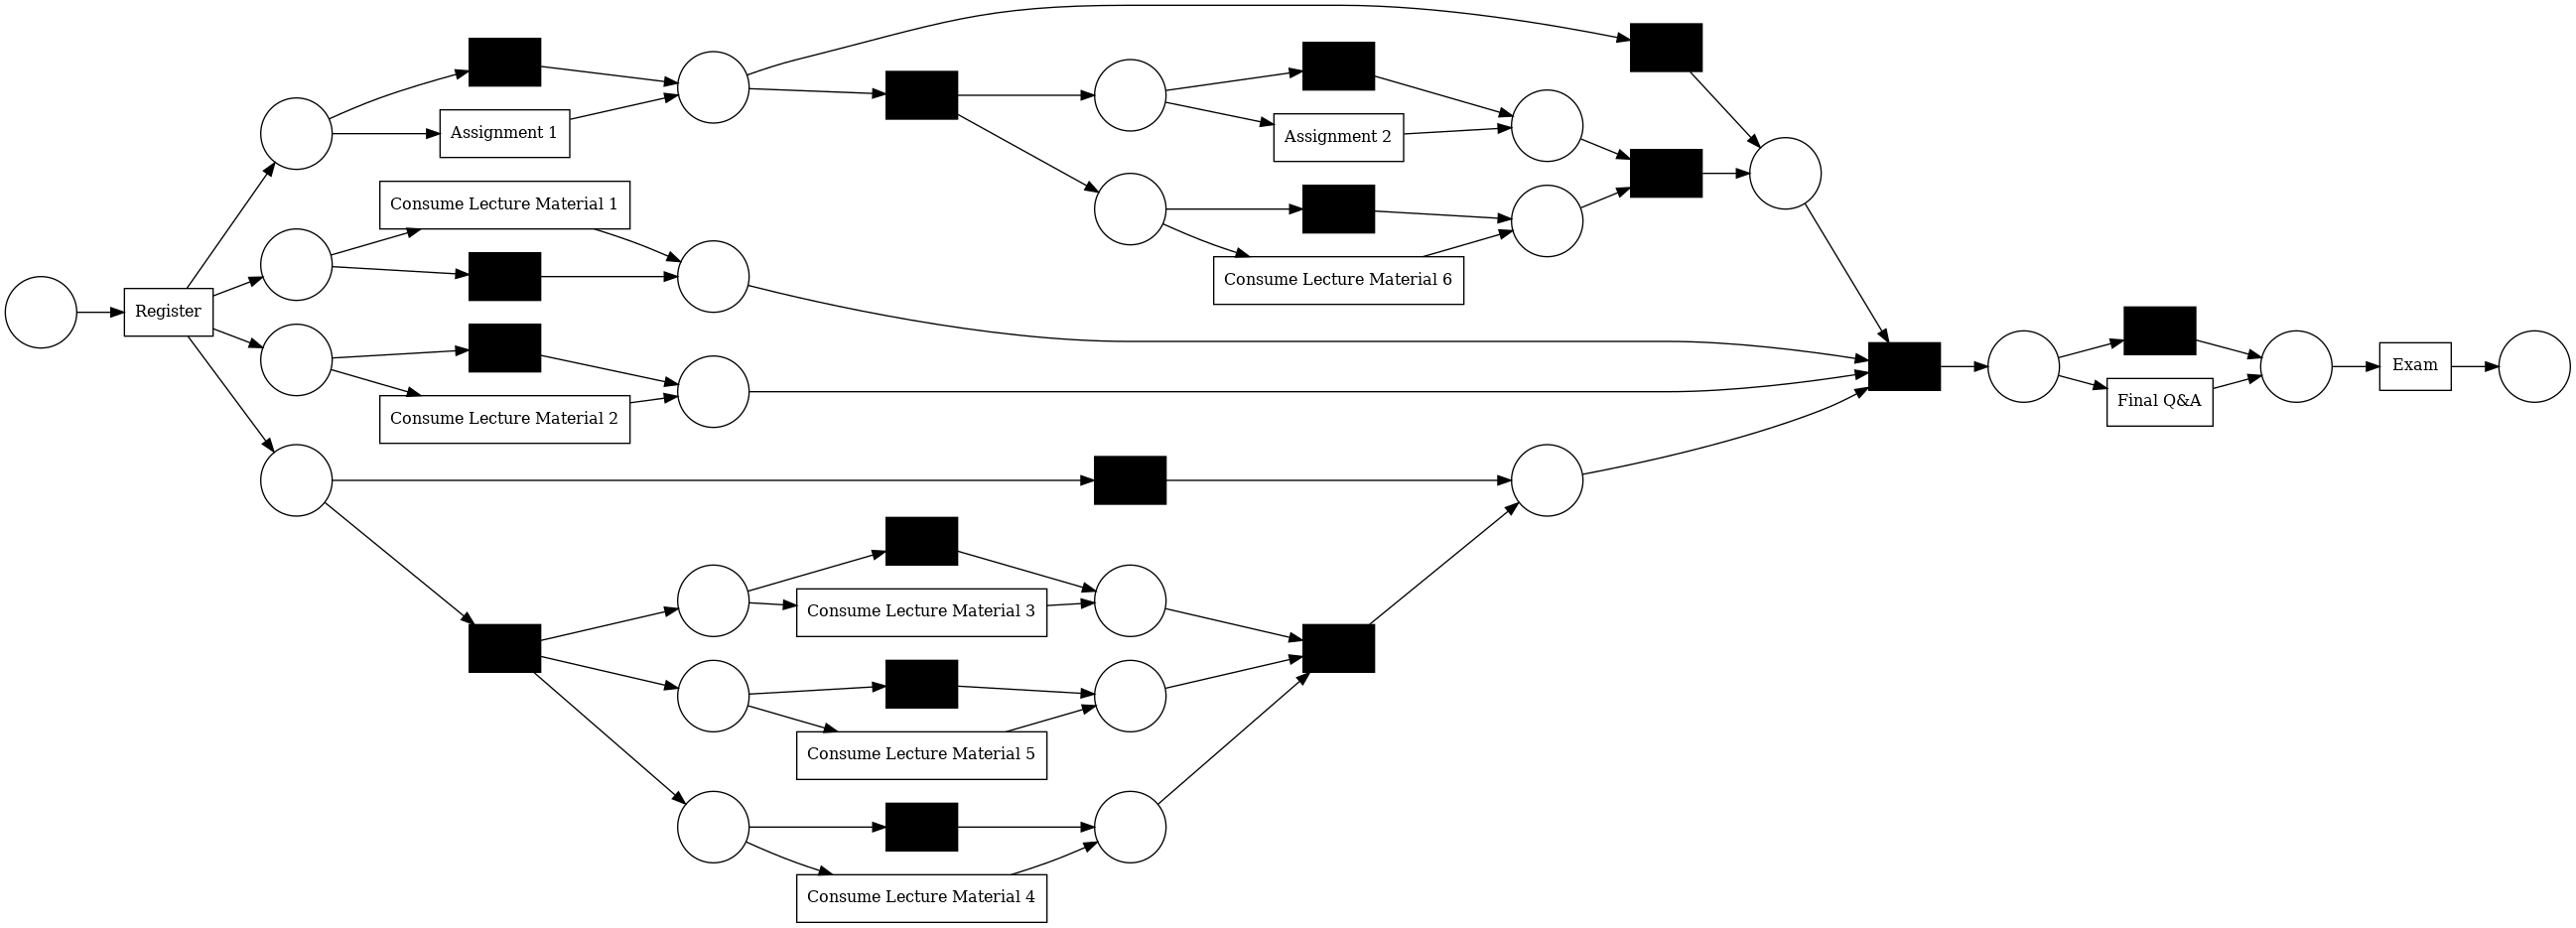

Threshold: 0.2 with fitness  0.9420329422692011


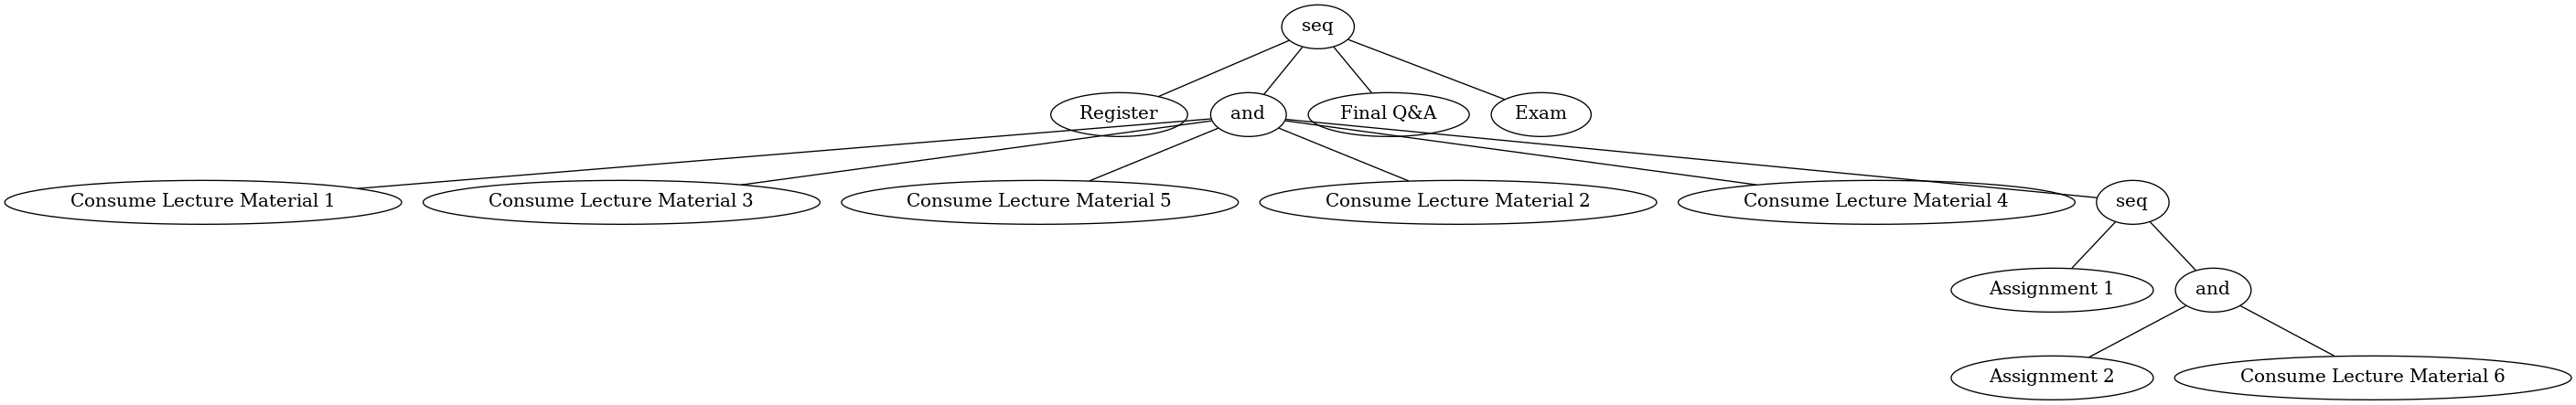

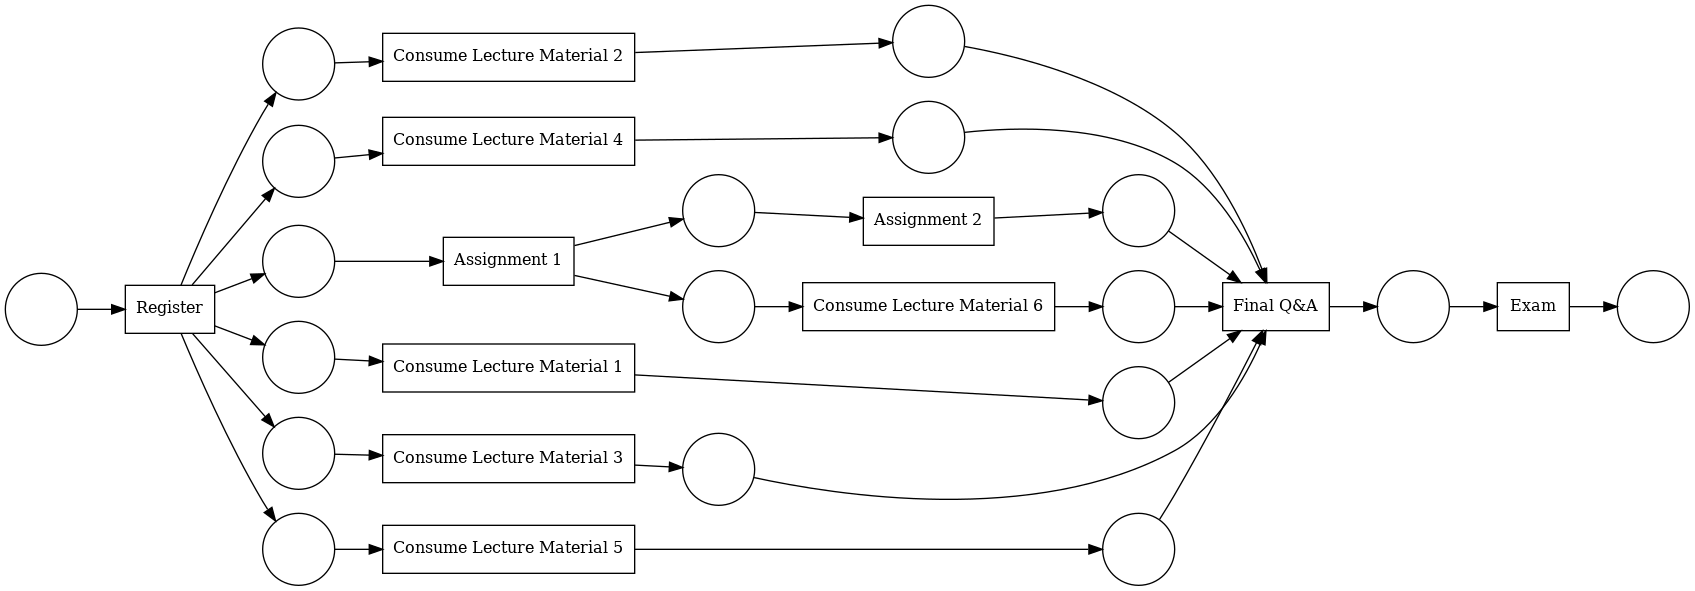

In [68]:
print("LOG: EXAM")

print("Threshold: 0.0 with fitness ", fitness_exam["average_trace_fitness"])

gviz = pt_visualizer.apply(exam_process_tree)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(exam_petri_net)
pt_visualizer.view(gviz)

print("Threshold: 0.2 with fitness ", fitness_exam_02["average_trace_fitness"])

gviz = pt_visualizer.apply(exam_process_tree_02)
pt_visualizer.view(gviz)

gviz = pn_visualizer.apply(exam_petri_net_02)
pt_visualizer.view(gviz)

*Your markdown for your discussion.*

In general, all the models have good fitness despite the fact the some of them have a lot of skip activities.

- log_variant05 (threshold 0.2) allows the activities to be redone (redo loop) and allows to do final Q&A and exam activity just after Lecture 1 and Assignment 1 (ie all the other lectures and assignment 2 can be skipped). log_base (threshold 0.2) does not allow any activity to be skipped and does not have redo loops. Here final Q&A and exam can only be given after all the lectures and assignnments are done.
- log_variant03 (threshold 0.2) does not allow activites to be done in parallel except lecture 3 and assignment 1. The traces have to the activities in a particular order and nothing can be skipped. Also this model does allow to withdraw from course. Whereas log_variant05 (threshold 0.2) is completely different. It allows lectures and assignment to be done in parallel, allows activities to be redone, and allows to withdraw from course.
- The only difference between log_base (threshold 0.2) and log_exam (threshold 0.2) is that the log_exam does not allow to withdraw from course.

### Paths of Excellence

**g)** As lectures are in a constant urge to improve their courses in a way that participants learn as much as possible ;), you are facing the research question to identify *paths of excellence*.
In particular, you should identify how the studying behavior differs between excellent students (**final exam score greater than or equal to 85**) and non-excellent students (**final exam score less than 85**).
Try to answer this research questions using techniques from the preceding Process Mining questions. 

*Hint: There is no single unique solution (e.g., in terms of parameter choice); therefore, it suffices if your "design choices" are reasonble.* \
*Hint: The final exam score is point score that is associated with the "Exam" event.*


In [34]:
log_excellent = attributes_filter.apply_numeric(log_exam, 85, 100,
    parameters={
        attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
        attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam"
    }
)

log_not_excellent = attributes_filter.apply_numeric(log_exam, 0, 84.9,
    parameters={
        attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
        attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam"
    }
)

replaying log with TBR, completed variants ::   0%|          | 0/10 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/395 [00:00<?, ?it/s]

Petri Net of Excellent Students with average trace fitness 0.9948918269230764


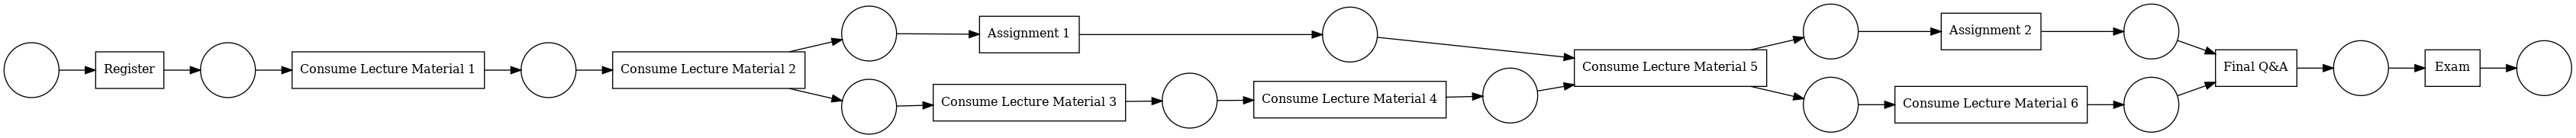


Petri Net of Non-Excellent Students with average trace fitness 0.9354532779427331


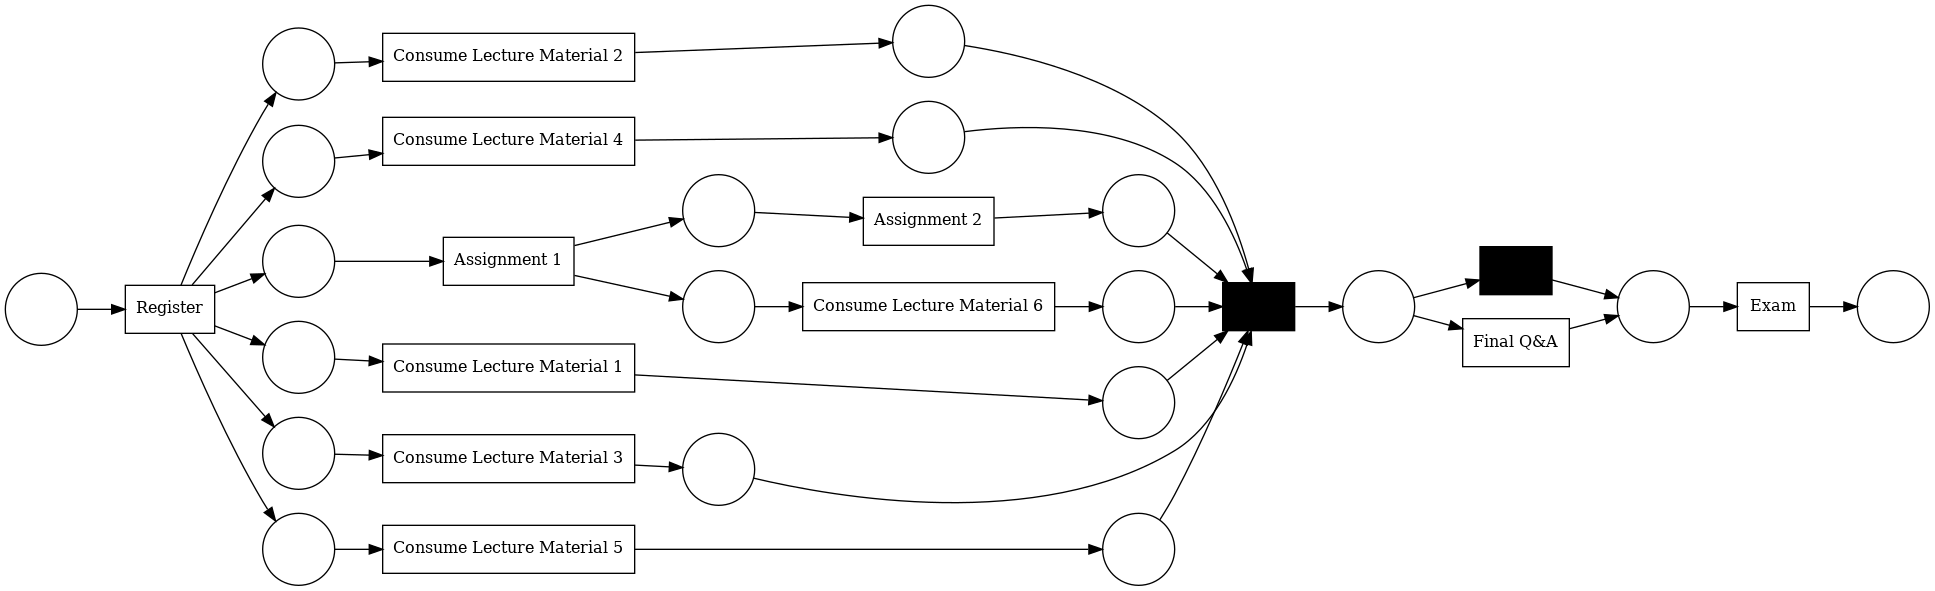

In [49]:
excellent_net, excellent_im, excellent_fm = pm4py.discover_petri_net_inductive(log_excellent, noise_threshold=0.2)

excellent_fitness = replay_fitness_evaluator.apply(log_excellent, excellent_net, excellent_im, excellent_fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

not_excellent_net, not_excellent_im, not_excellent_fm = pm4py.discover_petri_net_inductive(log_not_excellent, noise_threshold=0.2)

not_excellent_fitness = replay_fitness_evaluator.apply(log_not_excellent, not_excellent_net, not_excellent_im, not_excellent_fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

print("Petri Net of Excellent Students with average trace fitness",excellent_fitness["average_trace_fitness"])
gviz = pn_visualizer.apply(excellent_net)
pn_visualizer.view(gviz)
print()

print("Petri Net of Non-Excellent Students with average trace fitness",not_excellent_fitness["average_trace_fitness"])
gviz = pn_visualizer.apply(not_excellent_net)
pn_visualizer.view(gviz)

*Your markdown for your discussion.*

From the above Petri Nets, it is clear that excellent student follow a well defined pattern to study. Particularly the following differences are very clear:
- Excellent students study the lectures in the specified manner whereas not-excellent students study the lectures concurrently (or we can say every non-excellent student starts with a different lecture and ends with a different lecture thus the concurrent pattern of consuming lectures is observed)
- Another difference is that excellent students do assignment after the required lectures have been watched whereas non-excellent students just start directly with the assignment and watch lectures side by side
- Another difference is that excellent students (almost 99%) do not tend to skip the final Q&A whereas non-excellent do

## Performance and Frequency Decoration

**h)** While the discovery of a process model is the most prototypical step in a process mining analysis, its enrichment by frequency and performance statistics is a very common step too. To this end, enrich the Petri net that you discovered for log_exam using Inductive Miner with noise threshold 0.2 by frequency and performance information. Plot two Petri nets decorated with frequency and performance information, respectively.

Describe your results. Can you observe any problems (in particular with respect to the initial process description)?

replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

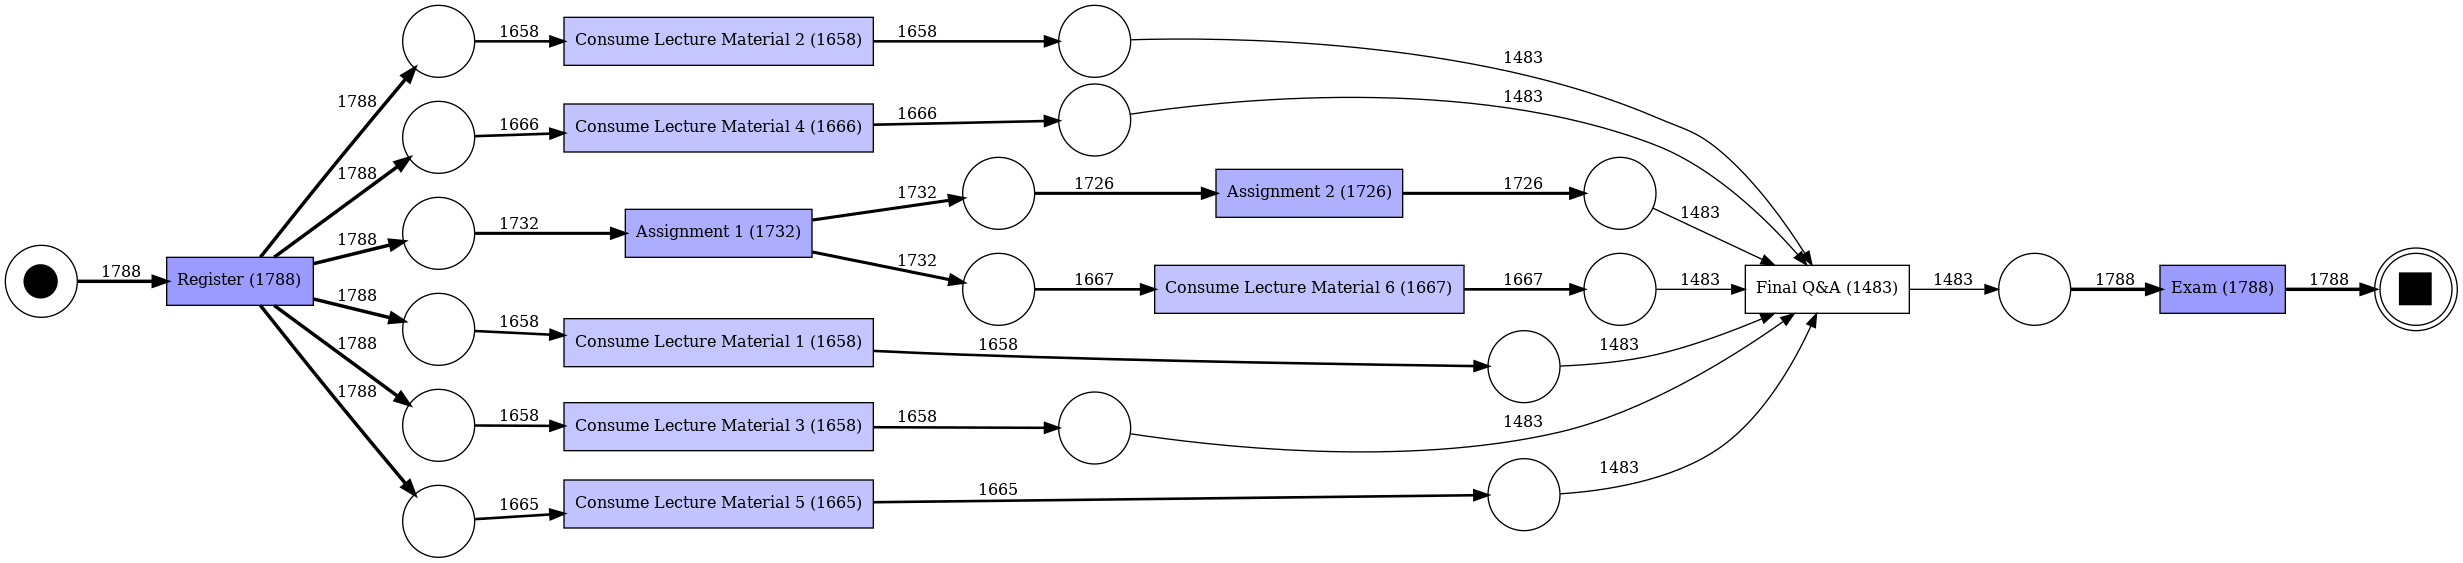

In [70]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(exam_petri_net_02, exam_initial_marking_02, exam_final_marking_02, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_exam)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

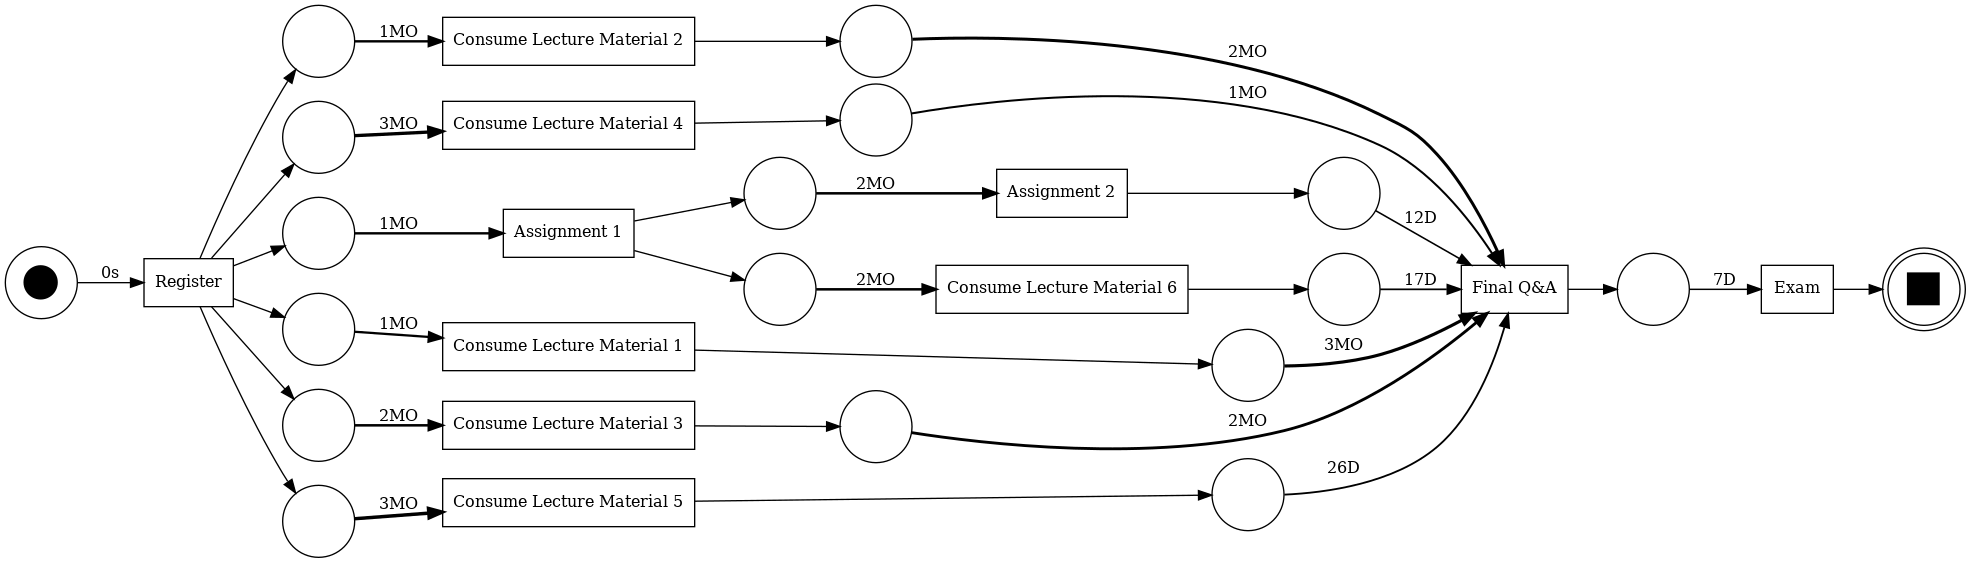

In [71]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(exam_petri_net_02, exam_initial_marking_02, exam_final_marking_02, parameters=parameters, variant=pn_visualizer.Variants.PERFORMANCE, log=log_exam)
pn_visualizer.view(gviz)

*Your markdown for your discussion.*

A problem that observed that decrease the quality of what student learn through the whole course is that students tend to focus on assignments first and skip lectures. As it can be seen from frequency annotation about 70 more students do assignments than they consume lecture. It can also be inferred that about 50 students skip the assignments as well about 300 students do not attend the final Q&A. From the performance annotation, we can see that students tend to start assignments first and side-by-side consume lectures. 

Thus, it can be concluded that students are more focussed on assignments and do not understand that the lectures are equivally important to do assignments and that they should be consumed before beginning assignments.

## Process Mining Meets Advanced Visualization

### Studying Activity Heatmap

**a)** In this task, we are going to use advanced visualization techniques to create an overview over the course acitivities over time (**log.csv**).
In particular, you shall create a heatmap that shows how often activities occur in a particular week. 
Your heatmap should adhere to the following specification:
- y-axis: Shows the activity labels
- x-axis: Time in terms of course weeks. See the following example snippet:
<div>
<img src="./templates/PMAV_HeatmapXAxisSnippet.png" width="100"/>
</div>
- data: The bucket counts should be derived from **log.csv**

Using this configuration, the bucket 2021-11-24 till 2021-12-01 with y-axis label "Exam" and value v would be read as:
In the week between 2021-11-24 and 2021-12-01 v exams took place.

Describe your result. Which patterns do you observe?

In [114]:
# the log.csv file was loaded in "df" in (a), so reusing that
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_heatmap = pd.DataFrame()

for (activity, df_activity) in df.groupby('Activity'):
    series = pd.Series(
        np.ones(df_activity.shape[0]),
        index=df_activity['Timestamp'],
        name = activity
    ).resample("W", kind='period').count()
    df_heatmap = df_heatmap.join(series, how='outer')

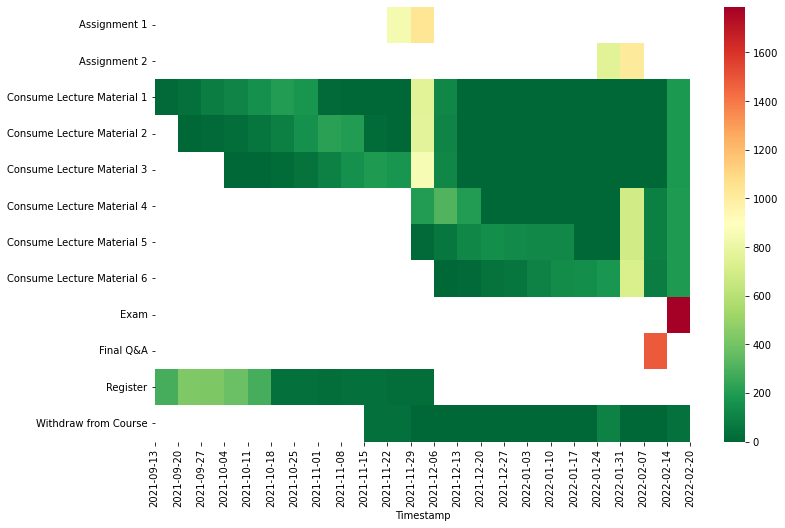

In [144]:
fig = plt.figure(figsize=(12,8))
ax = sns.heatmap(df_heatmap.T, cmap='RdYlGn_r', figure=fig)

# convert 'PeriodIndex' to start and end date on x-axis
xticks = ax.get_xticklabels()
new_xlabels = []
new_xlabels_pos = []

for xtick in xticks:
    text = xtick.get_text()
    (x, y) = xtick.get_position()
    (new_text, last_label) = text.split('/')
    new_xlabels.append(new_text)
    new_xlabels_pos.append(x-0.5)

    last_pos = x + 0.5

new_xlabels.append(last_label)
new_xlabels_pos.append(last_pos)
_ = ax.set_xticks(new_xlabels_pos, labels = new_xlabels)

*Your markdown for your discussion.*

From the assignment 1 and 2 pattern, it could be inferred that students start assignments two weeks before the deadline. The lecture material is watched in order and continued watching till the end which could mean that there are some students who start watching lectures in the end of the semester and during assignment deadline week, not many students watch lectures. 

We can also see that registrations increase near the registration deadline and students start withdrawing from the course before the first assignment itself.

**b)** Can you relate the patterns that you observe in the heatmap to the process models that you discovered in question **Q5 - f)**?

*Hint: In contrast to the other questions, this question is deliberately less explicit. You may approach it having the following question in mind: \
Is there a pattern in the heatmap that explains why a certain process model shows a certain behavior/control flow?*

*Your markdown for your discussion.*

In the heatmap we can see that student watch lecture 1 even at the end of semester. There can be students who watch lecture 1 at the end of the semester for the first time or they might be re-watching it. This behaviour explains the redo-loops in the petri net of variant_05 (with threshold). We can also see that the withdraw from courses start happening early in the semester which explains the skip connections to withdraw activity (after lecture 1 and assignment 1) in petri net of variant_05 (with threshold 0.2).

On the other hand, we see in heatmap that some students do follow the order of watching lectures (ie they don't watch lecture 2 before lecture 1) which explains the no-redo loop and perfect order of activities in petri net for variant_03 (with threshold 0.2)

### Process Flow

**c)** Assume that another process analyst also had access to the event log. 
Given the data, he created the following novel entities:
- 'Block 1 Complete': The participant downloaded the entire material of the first lecture block (materials 1, 2, and 3). (Not considering when he downloaded it)
- 'Block 1 Incomplete': The participant did not download the entire material of the first lecture block
- 'Block 2 Complete': See 'Block 1 Complete'
- 'Block 2 Incomplete': See 'Block 1 Incomplete'
- 'Ass 1 Excellent': Participant scored at least 85 points in the first part of the assignment
- 'Ass 1 Not Excellent': Participant scored less than 85 points in the part of the assignment
- 'Ass 2 Not Excellent', 'Ass 2 Excellent', 'Exam Not Excellent', 'Exam Excellent': Similar to 'Ass 1 Excellent' and 'Ass 1 Not Excellent'
- 'Withdraw': Participant dropped the course

Based on the entities he derived a set of flow, for example, the flow between 'Block 1 Complete' and 'Ass 1 Excellent' describes how often a partipant who consumed the first lecture block scored excellent in the first part of the assignment.

The next cell loads the entities and flows for you. The flows are stored as a dictionary following the pattern:

    (source, target): flow_value
    
where source and target are indices into the entities list.

Create a **Sankey diagram** that visulizes these flows. Please use `plotly.graph_object.Sankey` to create the diagram.

Briefly **describe** your results.
Moreover, **discuss** this visualization considering your knowlege from the Process Mining task.

*Hint: Having a look at the Sankey diagram will make the analyst's idea behind the entities much clearer.*

In [145]:
with open('./dataset/sankeyEntities.pkl', 'rb') as f:
    entities = pickle.load(f)
with open('./dataset/sankeyFlows.pkl', 'rb') as f:
    flows = pickle.load(f)

In [169]:
node = dict(
    pad = 50,
    thickness = 10,
    line = dict(color = "red", width = 1),
    label = entities,
    color = "black"
)

link = dict(
      source = [flow[0] for flow in flows],
      target = [flow[1] for flow in flows],
      value = [flows[flow] for flow in flows]
)

sankey_data = go.Sankey(node = node, link = link)
fig = go.Figure(data = [sankey_data])
fig.update_layout(font_size=12)
fig.show()

*Your markdown for your discussion.*

Most of the students complete block 1 and 2 and those who do not complete them definitely end up getting not excellent scores in assignment 1 and 2 respectively (this does not mean that students who complete them have excellent score in assignments). About 1/3rd students who complete block 1 and 2 end up getting excellent score in assignment 1 and 2 respectively. Out of 493 students who end up scoring excellent in exam, 370 have excellent scores in assignment 2.

134 students out of 200 who withdraw from course have not excellent score in either assignment 1 or assignment 2

The process models that we generated above showed skip connections to assignments. This can be seen in the Sankey diagram as well. There are students who did not complete block 1 and attempted the assigment 1 (similarly for assignment 2).

Also we can see that certain students dropped after block 1 or assignment 1 which explains the skip connections in process models.

# Question 6 - Big Data (15 points) 

### Problem Description
You are working at a finance company that makes loans to individuals and businesses. As a process analyst in *business intelligence team*, you are expected to deliver data-driven insights to improve business processes of the company. Recently, your boss asked you to discover a comprehensive process model of 10 international branches using your big data skills. Your colleague already tried it using commercial on-premise tools, but, due to the immense size of the data, he didn't manage to even load the data to the tool. You are planning to 1) load the datasets from 10 different branches to Hadoop Distributed File System (HDFS), 2) preprocess them using HDFS, and 3) use MapReduce programming model to discover a comprehensive process model. 

### Preparation
The preparation of this problem consists of two steps:

**Preparation step 1**: Replace the filepath to your own filepath to produce the **LoanApplication.csv**.  

In [ ]:
import pandas as pd
#your filepath
filepath = "./dataset/LoanApplication.csv"
original_log = pd.read_csv(filepath,sep=",")
original_log.head()

eventID                  CaseID                Activity  Timestamp  \
0   661035  Application_1000086665    A_Create Application   18601566   
1   661036  Application_1000086665             A_Submitted   18601566   
2   661040  Application_1000086665               A_Concept   18601632   
3   661041  Application_1000086665  W_Complete application   18679694   
4   661043  Application_1000086665              A_Accepted   18767152   

                 LoanGoal ApplicationType  RequestedAmount       Action  \
0  Other, see explanation      New credit           5000.0      Created   
1  Other, see explanation      New credit           5000.0  statechange   
2  Other, see explanation      New credit           5000.0  statechange   
3  Other, see explanation      New credit           5000.0     Obtained   
4  Other, see explanation      New credit           5000.0  statechange   

   FirstWithdrawalAmount Accepted  NumberOfTerms OfferID org:resource  \
0                    NaN      NaN            NaN     NaN       User_1   
1                    NaN      NaN            NaN     NaN       User_1   
2                    NaN      NaN            NaN     NaN       User_1   
3                    NaN      NaN            NaN     NaN      User_14   
4                    NaN      NaN            NaN     NaN       User_5   

   MonthlyCost  EventOrigin                 EventID Selected  CreditScore  \
0          NaN  Application  Application_1000086665      NaN          NaN   
1          NaN  Application     ApplState_161925113      NaN          NaN   
2          NaN  Application     ApplState_385184570      NaN          NaN   
3          NaN     Workflow      Workitem_518019192      NaN          NaN   
4          NaN  Application     ApplState_856156982      NaN          NaN   

   OfferedAmount  Duration  
0            NaN         0  
1            NaN         0  
2            NaN         0  
3            NaN         0  
4            NaN         0

**Preparation step 2**: In this question, we generate 10 event logs based on the ``original_log``. For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [ ]:
# Below are GIVEN utility functions (do not modify):
import random
import os
def _ramdomize(x):
    random_val = random.randint(5,10)
    return x+random_val

def _randomize_log(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    attribute_cols = ["Duration"]
    random.seed(matriculation_num)
    for attr in attribute_cols:
        log[attr] = log[attr].apply(_ramdomize)
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    case_col="CaseID"
    timestamp_col = "Timestamp"
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    for i in range(num_replication):
        print("starts {}".format(i))
        generated_log = original_log.copy(deep=True)
        generated_log[case_col] = str(i) + generated_log[case_col]
        generated_log[timestamp_col] = generated_log[timestamp_col].apply(str).str.zfill(10)
        randomized_log = _randomize_log(generated_log,mat_num)
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))

Replace the SUM_MAT_NUM to yours to generate logs.

In [ ]:
# your code
SUM_MAT_NUM = 1228103 
NUM_REPITITION=10
generate_log(original_log,NUM_REPITITION,SUM_MAT_NUM)

Successfully created the directory ./generated_logs 
starts 0
Successfully created 0 th log at ./generated_logs 
starts 1
Successfully created 1 th log at ./generated_logs 
starts 2
Successfully created 2 th log at ./generated_logs 
starts 3
Successfully created 3 th log at ./generated_logs 
starts 4
Successfully created 4 th log at ./generated_logs 
starts 5
Successfully created 5 th log at ./generated_logs 
starts 6
Successfully created 6 th log at ./generated_logs 
starts 7
Successfully created 7 th log at ./generated_logs 
starts 8
Successfully created 8 th log at ./generated_logs 
starts 9
Successfully created 9 th log at ./generated_logs 


### 6.1. Hadoop Distributed File System (HDFS)

Now, it's time to work with the Hadoop Distributed File System (HDFS). The goal of this task is to merge 10 event logs at your disk using HDFS. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Antonio Rüdiger", "Bernd Leno", "Christian Günter", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the event logs to the running HDFS (at /input/(identifier)-generated-logs/). 
    3) Merge all the files and copy the result back to HDFS (at /input/(identifier)-final-log-10.tsv).
    4) Merge 6 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-6.tsv).
    5) Merge 2 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-2.tsv).
    6) Print out the completely-merged event log from 3), i.e., "(identifier)-final-log-10.tsv", in the command line (the screenshot may contain 10 rows).

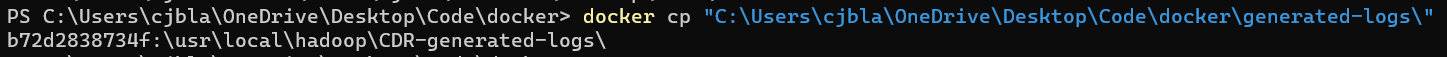

In [ ]:
#your code
from IPython.display import Image
Image(filename='a1.png')

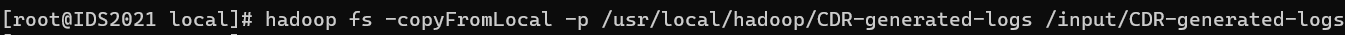

In [ ]:
#your code
Image(filename='a2.png')

In [ ]:
#your code
Image(filename='a3.png') 

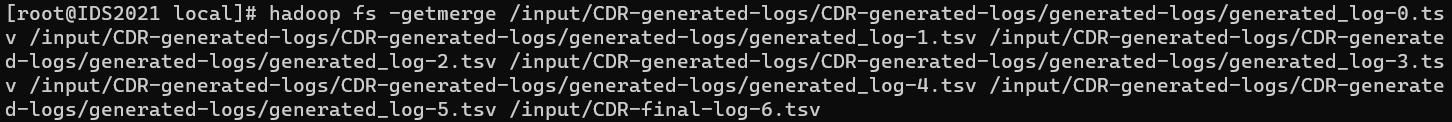

In [ ]:
#your code
Image(filename='a4.png')

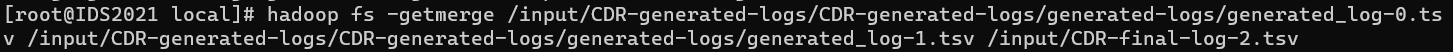

In [ ]:
#your code
Image(filename='a5.png')

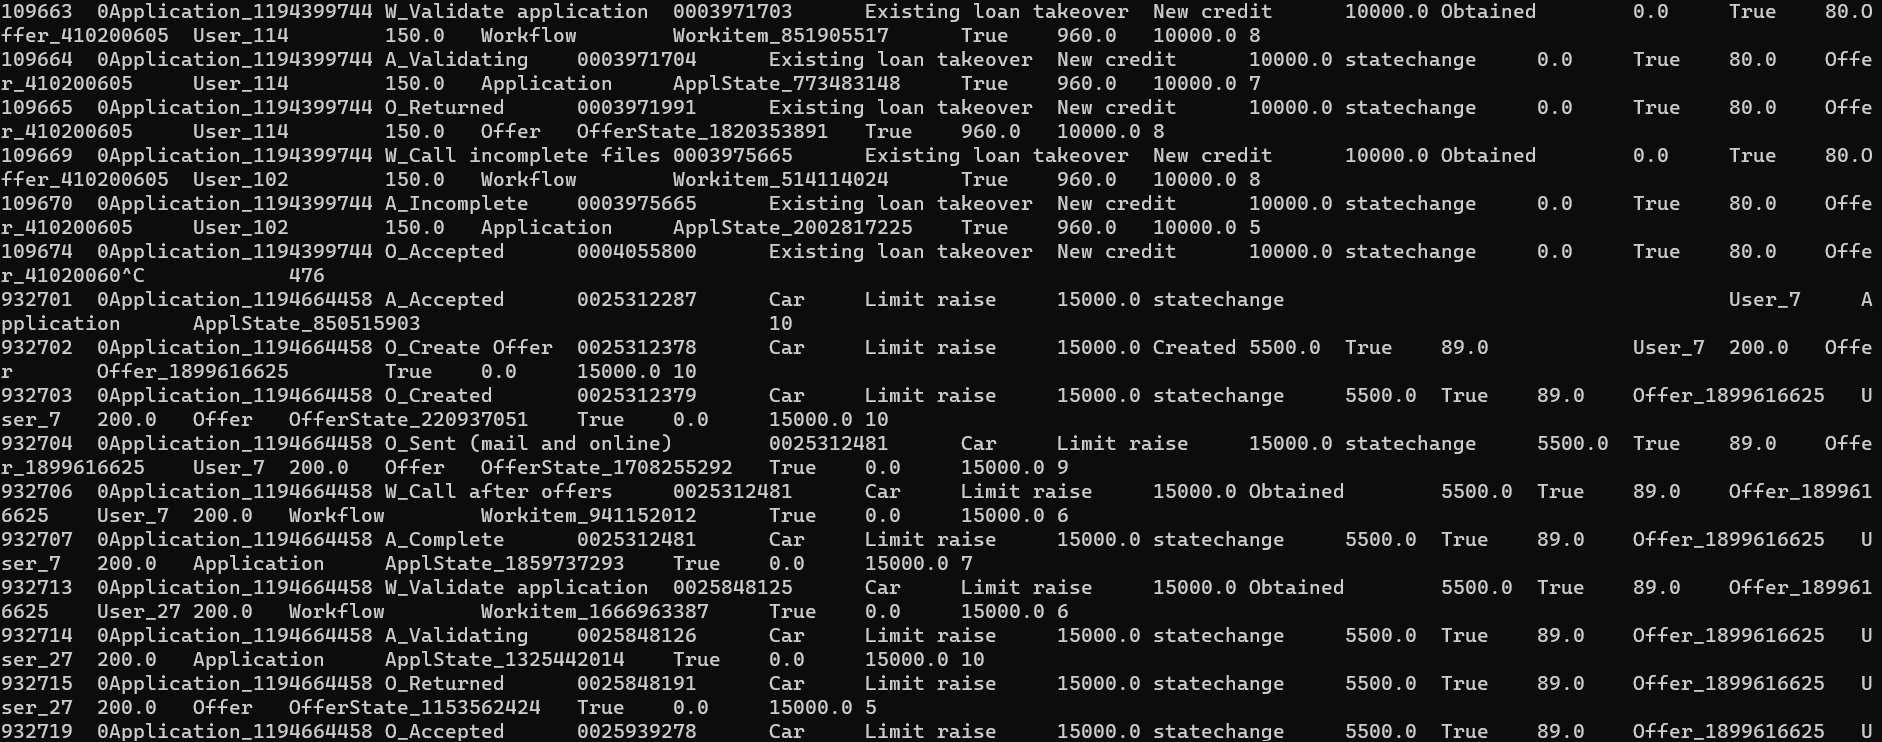

In [ ]:
#your code
Image(filename='a6.png')

### 6.2. Process Discovery

Discover a process model from the completely merged event log using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce computation (as text file)
    4) Jupyter notebook script that visualize (1) a directly-follows graph and (2) a Petri net  based on the computed directly-follows relations.

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce computations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

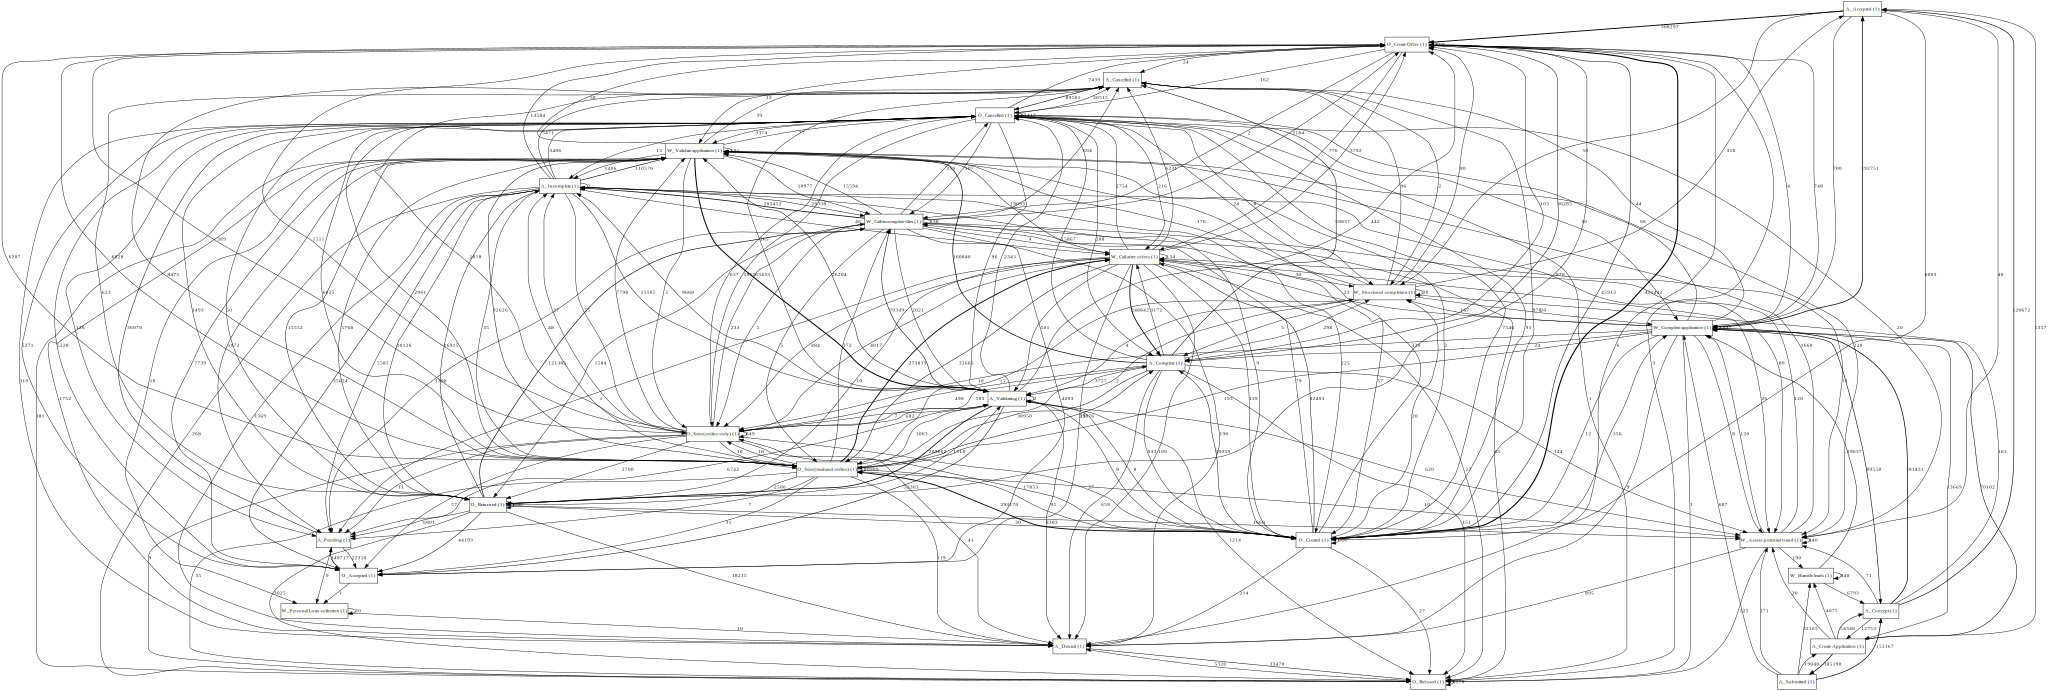

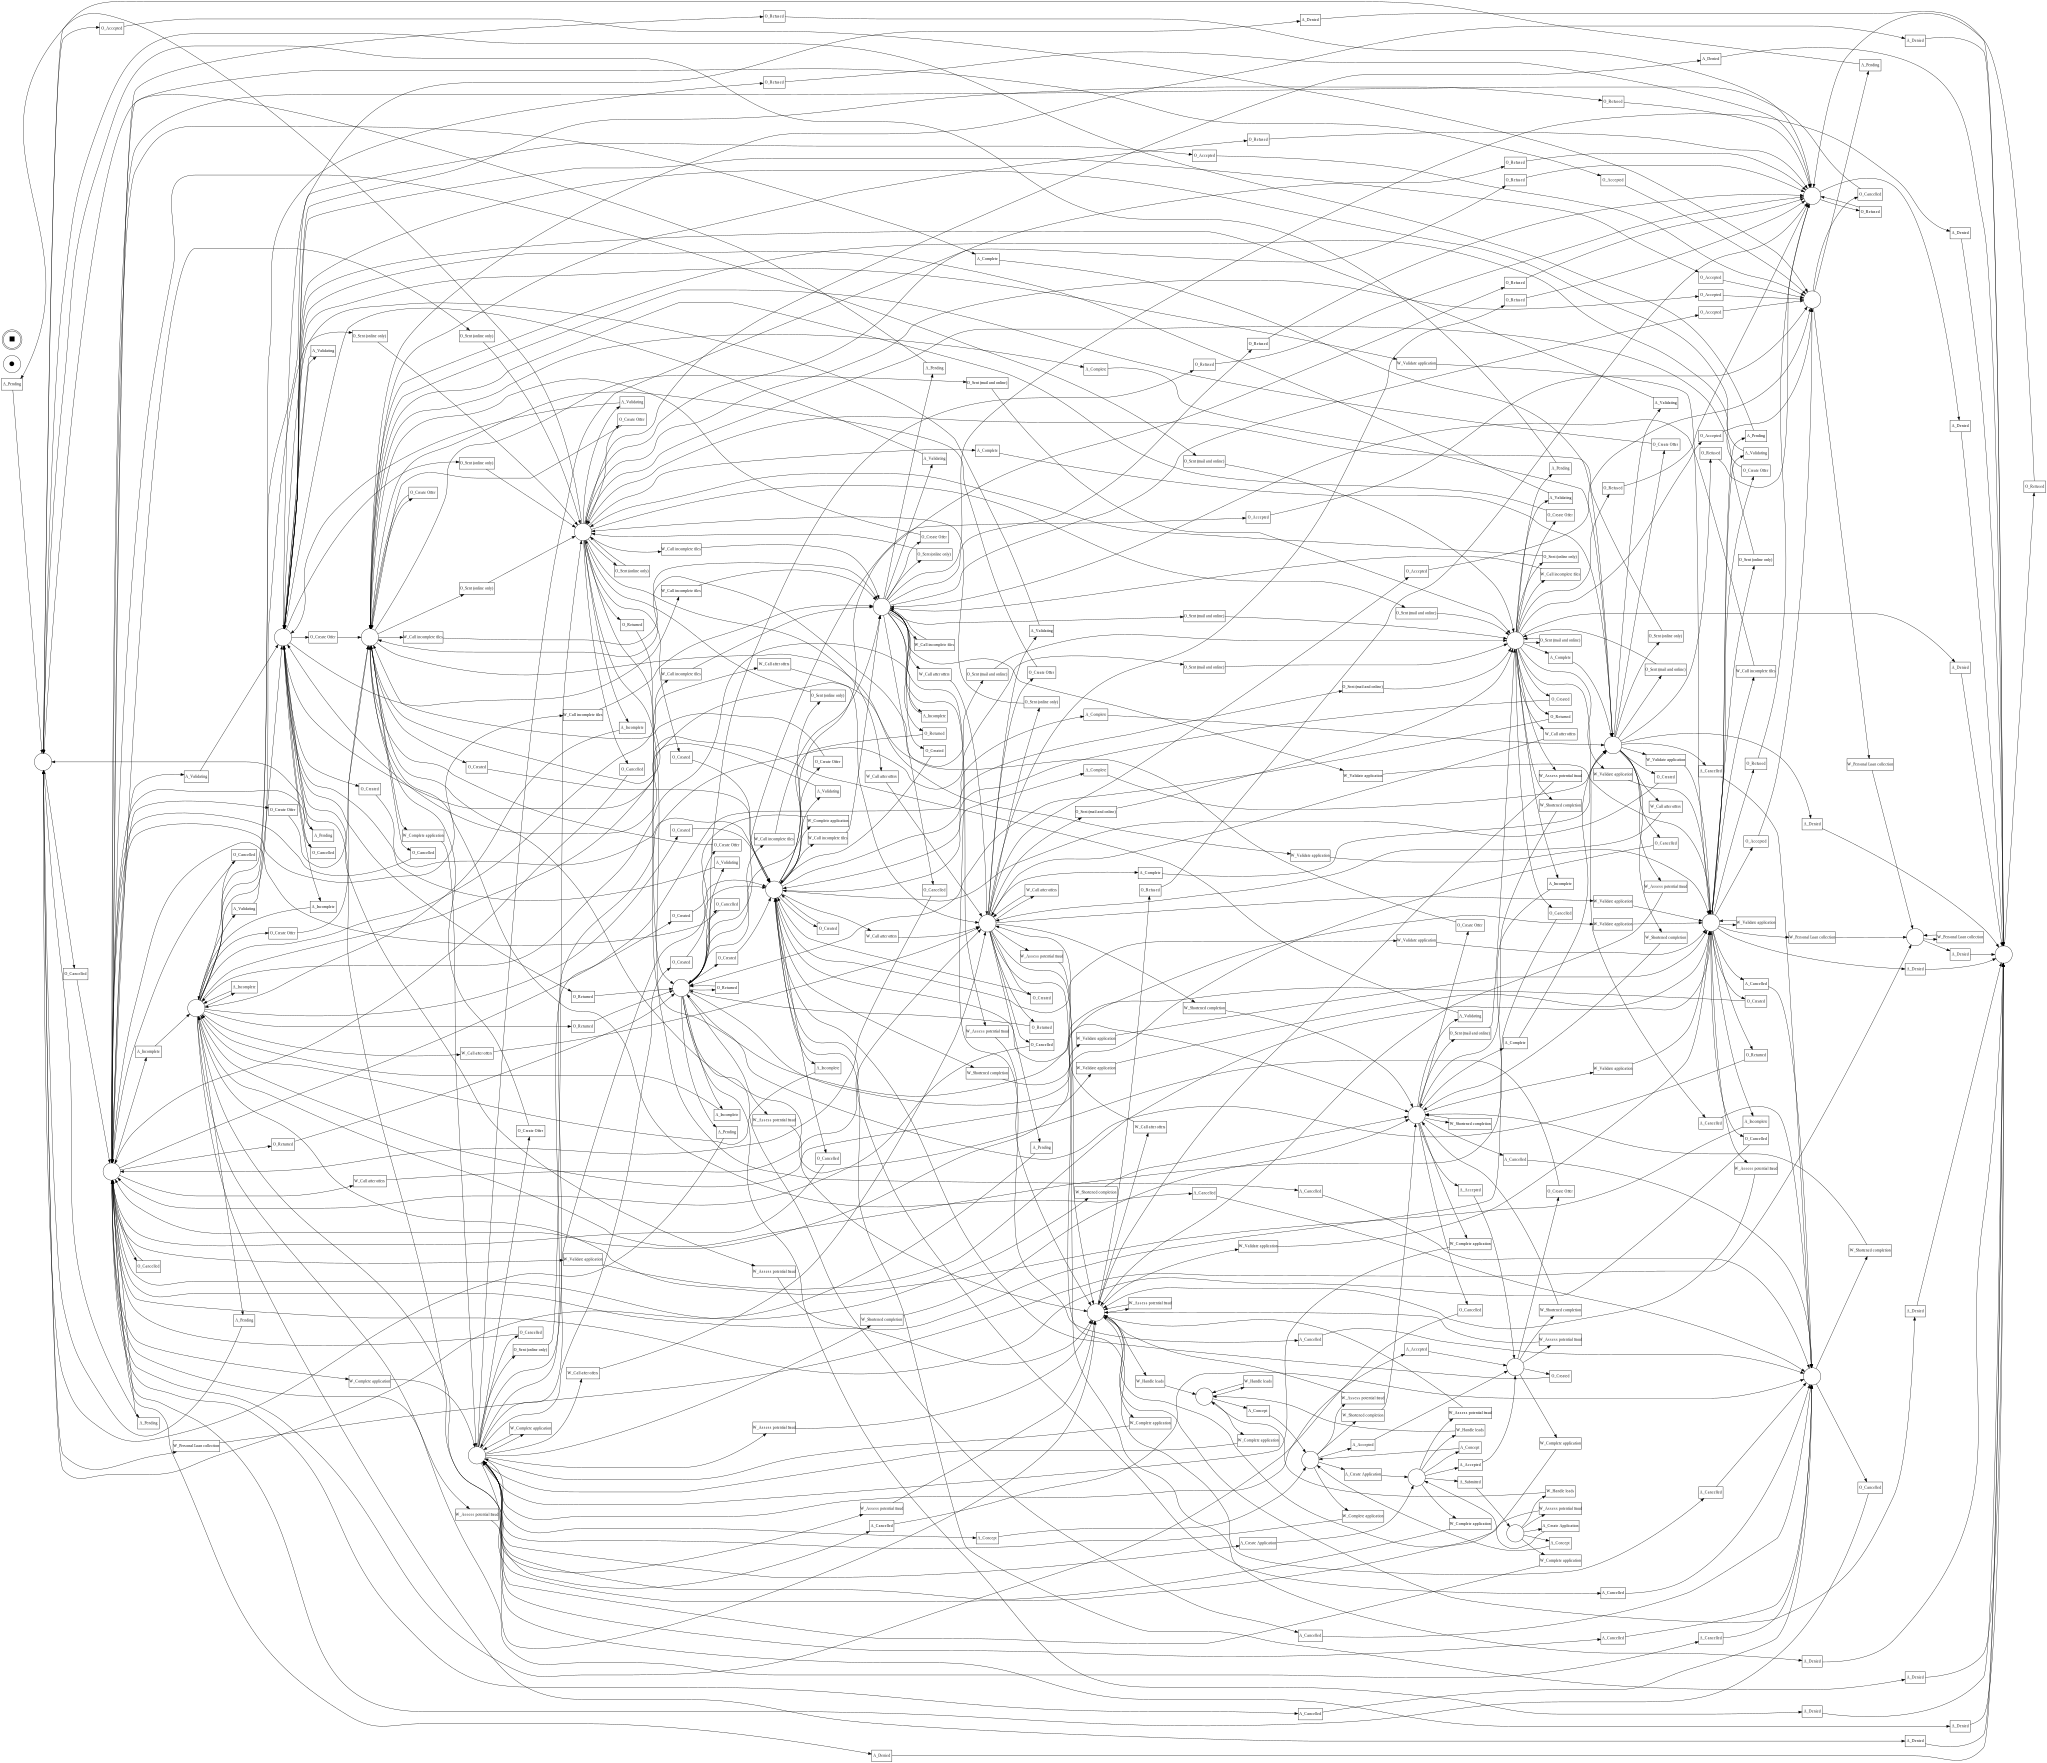

In [ ]:
# your code

# 1. Import libraries
import os
import csv
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.dfg import converter as dfg_mining
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.visualization.petri_net import visualizer as pn_visualizer


# 2. preprocessing
with open('output.txt') as file:
    file_reader = csv.reader(file, delimiter='\t')
    dfg = dict()
    for row in file_reader:
        _from, _to = row[0].split(',')
        rel = (_from, _to)
        freq = int(row[1])
        dfg[rel] = freq

# 3. Visualize Directly-follows-graph (DFG)
gviz = dfg_visualization.apply(dfg)
display(gviz)
dfg_visualization.save(gviz, "dfg.png")

# 4. Discover and Visualize Workflow-Net
net, im, fm = dfg_mining.apply(dfg)
gviz = pn_visualizer.apply(net, im, fm)
display(gviz)
dfg_visualization.save(gviz, "pt.png")

### 6.3. Performance Analysis

a) Compute the total service time for each case based on MapReduce algorithms using the completely-merged event log (i.e., (identifier)-final-log-10.tsv) and visualize 100 cases that show the longest total service time using any chart.
    
The deliverables of 1), 2), 3) and 4) should be submitted as outputs:
```
1) Mapper function (as python file(s))
2) Reducer function (as python file(s))
3) Hadoop commands for MapReduce calculation (as text file)
4) Result: total service times for cases (as text file)
```

b) Compare the (approximate) computation time of the service time calculation between 1. the completely-merged event log (i.e., (identifier)-final-log-10.tsv), 2. 6-merged event log (i.e., (identifier)-final-log-6.tsv), and 3. 2-merged event log (i.e., (identifier)-final-log-2.tsv). Interpret the difference (e.g., the computation time scales linearly with the increasing number of events).

For final log file with 2 files merged: 



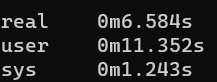

In [ ]:
# your code
print("For final log file with 2 files merged: \n")
Image(filename='log_2.png')

For final log file with 6 files merged: 



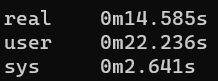

In [ ]:
print("For final log file with 6 files merged: \n")
Image(filename='log_6.png')

For final log file with 10 files merged: 



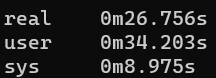

In [ ]:
print("For final log file with 10 files merged: \n")
Image(filename='log_10.png')